### Eclipse Depth Analysis: Why Some Transits Don't Show Eclipses

# TPC Eclipse Impact Parameter MCMC Data Distribution Analysis

This notebook provides a comprehensive analysis of the data distribution and statistical properties of the TPC (Tier Priority Candidate) eclipse impact parameter MCMC results.

**Objectives:**
- Understand the distribution of impact parameters
- Assess data quality and MCMC convergence
- Analyze uncertainties and correlations
- Identify patterns in eclipse detection status

## 1. Load and Explore the Dataset

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [41]:
# Load the dataset
data_path = Path('../results/tpc_eclipse_impact_parameter_mcmc.csv')
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names:\n{df.columns.tolist()}")

Dataset loaded successfully!
Shape: 2046 rows × 13 columns

Column names:
['Planet', 'Dataset', 'eclipse_observed', 'b_occ_median', 'b_occ_16', 'b_occ_84', 'b_occ_std', 'b_occ_err_lower', 'b_occ_err_upper', 'k_rp_rs', 'one_minus_k', 'one_plus_k', 'acceptance_fraction']


In [42]:
# Display first few rows
df.head(10)

,Planet,Dataset,eclipse_observed,b_occ_median,b_occ_16,b_occ_84,b_occ_std,b_occ_err_lower,b_occ_err_upper,k_rp_rs,one_minus_k,one_plus_k,acceptance_fraction
0,TOI-1007.01,TPC,NaN,0.000985,-0.051527,0.051951,0.054751,0.052511,0.050966,0.053292,0.946708,1.053292,0.493094
1,TOI-1009.01,TPC,NaN,-0.000009,-0.033331,0.033065,0.035097,0.033322,0.033074,0.041323,0.958677,1.041323,0.494552
2,TOI-1019.01,TPC,NaN,0.000648,-0.079536,0.083647,0.084408,0.080183,0.082999,0.144211,0.855789,1.144211,0.495906
3,TOI-1027.01,TPC,NaN,-0.001126,-0.095802,0.092652,0.101166,0.094675,0.093779,0.039472,0.960528,1.039472,0.490552
4,TOI-1027.02,TPC,NaN,0.005023,-0.221521,0.225592,0.231786,0.226544,0.220569,0.041158,0.958842,1.041158,0.498781
5,TOI-1027.03,TPC,NaN,-0.003265,-0.128160,0.121949,0.132860,0.124896,0.125213,0.034785,0.965215,1.034785,0.493219
6,TOI-1032.01,TPC,NaN,-0.002572,-0.065981,0.061777,0.067976,0.063409,0.064349,0.059092,0.940908,1.059092,0.493302
7,TOI-1036.01,TPC,NaN,-0.003850,-0.075062,0.067565,0.075466,0.071212,0.071415,0.052545,0.947455,1.052545,0.496083
8,TOI-1058.01,TPC,NaN,0.002163,-0.049408,0.053465,0.053635,0.051570,0.051303,0.030848,0.969152,1.030848,0.494698
9,TOI-1080.01,TPC,NaN,0.000201,-0.231100,0.231076,0.245027,0.231301,0.230875,0.060669,0.939331,1.060669,0.494844


In [43]:
# Data types and basic info
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)
df.info()

Data types:
Planet                  object
Dataset                 object
eclipse_observed       float64
b_occ_median           float64
b_occ_16               float64
b_occ_84               float64
b_occ_std              float64
b_occ_err_lower        float64
b_occ_err_upper        float64
k_rp_rs                float64
one_minus_k            float64
one_plus_k             float64
acceptance_fraction    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Planet               2046 non-null   object 
 1   Dataset              2046 non-null   object 
 2   eclipse_observed     0 non-null      float64
 3   b_occ_median         2046 non-null   float64
 4   b_occ_16             2046 non-null   float64
 5   b_occ_84             2046 non-null   float64
 6   b_occ_std            2046 non-null   float64
 7   b_occ_er

In [44]:
# Select top 50 systems with largest 2σ value
# Calculate 2σ first
df['b_2sigma_temp'] = df['b_occ_median'] + 2.0 * df['b_occ_std']
top_50 = df.nlargest(50, 'b_2sigma_temp').copy()

# Calculate grazing boundaries
top_50['boundary_lower'] = 1 - top_50['k_rp_rs']
top_50['boundary_upper'] = 1 + top_50['k_rp_rs']

# Calculate 2σ for sorting
top_50['b_2sigma'] = top_50['b_occ_median'] + 2.0 * top_50['b_occ_std']

# Sort by 2σ for consistent ordering
top_50 = top_50.sort_values('b_2sigma', ascending=False).reset_index(drop=True)

print(f"Top 50 systems selected (largest 2σ value)")
print(f"2σ range: {top_50['b_2sigma'].min():.4f} to {top_50['b_2sigma'].max():.4f}")
print(f"Impact parameter (median) range: {top_50['b_occ_median'].min():.4f} to {top_50['b_occ_median'].max():.4f}")
print(f"\nFirst 5 systems:")
id_col = top_50.columns[0]
display_cols = [id_col, 'b_occ_median', 'b_occ_std', 'b_2sigma', 'k_rp_rs', 'boundary_lower', 'boundary_upper']
print(top_50[display_cols].head())

Top 50 systems selected (largest 2σ value)
2σ range: 0.5787 to 2.0488
Impact parameter (median) range: -0.0259 to 0.0374

First 5 systems:
        Planet  b_occ_median  b_occ_std  b_2sigma   k_rp_rs  boundary_lower  \
0  TOI-7049.01      0.037384   1.005721  2.048827  0.080963        0.919037   
1  TOI-4409.01      0.031927   0.938866  1.909658  0.107180        0.892820   
2  TOI-5151.01     -0.008624   0.717695  1.426766  0.165529        0.834471   
3  TOI-5722.01      0.009413   0.650306  1.310025  0.081198        0.918802   
4  TOI-1812.03     -0.025922   0.615100  1.204279  0.069138        0.930862   

   boundary_upper  
0        1.080963  
1        1.107180  
2        1.165529  
3        1.081198  
4        1.069138  


## Top 50 Systems Analysis

Focus on the 50 systems with the largest impact parameters.

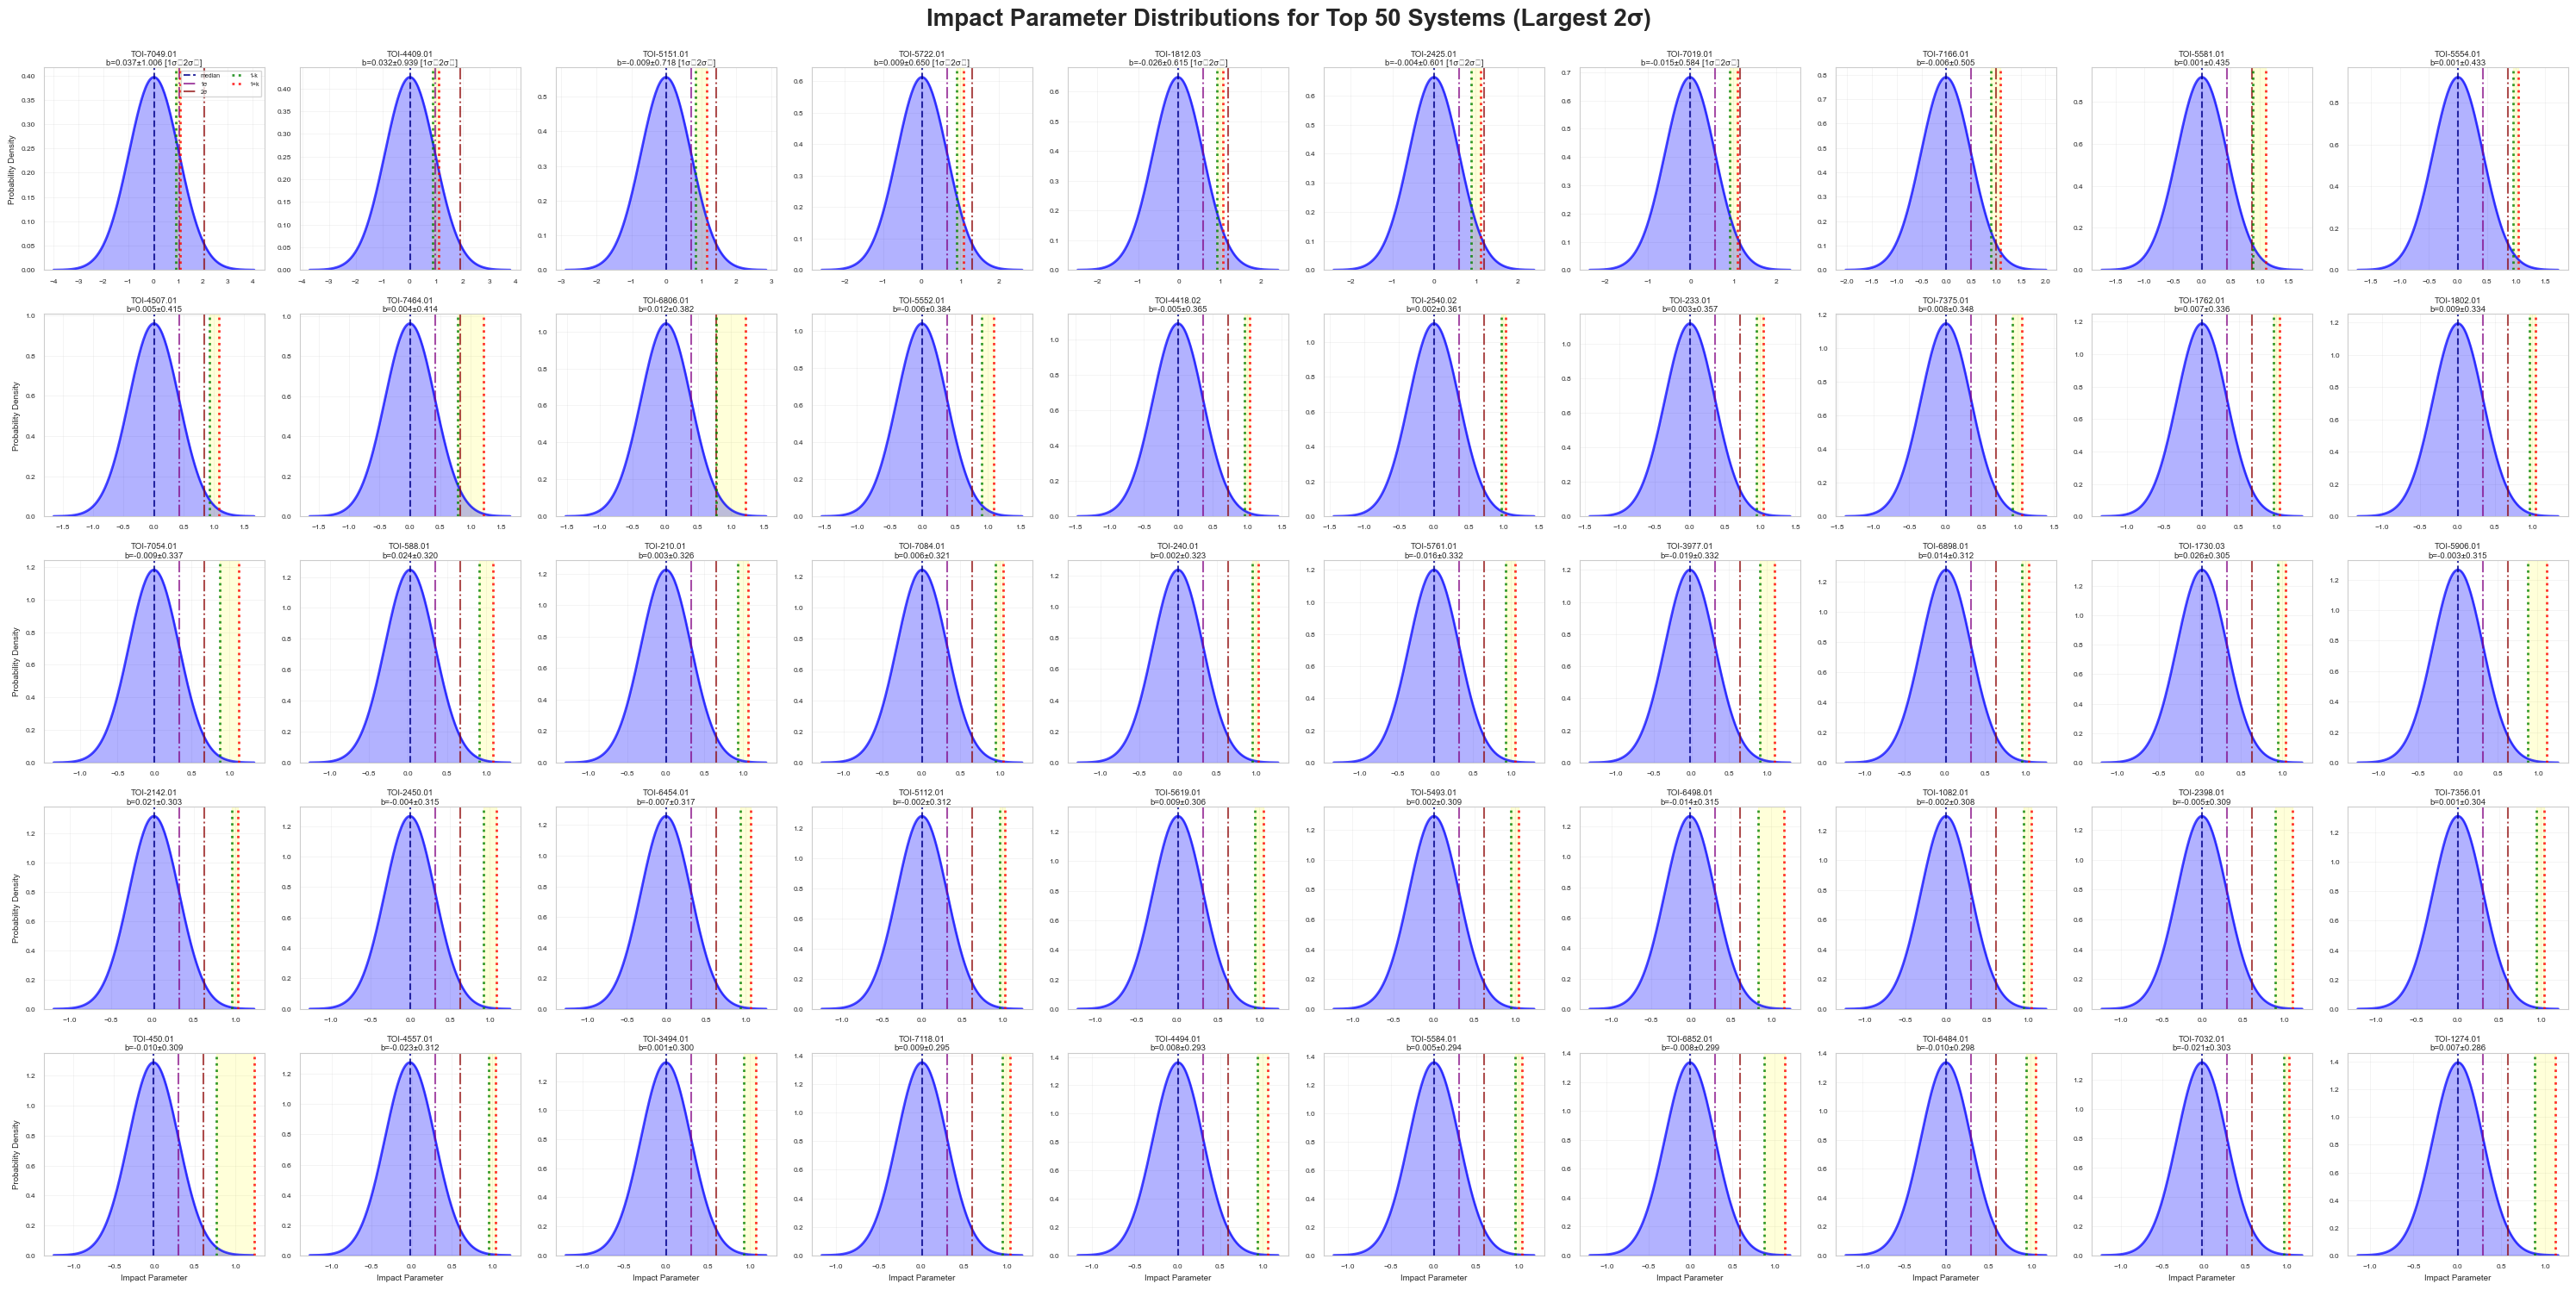


5x10 grid plot completed - showing individual distributions for top 50 systems

📊 Filtering Analysis:
   Systems where 1σ > 1+k: 0/50 (0%)
   Systems where 2σ > 1+k: 7/50 (14%)

⚠️  Note: Many systems have long tails extending beyond 1+k (the grazing boundary).
   However, filtering is based on the 1σ or 2σ value crossing the boundary,
   not on whether any part of the distribution tail extends beyond it.
   This explains why visually many tails extend beyond, but fewer systems are flagged.


In [6]:
# Create a 5x10 grid for the 50 systems
fig, axes = plt.subplots(5, 10, figsize=(30, 15))
fig.suptitle('Impact Parameter Distributions for Top 50 Systems (Largest 2σ)', 
             fontsize=20, fontweight='bold', y=0.995)

# Get system identifier column
id_col = top_50.columns[0]

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Plot each system
for idx, (_, row) in enumerate(top_50.iterrows()):
    ax = axes_flat[idx]
    
    # Get parameters
    b_median = row['b_occ_median']
    b_std = row['b_occ_std']
    k = row['k_rp_rs']
    boundary_lower = row['boundary_lower']
    boundary_upper = row['boundary_upper']
    system_name = str(row[id_col])[:15]  # Truncate long names
    
    # Calculate sigma values
    b_1sigma = b_median + 1.0 * b_std
    b_2sigma = b_median + 2.0 * b_std
    
    # Create distribution (assuming Gaussian approximation)
    x = np.linspace(b_median - 4*b_std, b_median + 4*b_std, 200)
    from scipy.stats import norm
    y = norm.pdf(x, b_median, b_std)
    
    # Plot distribution
    ax.plot(x, y, 'b-', linewidth=2, alpha=0.7)
    ax.fill_between(x, y, alpha=0.3, color='blue')
    
    # Add vertical lines for median and sigma values
    ax.axvline(b_median, color='darkblue', linestyle='--', linewidth=1.5, alpha=0.8, label='median')
    ax.axvline(b_1sigma, color='purple', linestyle='-.', linewidth=1.5, alpha=0.7, label='1σ')
    ax.axvline(b_2sigma, color='darkred', linestyle='-.', linewidth=1.5, alpha=0.7, label='2σ')
    
    # Add vertical lines for boundaries
    ax.axvline(boundary_lower, color='green', linestyle=':', linewidth=2, alpha=0.8, label=f'1-k')
    ax.axvline(boundary_upper, color='red', linestyle=':', linewidth=2, alpha=0.8, label=f'1+k')
    
    # Shade grazing regions
    ax.axvspan(boundary_lower, boundary_upper, alpha=0.15, color='yellow')
    
    # Check if system would be flagged
    flagged_1sig = b_1sigma > boundary_upper
    flagged_2sig = b_2sigma > boundary_upper
    flag_status = ""
    if flagged_1sig and flagged_2sig:
        flag_status = " [1σ✗2σ✗]"
    elif flagged_2sig:
        flag_status = " [1σ✓2σ✗]"
    
    # Set title with system name and key values
    ax.set_title(f'{system_name}\nb={b_median:.3f}±{b_std:.3f}{flag_status}', fontsize=7, pad=2)
    
    # Format axes
    ax.tick_params(labelsize=6)
    ax.set_ylim(bottom=0)
    
    # Add grid
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Only show x-label on bottom row
    if idx >= 40:
        ax.set_xlabel('Impact Parameter', fontsize=7)
    
    # Only show y-label on leftmost column
    if idx % 10 == 0:
        ax.set_ylabel('Probability Density', fontsize=7)

# Add legend on first subplot
axes_flat[0].legend(fontsize=5, loc='upper right', ncol=2)

plt.tight_layout()
plt.show()

# Count how many would be flagged
n_flagged_1sig = sum((top_50['b_occ_median'] + top_50['b_occ_std']) > top_50['boundary_upper'])
n_flagged_2sig = sum((top_50['b_occ_median'] + 2.0 * top_50['b_occ_std']) > top_50['boundary_upper'])

print("\n5x10 grid plot completed - showing individual distributions for top 50 systems")
print(f"\n📊 Filtering Analysis:")
print(f"   Systems where 1σ > 1+k: {n_flagged_1sig}/50 ({n_flagged_1sig/50*100:.0f}%)")
print(f"   Systems where 2σ > 1+k: {n_flagged_2sig}/50 ({n_flagged_2sig/50*100:.0f}%)")
print(f"\n⚠️  Note: Many systems have long tails extending beyond 1+k (the grazing boundary).")
print(f"   However, filtering is based on the 1σ or 2σ value crossing the boundary,")
print(f"   not on whether any part of the distribution tail extends beyond it.")
print(f"   This explains why visually many tails extend beyond, but fewer systems are flagged.")

### Individual Distribution Plots (5x10 Grid)

Visualize the impact parameter distribution for each of the 50 systems.

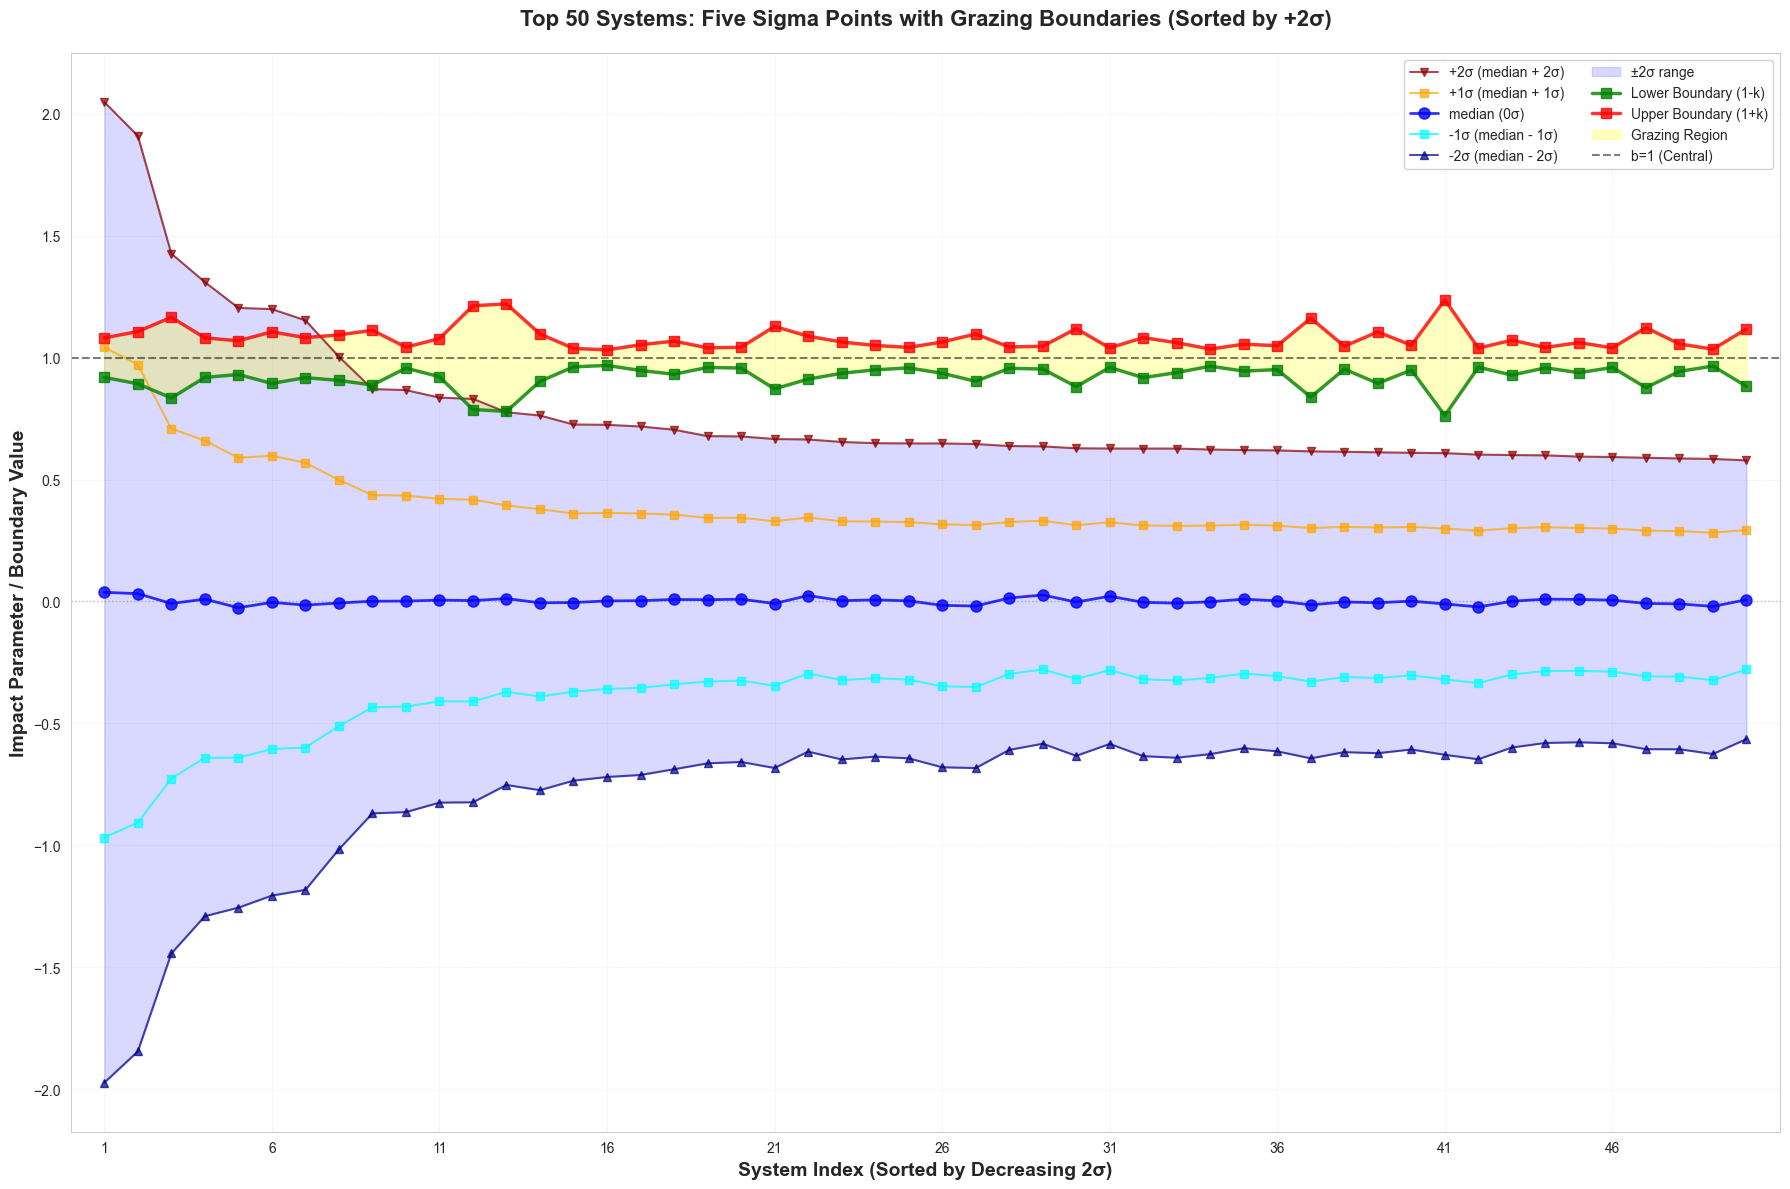

\n======================================================================
SUMMARY: Top 50 Systems with Largest 2σ
Impact parameter (median) range: -0.0259 to 0.0374
Mean impact parameter: 0.0010 ± 0.0130
\nRadius ratio (k) range: 0.0319 to 0.2373
Mean radius ratio: 0.0816 ± 0.0484
\nEclipse Viability Analysis by Sigma Level:
\n  At MEDIAN (0σ):
    - Central/Deep (b < 1-k): 50 systems
    - Grazing (1-k ≤ b ≤ 1+k): 0 systems
    - Beyond grazing (b > 1+k): 0 systems
\n  At +1σ (median + 1σ):
    - Beyond grazing (+1σ > 1+k): 0 systems
    - Within grazing (+1σ ≤ 1+k): 50 systems
\n  At +2σ (median + 2σ):
    - Beyond grazing (+2σ > 1+k): 7 systems
    - Within grazing (+2σ ≤ 1+k): 43 systems
\n  Distribution Spread:
    - Mean ±2σ range: 1.5595
    - Mean ±1σ range: 0.7797


In [7]:
# Create comprehensive visualization of impact parameters with grazing boundaries
# Show five sigma points: +2σ, +1σ, median, -1σ, -2σ

fig, ax = plt.subplots(figsize=(18, 12))

# System indices
indices = np.arange(len(top_50))

# Extract median and std values
b_median = top_50['b_occ_median'].values
b_std = top_50['b_occ_std'].values
k_values = top_50['k_rp_rs'].values
boundary_lower = top_50['boundary_lower'].values
boundary_upper = top_50['boundary_upper'].values

# Calculate five sigma points
b_plus2sig = b_median + 2.0 * b_std   # +2σ
b_plus1sig = b_median + 1.0 * b_std   # +1σ
b_0sig = b_median                      # median (0σ)
b_minus1sig = b_median - 1.0 * b_std  # -1σ
b_minus2sig = b_median - 2.0 * b_std  # -2σ

# Plot all five sigma points
ax.plot(indices, b_plus2sig, 'v-', color='darkred', markersize=6, linewidth=1.5, 
        alpha=0.7, label='+2σ (median + 2σ)')
ax.plot(indices, b_plus1sig, 's-', color='orange', markersize=6, linewidth=1.5, 
        alpha=0.7, label='+1σ (median + 1σ)')
ax.plot(indices, b_0sig, 'o-', color='blue', markersize=8, linewidth=2, 
        alpha=0.8, label='median (0σ)', zorder=3)
ax.plot(indices, b_minus1sig, 's-', color='cyan', markersize=6, linewidth=1.5, 
        alpha=0.7, label='-1σ (median - 1σ)')
ax.plot(indices, b_minus2sig, '^-', color='darkblue', markersize=6, linewidth=1.5, 
        alpha=0.7, label='-2σ (median - 2σ)')

# Fill between sigma values to show distribution spread
ax.fill_between(indices, b_minus2sig, b_plus2sig, alpha=0.15, color='blue', label='±2σ range')

# Plot grazing boundaries
ax.plot(indices, boundary_lower, 's-', color='green', 
        markersize=7, linewidth=2.5, alpha=0.8, label='Lower Boundary (1-k)', zorder=2)
ax.plot(indices, boundary_upper, 's-', color='red', 
        markersize=7, linewidth=2.5, alpha=0.8, label='Upper Boundary (1+k)', zorder=2)

# Fill grazing region
ax.fill_between(indices, boundary_lower, boundary_upper, 
                alpha=0.25, color='yellow', label='Grazing Region', zorder=1)

# Add reference lines
ax.axhline(y=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='b=1 (Central)')
ax.axhline(y=0.0, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Formatting
ax.set_xlabel('System Index (Sorted by Decreasing 2σ)', fontsize=14, fontweight='bold')
ax.set_ylabel('Impact Parameter / Boundary Value', fontsize=14, fontweight='bold')
ax.set_title('Top 50 Systems: Five Sigma Points with Grazing Boundaries (Sorted by +2σ)', 
             fontsize=16, fontweight='bold', pad=20)

# Set x-axis
ax.set_xlim(-1, len(top_50))
ax.set_xticks(np.arange(0, len(top_50), 5))
ax.set_xticklabels(np.arange(1, len(top_50)+1, 5))

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Legend with two columns
ax.legend(loc='upper right', fontsize=10, framealpha=0.9, ncol=2)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\\n" + "="*70)
print("SUMMARY: Top 50 Systems with Largest 2σ")
print("="*70)
print(f"Impact parameter (median) range: {b_median.min():.4f} to {b_median.max():.4f}")
print(f"Mean impact parameter: {b_median.mean():.4f} ± {b_median.std():.4f}")
print(f"\\nRadius ratio (k) range: {k_values.min():.4f} to {k_values.max():.4f}")
print(f"Mean radius ratio: {k_values.mean():.4f} ± {k_values.std():.4f}")

# Count systems by eclipse viability at different sigma levels
print(f"\\nEclipse Viability Analysis by Sigma Level:")
print(f"\\n  At MEDIAN (0σ):")
central_0 = np.sum(b_0sig < boundary_lower)
grazing_0 = np.sum((b_0sig >= boundary_lower) & (b_0sig <= boundary_upper))
beyond_0 = np.sum(b_0sig > boundary_upper)
print(f"    - Central/Deep (b < 1-k): {central_0} systems")
print(f"    - Grazing (1-k ≤ b ≤ 1+k): {grazing_0} systems")
print(f"    - Beyond grazing (b > 1+k): {beyond_0} systems")

print(f"\\n  At +1σ (median + 1σ):")
beyond_1sig = np.sum(b_plus1sig > boundary_upper)
print(f"    - Beyond grazing (+1σ > 1+k): {beyond_1sig} systems")
print(f"    - Within grazing (+1σ ≤ 1+k): {50 - beyond_1sig} systems")

print(f"\\n  At +2σ (median + 2σ):")
beyond_2sig = np.sum(b_plus2sig > boundary_upper)
print(f"    - Beyond grazing (+2σ > 1+k): {beyond_2sig} systems")
print(f"    - Within grazing (+2σ ≤ 1+k): {50 - beyond_2sig} systems")

print(f"\\n  Distribution Spread:")
print(f"    - Mean ±2σ range: {np.mean(b_plus2sig - b_minus2sig):.4f}")
print(f"    - Mean ±1σ range: {np.mean(b_plus1sig - b_minus1sig):.4f}")
print("="*70)

### Impact Parameters with Grazing Boundaries

Comprehensive view of all 50 systems showing impact parameters with error bars and grazing boundaries (1-k and 1+k).

In [8]:
# Compare 84th percentile (~1σ) vs 2σ filtering

print("="*80)
print("PERCENTILE FILTERING COMPARISON: How Aggressive Should We Be?")
print("="*80)

# For Gaussian distribution:
# 84th percentile ≈ median + 1σ (captures ~68% within ±1σ)
# 2σ = median + 2σ (captures ~95.4% within ±2σ, corresponds to ~97.7th percentile)

# Calculate percentile bounds for all top 50 systems
top_50['b_84th'] = top_50['b_occ_median'] + top_50['b_occ_std']  # ~84th percentile
top_50['b_95th'] = top_50['b_occ_median'] + 2.0 * top_50['b_occ_std']  # 2σ threshold

# Filtering criteria: Flag as NO_ECLIPSE if percentile > 1+k
top_50['flag_84th'] = top_50['b_84th'] > top_50['boundary_upper']
top_50['flag_95th'] = top_50['b_95th'] > top_50['boundary_upper']

# Count systems flagged by each method
n_flagged_84th = top_50['flag_84th'].sum()
n_flagged_95th = top_50['flag_95th'].sum()

print(f"\n📊 FILTERING RESULTS:")
print(f"   Using 84th percentile (median + 1σ):")
print(f"      → {n_flagged_84th} out of 50 systems flagged as NO_ECLIPSE ({n_flagged_84th/50*100:.1f}%)")
print(f"      → {50 - n_flagged_84th} systems retained ({(50-n_flagged_84th)/50*100:.1f}%)")

print(f"\n   Using 2σ threshold (median + 2σ):")
print(f"      → {n_flagged_95th} out of 50 systems flagged as NO_ECLIPSE ({n_flagged_95th/50*100:.1f}%)")
print(f"      → {50 - n_flagged_95th} systems retained ({(50-n_flagged_95th)/50*100:.1f}%)")

# Calculate the difference
difference = n_flagged_84th - n_flagged_95th
print(f"\n📈 DIFFERENCE:")
print(f"   Moving from 84th percentile (1σ) to 2σ threshold would flag {abs(difference)} FEWER systems")
print(f"   (Keeping {abs(difference)} more systems in the sample)")

# What does this mean?
if abs(difference) == 0:
    print(f"\n⚠️  NO DIFFERENCE: Both methods flag the same systems!")
    print(f"   → The filtering is not sensitive to this change")
elif abs(difference) <= 2:
    print(f"\n⚠️  MINIMAL DIFFERENCE: Only {abs(difference)} system(s) would change")
    print(f"   → The 84th percentile is already quite conservative")
    print(f"   → Moving to 2σ threshold won't make much practical difference")
elif abs(difference) <= 5:
    print(f"\n⚙️  MODERATE DIFFERENCE: {abs(difference)} systems would change")
    print(f"   → There is some difference, but not dramatic")
    print(f"   → Consider your science goals: how risk-averse should you be?")
else:
    print(f"\n🎯 SIGNIFICANT DIFFERENCE: {abs(difference)} systems would change")
    print(f"   → This is a substantial change in filtering!")
    print(f"   → 2σ threshold is considerably less aggressive")

# Show which systems change
systems_only_84th = top_50[top_50['flag_84th'] & ~top_50['flag_95th']]
if len(systems_only_84th) > 0:
    print(f"\n📋 Systems flagged by 84th (1σ) but NOT by 2σ threshold:")
    id_col = top_50.columns[0]
    for idx, row in systems_only_84th.iterrows():
        b = row['b_occ_median']
        std = row['b_occ_std']
        b84 = row['b_84th']
        b95 = row['b_95th']
        upper = row['boundary_upper']
        print(f"   • {row[id_col]}: b={b:.3f}±{std:.3f}, b_84={b84:.3f}, b_95={b95:.3f}, 1+k={upper:.3f}")

print("\n" + "="*80)
print("💡 RECOMMENDATION:")
print("="*80)
if abs(difference) <= 2:
    print("The 84th percentile (1σ) is ALREADY quite conservative.")
    print("Moving to 2σ threshold won't make a big difference in your sample size.")
    print("→ Stick with 84th percentile for more aggressive filtering.")
elif abs(difference) <= 5:
    print("There's a moderate difference between 84th percentile (1σ) and 2σ threshold.")
    print("Choice depends on your science goals:")
    print("  • Use 84th (1σ) if you want to be MORE AGGRESSIVE - remove marginal cases")
    print("  • Use 2σ if you want to be LESS AGGRESSIVE - keep borderline systems")
else:
    print("There's a SIGNIFICANT difference between 84th percentile (1σ) and 2σ threshold!")
    print(f"You'd keep {abs(difference)} more systems with 2σ threshold.")
    print("  • 84th percentile (1σ) = AGGRESSIVE filtering (stricter quality control)")
    print("  • 2σ threshold = CONSERVATIVE filtering (larger but riskier sample)")
print("="*80)

PERCENTILE FILTERING COMPARISON: How Aggressive Should We Be?

📊 FILTERING RESULTS:
   Using 84th percentile (median + 1σ):
      → 0 out of 50 systems flagged as NO_ECLIPSE (0.0%)
      → 50 systems retained (100.0%)

   Using 2σ threshold (median + 2σ):
      → 7 out of 50 systems flagged as NO_ECLIPSE (14.0%)
      → 43 systems retained (86.0%)

📈 DIFFERENCE:
   Moving from 84th percentile (1σ) to 2σ threshold would flag 7 FEWER systems
   (Keeping 7 more systems in the sample)

🎯 SIGNIFICANT DIFFERENCE: 7 systems would change
   → This is a substantial change in filtering!
   → 2σ threshold is considerably less aggressive

💡 RECOMMENDATION:
There's a SIGNIFICANT difference between 84th percentile (1σ) and 2σ threshold!
You'd keep 7 more systems with 2σ threshold.
  • 84th percentile (1σ) = AGGRESSIVE filtering (stricter quality control)
  • 2σ threshold = CONSERVATIVE filtering (larger but riskier sample)


### Percentile-Based Filtering Comparison: 84th vs 2σ

Compare the impact of using different thresholds for filtering out non-eclipsing systems.

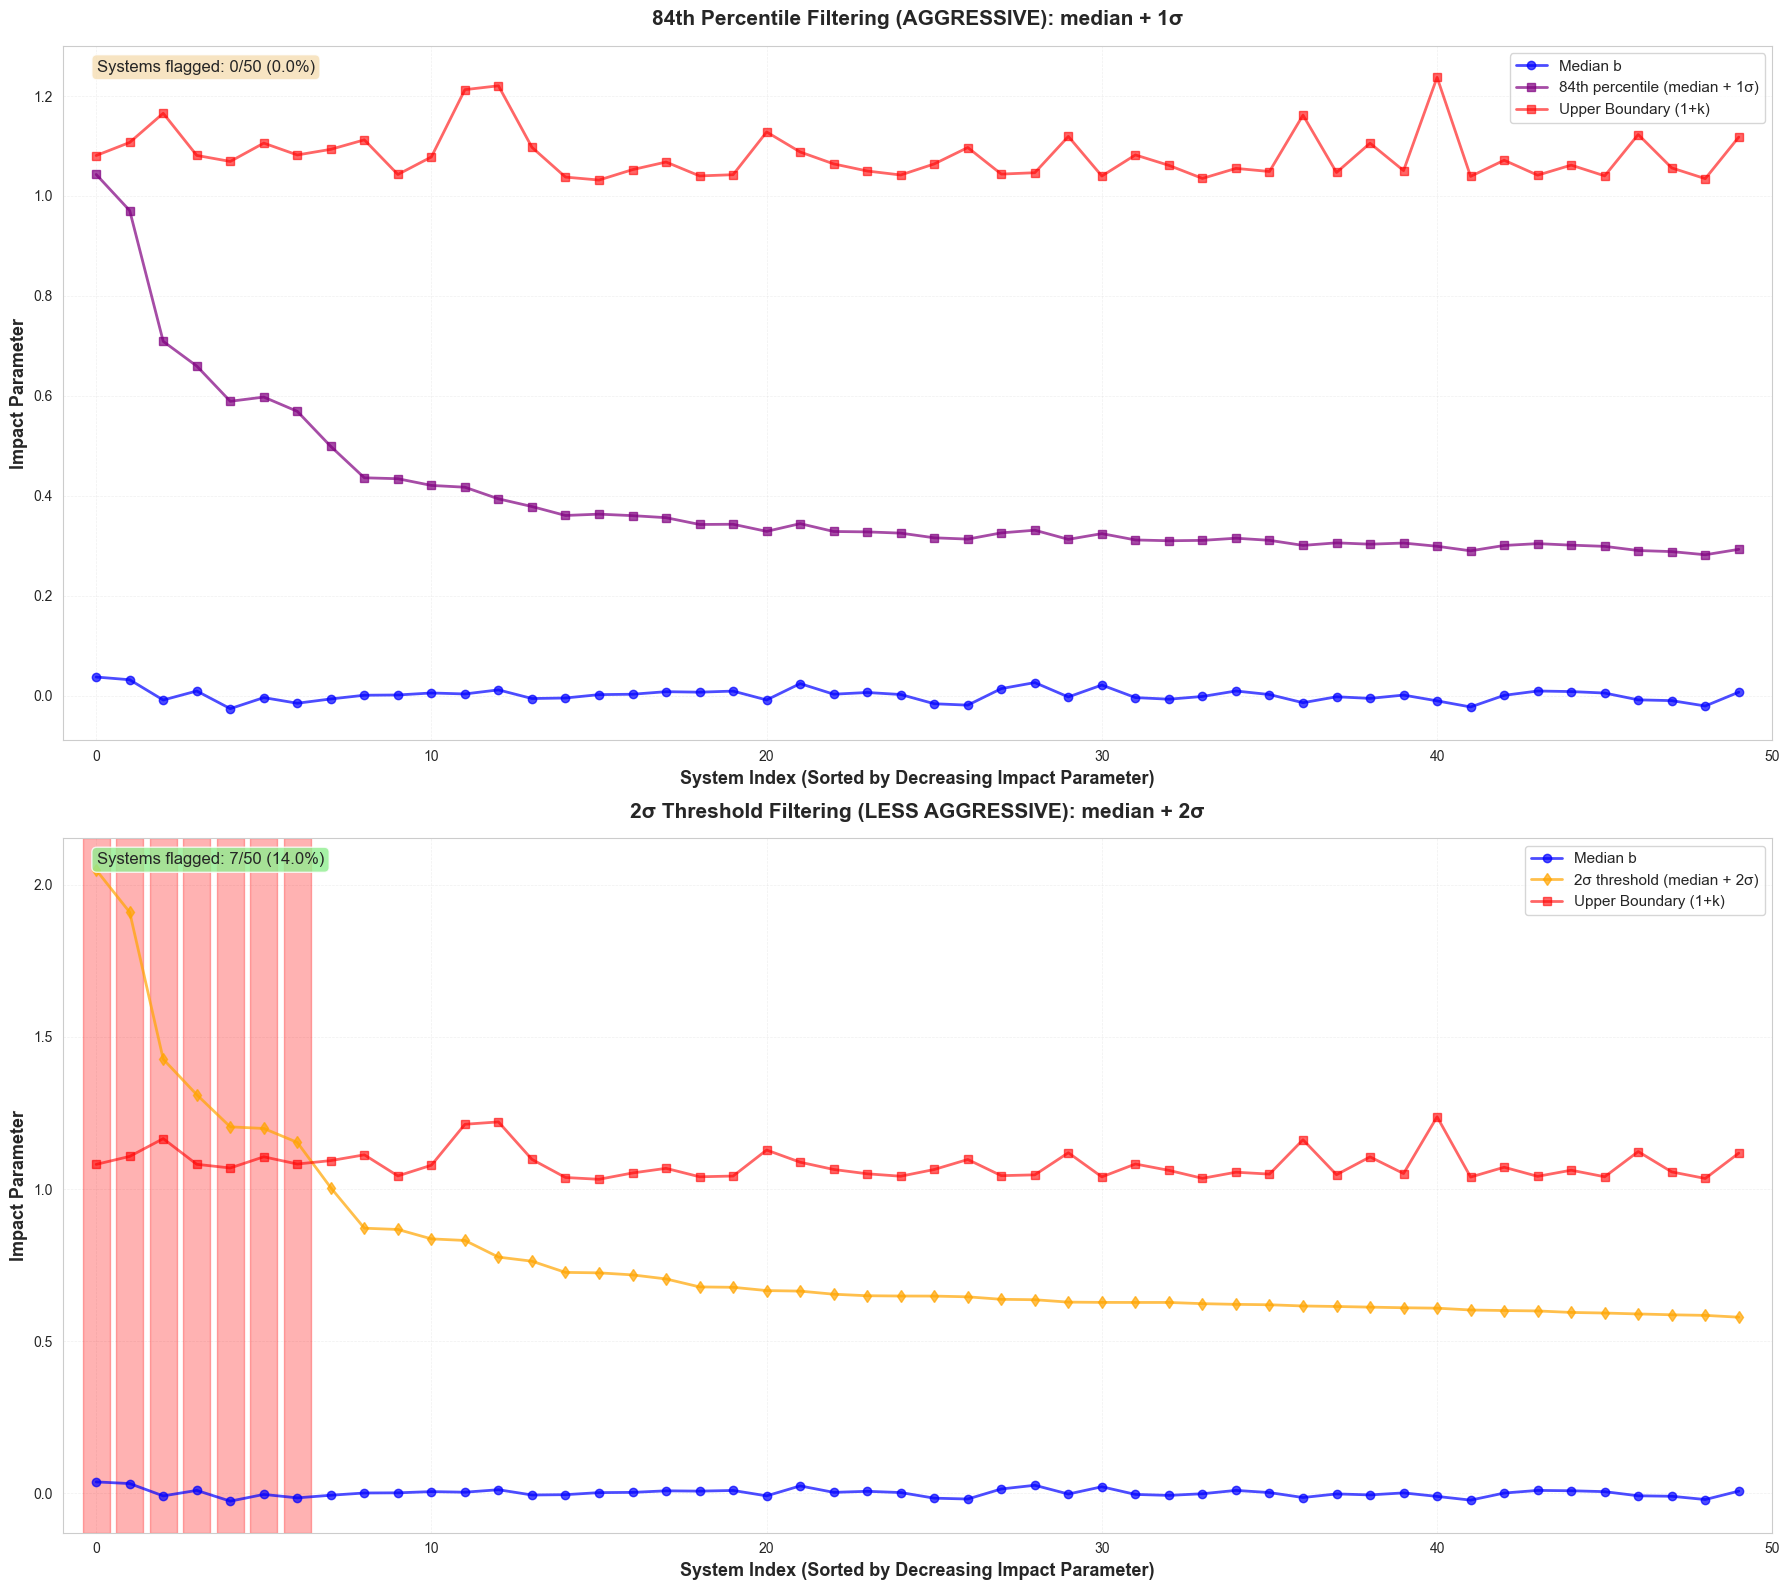


🎨 Red shaded regions = systems flagged as NO_ECLIPSE
🎨 Yellow shaded regions = systems that CHANGE status (84th flags, 2σ doesn't)


In [9]:
# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 16))

# System indices
indices = np.arange(len(top_50))

# Extract values
b_values = top_50['b_occ_median'].values
b_84th = top_50['b_84th'].values
b_95th = top_50['b_95th'].values
boundary_upper = top_50['boundary_upper'].values

# --- TOP PLOT: 84th Percentile Filtering ---
ax1.plot(indices, b_values, 'o-', color='blue', markersize=6, linewidth=2, alpha=0.7, label='Median b')
ax1.plot(indices, b_84th, 's-', color='purple', markersize=6, linewidth=2, alpha=0.7, label='84th percentile (median + 1σ)')
ax1.plot(indices, boundary_upper, 's-', color='red', markersize=6, linewidth=2, alpha=0.6, label='Upper Boundary (1+k)')

# Highlight systems flagged by 84th percentile
flagged_84 = top_50['flag_84th'].values
for i, flagged in enumerate(flagged_84):
    if flagged:
        ax1.axvspan(i-0.4, i+0.4, alpha=0.3, color='red')

ax1.set_xlabel('System Index (Sorted by Decreasing Impact Parameter)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Impact Parameter', fontsize=13, fontweight='bold')
ax1.set_title('84th Percentile Filtering (AGGRESSIVE): median + 1σ', fontsize=15, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right', fontsize=11)
ax1.set_xlim(-1, len(top_50))
ax1.text(0.02, 0.98, f'Systems flagged: {n_flagged_84th}/{len(top_50)} ({n_flagged_84th/50*100:.1f}%)', 
         transform=ax1.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# --- BOTTOM PLOT: 95th Percentile Filtering ---
ax2.plot(indices, b_values, 'o-', color='blue', markersize=6, linewidth=2, alpha=0.7, label='Median b')
ax2.plot(indices, b_95th, 'd-', color='orange', markersize=6, linewidth=2, alpha=0.7, label='2σ threshold (median + 2σ)')
ax2.plot(indices, boundary_upper, 's-', color='red', markersize=6, linewidth=2, alpha=0.6, label='Upper Boundary (1+k)')

# Highlight systems flagged by 95th percentile
flagged_95 = top_50['flag_95th'].values
for i, flagged in enumerate(flagged_95):
    if flagged:
        ax2.axvspan(i-0.4, i+0.4, alpha=0.3, color='red')

# Highlight systems that change (flagged by 84th but not 95th)
changed = flagged_84 & ~flagged_95
for i, change in enumerate(changed):
    if change:
        ax2.axvspan(i-0.4, i+0.4, alpha=0.4, color='yellow', edgecolor='black', linewidth=2)

ax2.set_xlabel('System Index (Sorted by Decreasing Impact Parameter)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Impact Parameter', fontsize=13, fontweight='bold')
ax2.set_title('2σ Threshold Filtering (LESS AGGRESSIVE): median + 2σ', fontsize=15, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right', fontsize=11)
ax2.set_xlim(-1, len(top_50))
ax2.text(0.02, 0.98, f'Systems flagged: {n_flagged_95th}/{len(top_50)} ({n_flagged_95th/50*100:.1f}%)', 
         transform=ax2.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

if changed.sum() > 0:
    ax2.text(0.02, 0.88, f'Yellow = Systems saved by using 2σ ({changed.sum()} systems)', 
             transform=ax2.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print(f"\n🎨 Red shaded regions = systems flagged as NO_ECLIPSE")
print(f"🎨 Yellow shaded regions = systems that CHANGE status (84th flags, 2σ doesn't)")

## Apply 2σ Threshold Filtering to Entire Catalog

Now apply the 2σ threshold to the full dataset to see the overall impact.

In [10]:
# Apply 2σ filtering to the ENTIRE catalog
print("="*80)
print("2σ THRESHOLD FILTERING - ENTIRE CATALOG")
print("="*80)

# Calculate boundaries for all systems
df['boundary_lower'] = 1 - df['k_rp_rs']
df['boundary_upper'] = 1 + df['k_rp_rs']

# Calculate 2σ threshold (median + 2σ)
df['b_95th'] = df['b_occ_median'] + 2.0 * df['b_occ_std']

# Flag systems where 95th percentile exceeds upper boundary
df['no_eclipse_95th'] = df['b_95th'] > df['boundary_upper']

# Count flagged systems
n_total = len(df)
n_flagged = df['no_eclipse_95th'].sum()
n_retained = n_total - n_flagged

print(f"\n📊 FILTERING RESULTS:")
print(f"   Total systems in catalog: {n_total}")
print(f"   Systems flagged as NO_ECLIPSE: {n_flagged} ({n_flagged/n_total*100:.1f}%)")
print(f"   Systems RETAINED (potential eclipses): {n_retained} ({n_retained/n_total*100:.1f}%)")

# Also calculate for 84th percentile for comparison
df['b_84th'] = df['b_occ_median'] + df['b_occ_std']
df['no_eclipse_84th'] = df['b_84th'] > df['boundary_upper']
n_flagged_84th = df['no_eclipse_84th'].sum()
n_retained_84th = n_total - n_flagged_84th

print(f"\n📊 COMPARISON WITH 84TH PERCENTILE:")
print(f"   84th percentile (median + 1σ):")
print(f"      → Flagged: {n_flagged_84th} ({n_flagged_84th/n_total*100:.1f}%)")
print(f"      → Retained: {n_retained_84th} ({n_retained_84th/n_total*100:.1f}%)")
print(f"\n   2σ threshold (median + 2σ):")
print(f"      → Flagged: {n_flagged} ({n_flagged/n_total*100:.1f}%)")
print(f"      → Retained: {n_retained} ({n_retained/n_total*100:.1f}%)")

difference_full = n_flagged_84th - n_flagged
print(f"\n📈 DIFFERENCE:")
print(f"   Moving to 2σ threshold RETAINS {difference_full} more systems")
print(f"   ({difference_full/n_total*100:.1f}% of total catalog)")

print("\n" + "="*80)
print("💡 INTERPRETATION:")
print("="*80)
if difference_full / n_total < 0.01:  # Less than 1%
    print("The difference is MINIMAL (<1% of catalog).")
    print("→ Both criteria are similarly aggressive for this dataset.")
elif difference_full / n_total < 0.05:  # Less than 5%
    print("The difference is MODERATE (1-5% of catalog).")
    print(f"→ You'd keep {difference_full} more systems with 95th percentile.")
    print("→ This is a meaningful but not dramatic change.")
else:  # 5% or more
    print(f"The difference is SIGNIFICANT (>{difference_full/n_total*100:.1f}% of catalog).")
    print(f"→ You'd keep {difference_full} more systems with 95th percentile!")
    print("→ This is a substantial change in sample size.")
print("="*80)

2σ THRESHOLD FILTERING - ENTIRE CATALOG

📊 FILTERING RESULTS:
   Total systems in catalog: 2046
   Systems flagged as NO_ECLIPSE: 7 (0.3%)
   Systems RETAINED (potential eclipses): 2039 (99.7%)

📊 COMPARISON WITH 84TH PERCENTILE:
   84th percentile (median + 1σ):
      → Flagged: 0 (0.0%)
      → Retained: 2046 (100.0%)

   2σ threshold (median + 2σ):
      → Flagged: 7 (0.3%)
      → Retained: 2039 (99.7%)

📈 DIFFERENCE:
   Moving to 2σ threshold RETAINS -7 more systems
   (-0.3% of total catalog)

💡 INTERPRETATION:
The difference is MINIMAL (<1% of catalog).
→ Both criteria are similarly aggressive for this dataset.


In [11]:
# Show statistics for retained systems
print("="*80)
print("STATISTICS FOR RETAINED SYSTEMS (2σ Threshold Filtering)")
print("="*80)

retained_systems = df[~df['no_eclipse_95th']].copy()

print(f"\n📊 Sample Size: {len(retained_systems)} systems")
print(f"\nImpact Parameter Statistics:")
print(f"   Mean: {retained_systems['b_occ_median'].mean():.4f} ± {retained_systems['b_occ_median'].std():.4f}")
print(f"   Median: {retained_systems['b_occ_median'].median():.4f}")
print(f"   Range: {retained_systems['b_occ_median'].min():.4f} to {retained_systems['b_occ_median'].max():.4f}")

print(f"\nRadius Ratio (k) Statistics:")
print(f"   Mean: {retained_systems['k_rp_rs'].mean():.4f} ± {retained_systems['k_rp_rs'].std():.4f}")
print(f"   Median: {retained_systems['k_rp_rs'].median():.4f}")
print(f"   Range: {retained_systems['k_rp_rs'].min():.4f} to {retained_systems['k_rp_rs'].max():.4f}")

# Eclipse geometry breakdown
b_values_retained = retained_systems['b_occ_median'].values
boundary_lower_retained = retained_systems['boundary_lower'].values
boundary_upper_retained = retained_systems['boundary_upper'].values

n_central = np.sum(b_values_retained < boundary_lower_retained)
n_grazing = np.sum((b_values_retained >= boundary_lower_retained) & (b_values_retained <= boundary_upper_retained))
n_beyond = np.sum(b_values_retained > boundary_upper_retained)

print(f"\nEclipse Geometry Breakdown:")
print(f"   Central/Deep (b < 1-k): {n_central} ({n_central/len(retained_systems)*100:.1f}%)")
print(f"   Grazing (1-k ≤ b ≤ 1+k): {n_grazing} ({n_grazing/len(retained_systems)*100:.1f}%)")
print(f"   Beyond grazing (b > 1+k): {n_beyond} ({n_beyond/len(retained_systems)*100:.1f}%)")
print(f"      (But 2σ value < 1+k, so still potential eclipses)")

print("="*80)

# Save the filtered catalog
id_col = df.columns[0]
output_cols = [id_col, 'b_occ_median', 'b_occ_std', 'b_occ_err_lower', 'b_occ_err_upper',
               'k_rp_rs', 'boundary_lower', 'boundary_upper', 'b_95th', 'no_eclipse_95th']
# Include all columns that exist
output_cols = [col for col in output_cols if col in df.columns]

print(f"\n💾 Filtered catalog columns available:")
print(f"   {', '.join(output_cols)}")
print(f"\nTo export retained systems, use:")
print(f"   df[~df['no_eclipse_95th']].to_csv('tpc_retained_2sigma.csv', index=False)")

STATISTICS FOR RETAINED SYSTEMS (2σ Threshold Filtering)

📊 Sample Size: 2039 systems

Impact Parameter Statistics:
   Mean: -0.0001 ± 0.0033
   Median: -0.0000
   Range: -0.0225 to 0.0263

Radius Ratio (k) Statistics:
   Mean: 0.0784 ± 0.0387
   Median: 0.0751
   Range: 0.0086 to 0.8763

Eclipse Geometry Breakdown:
   Central/Deep (b < 1-k): 2039 (100.0%)
   Grazing (1-k ≤ b ≤ 1+k): 0 (0.0%)
   Beyond grazing (b > 1+k): 0 (0.0%)
      (But 2σ value < 1+k, so still potential eclipses)

💾 Filtered catalog columns available:
   Planet, b_occ_median, b_occ_std, b_occ_err_lower, b_occ_err_upper, k_rp_rs, boundary_lower, boundary_upper, b_95th, no_eclipse_95th

To export retained systems, use:
   df[~df['no_eclipse_95th']].to_csv('tpc_retained_2sigma.csv', index=False)


In [12]:
# Find systems where 2σ value sits within the grazing boundaries
# These are the most marginal cases - retained but with high uncertainty

grazing_95th = df[
    (~df['no_eclipse_95th']) &  # Retained by 2σ threshold filter
    (df['b_95th'] >= df['boundary_lower']) &  # 2σ value >= 1-k
    (df['b_95th'] <= df['boundary_upper'])     # 2σ value <= 1+k
].copy()

# Sort by how close b_95th is to the upper boundary (most marginal first)
grazing_95th['margin'] = grazing_95th['boundary_upper'] - grazing_95th['b_95th']
grazing_95th = grazing_95th.sort_values('margin').reset_index(drop=True)

print("="*80)
print("SYSTEMS WITH 2σ VALUE IN GRAZING REGION (1-k to 1+k)")
print("="*80)
print(f"\n📊 Found {len(grazing_95th)} systems where 2σ value sits within grazing boundaries")
print(f"   ({len(grazing_95th)/len(df)*100:.1f}% of total catalog)")
print(f"   ({len(grazing_95th)/len(retained_systems)*100:.1f}% of retained systems)")

print(f"\nThese are the MOST MARGINAL cases:")
print(f"   - Passed the 2σ threshold filter (b_2σ < 1+k)")
print(f"   - But 2σ value is in the grazing zone")
print(f"   - High uncertainty about eclipse occurrence")

# Show summary statistics
print(f"\n📈 Statistics for these marginal systems:")
print(f"   Impact parameter (median):")
print(f"      Range: {grazing_95th['b_occ_median'].min():.4f} to {grazing_95th['b_occ_median'].max():.4f}")
print(f"      Mean: {grazing_95th['b_occ_median'].mean():.4f} ± {grazing_95th['b_occ_median'].std():.4f}")
print(f"\n   Uncertainty (std):")
print(f"      Range: {grazing_95th['b_occ_std'].min():.4f} to {grazing_95th['b_occ_std'].max():.4f}")
print(f"      Mean: {grazing_95th['b_occ_std'].mean():.4f} ± {grazing_95th['b_occ_std'].std():.4f}")
print(f"\n   Margin to upper boundary (1+k - b_95):")
print(f"      Range: {grazing_95th['margin'].min():.4f} to {grazing_95th['margin'].max():.4f}")
print(f"      Mean: {grazing_95th['margin'].mean():.4f}")

# Show top 20 most marginal systems
print(f"\n📋 Top 20 MOST MARGINAL systems (smallest margin to 1+k):")
print("="*80)
id_col = df.columns[0]
display_cols = [id_col, 'b_occ_median', 'b_occ_std', 'b_95th', 'boundary_upper', 'margin', 'k_rp_rs']
print(grazing_95th[display_cols].head(20).to_string(index=True))

print("\n" + "="*80)

SYSTEMS WITH 2σ VALUE IN GRAZING REGION (1-k to 1+k)

📊 Found 2 systems where 2σ value sits within grazing boundaries
   (0.1% of total catalog)
   (0.1% of retained systems)

These are the MOST MARGINAL cases:
   - Passed the 2σ threshold filter (b_2σ < 1+k)
   - But 2σ value is in the grazing zone
   - High uncertainty about eclipse occurrence

📈 Statistics for these marginal systems:
   Impact parameter (median):
      Range: -0.0065 to 0.0035
      Mean: -0.0015 ± 0.0071

   Uncertainty (std):
      Range: 0.4137 to 0.5052
      Mean: 0.4595 ± 0.0647

   Margin to upper boundary (1+k - b_95):
      Range: 0.0894 to 0.3819
      Mean: 0.2356

📋 Top 20 MOST MARGINAL systems (smallest margin to 1+k):
        Planet  b_occ_median  b_occ_std    b_95th  boundary_upper    margin   k_rp_rs
0  TOI-7166.01     -0.006472   0.505243  1.004014        1.093398  0.089385  0.093398
1  TOI-7464.01      0.003509   0.413704  0.830917        1.212788  0.381872  0.212788



---

## MCS Data Analysis

Now perform the same analysis on the MCS (Mission Candidate Sample) dataset.

In [13]:
# Load MCS dataset
mcs_data_path = Path('../results/mcs_eclipse_impact_parameter_mcmc.csv')
df_mcs = pd.read_csv(mcs_data_path)

print(f"MCS Dataset loaded successfully!")
print(f"Shape: {df_mcs.shape[0]} rows × {df_mcs.shape[1]} columns")
print(f"\nColumn names:\n{df_mcs.columns.tolist()}")
print(f"\nFirst few rows:")
df_mcs.head()

MCS Dataset loaded successfully!
Shape: 808 rows × 13 columns

Column names:
['Planet', 'Dataset', 'eclipse_observed', 'b_occ_median', 'b_occ_16', 'b_occ_84', 'b_occ_std', 'b_occ_err_lower', 'b_occ_err_upper', 'k_rp_rs', 'one_minus_k', 'one_plus_k', 'acceptance_fraction']

First few rows:


,Planet,Dataset,eclipse_observed,b_occ_median,b_occ_16,b_occ_84,b_occ_std,b_occ_err_lower,b_occ_err_upper,k_rp_rs,one_minus_k,one_plus_k,acceptance_fraction
0,K2-232b,MCS,False,0.111526,0.030489,0.200025,0.086713,0.081037,0.088499,0.088110,0.911890,1.088110,0.567906
1,Qatar-10b,MCS,False,0.334357,0.227855,0.442483,0.109061,0.106502,0.108125,0.126500,0.873500,1.126500,0.493812
2,WASP-60b,MCS,False,0.331203,0.085261,0.624194,0.279447,0.245942,0.292991,0.077523,0.922477,1.077523,0.494354
3,WASP-20b,MCS,False,0.704538,0.558232,0.810708,0.153311,0.146306,0.106171,0.107930,0.892070,1.107930,0.497323
4,HATS-52b,MCS,False,0.448768,0.318227,0.584425,0.139439,0.130541,0.135656,0.135200,0.864800,1.135200,0.494240


In [14]:
# Select top 50 MCS systems with largest 2σ value
df_mcs['b_2sigma_temp'] = df_mcs['b_occ_median'] + 2.0 * df_mcs['b_occ_std']
top_50_mcs = df_mcs.nlargest(50, 'b_2sigma_temp').copy()

# Calculate grazing boundaries
top_50_mcs['boundary_lower'] = 1 - top_50_mcs['k_rp_rs']
top_50_mcs['boundary_upper'] = 1 + top_50_mcs['k_rp_rs']

# Calculate 2σ for sorting
top_50_mcs['b_2sigma'] = top_50_mcs['b_occ_median'] + 2.0 * top_50_mcs['b_occ_std']

# Sort by 2σ for consistent ordering
top_50_mcs = top_50_mcs.sort_values('b_2sigma', ascending=False).reset_index(drop=True)

print(f"Top 50 MCS systems selected (largest 2σ value)")
print(f"2σ range: {top_50_mcs['b_2sigma'].min():.4f} to {top_50_mcs['b_2sigma'].max():.4f}")
print(f"Impact parameter (median) range: {top_50_mcs['b_occ_median'].min():.4f} to {top_50_mcs['b_occ_median'].max():.4f}")
print(f"\nFirst 5 systems:")
id_col_mcs = top_50_mcs.columns[0]
display_cols_mcs = [id_col_mcs, 'b_occ_median', 'b_occ_std', 'b_2sigma', 'k_rp_rs', 'boundary_lower', 'boundary_upper']
print(top_50_mcs[display_cols_mcs].head())

Top 50 MCS systems selected (largest 2σ value)
2σ range: 1.2870 to 3.5720
Impact parameter (median) range: 0.0021 to 1.8448

First 5 systems:
      Planet  b_occ_median  b_occ_std  b_2sigma   k_rp_rs  boundary_lower  \
0  TOI-2134c      1.300717   1.135647  3.572012  0.094040        0.905960   
1  TOI-1898b      1.844842   0.445941  2.736724  0.053399        0.946601   
2  TOI-1859b      1.360138   0.537654  2.435446  0.066000        0.934000   
3   TOI-677b      1.813767   0.111583  2.036932  0.094040        0.905960   
4   TOI-199b      0.002135   0.985950  1.974034  0.101509        0.898491   

   boundary_upper  
0        1.094040  
1        1.053399  
2        1.066000  
3        1.094040  
4        1.101509  


### MCS Top 50 Systems - Individual Distributions (5x10 Grid)

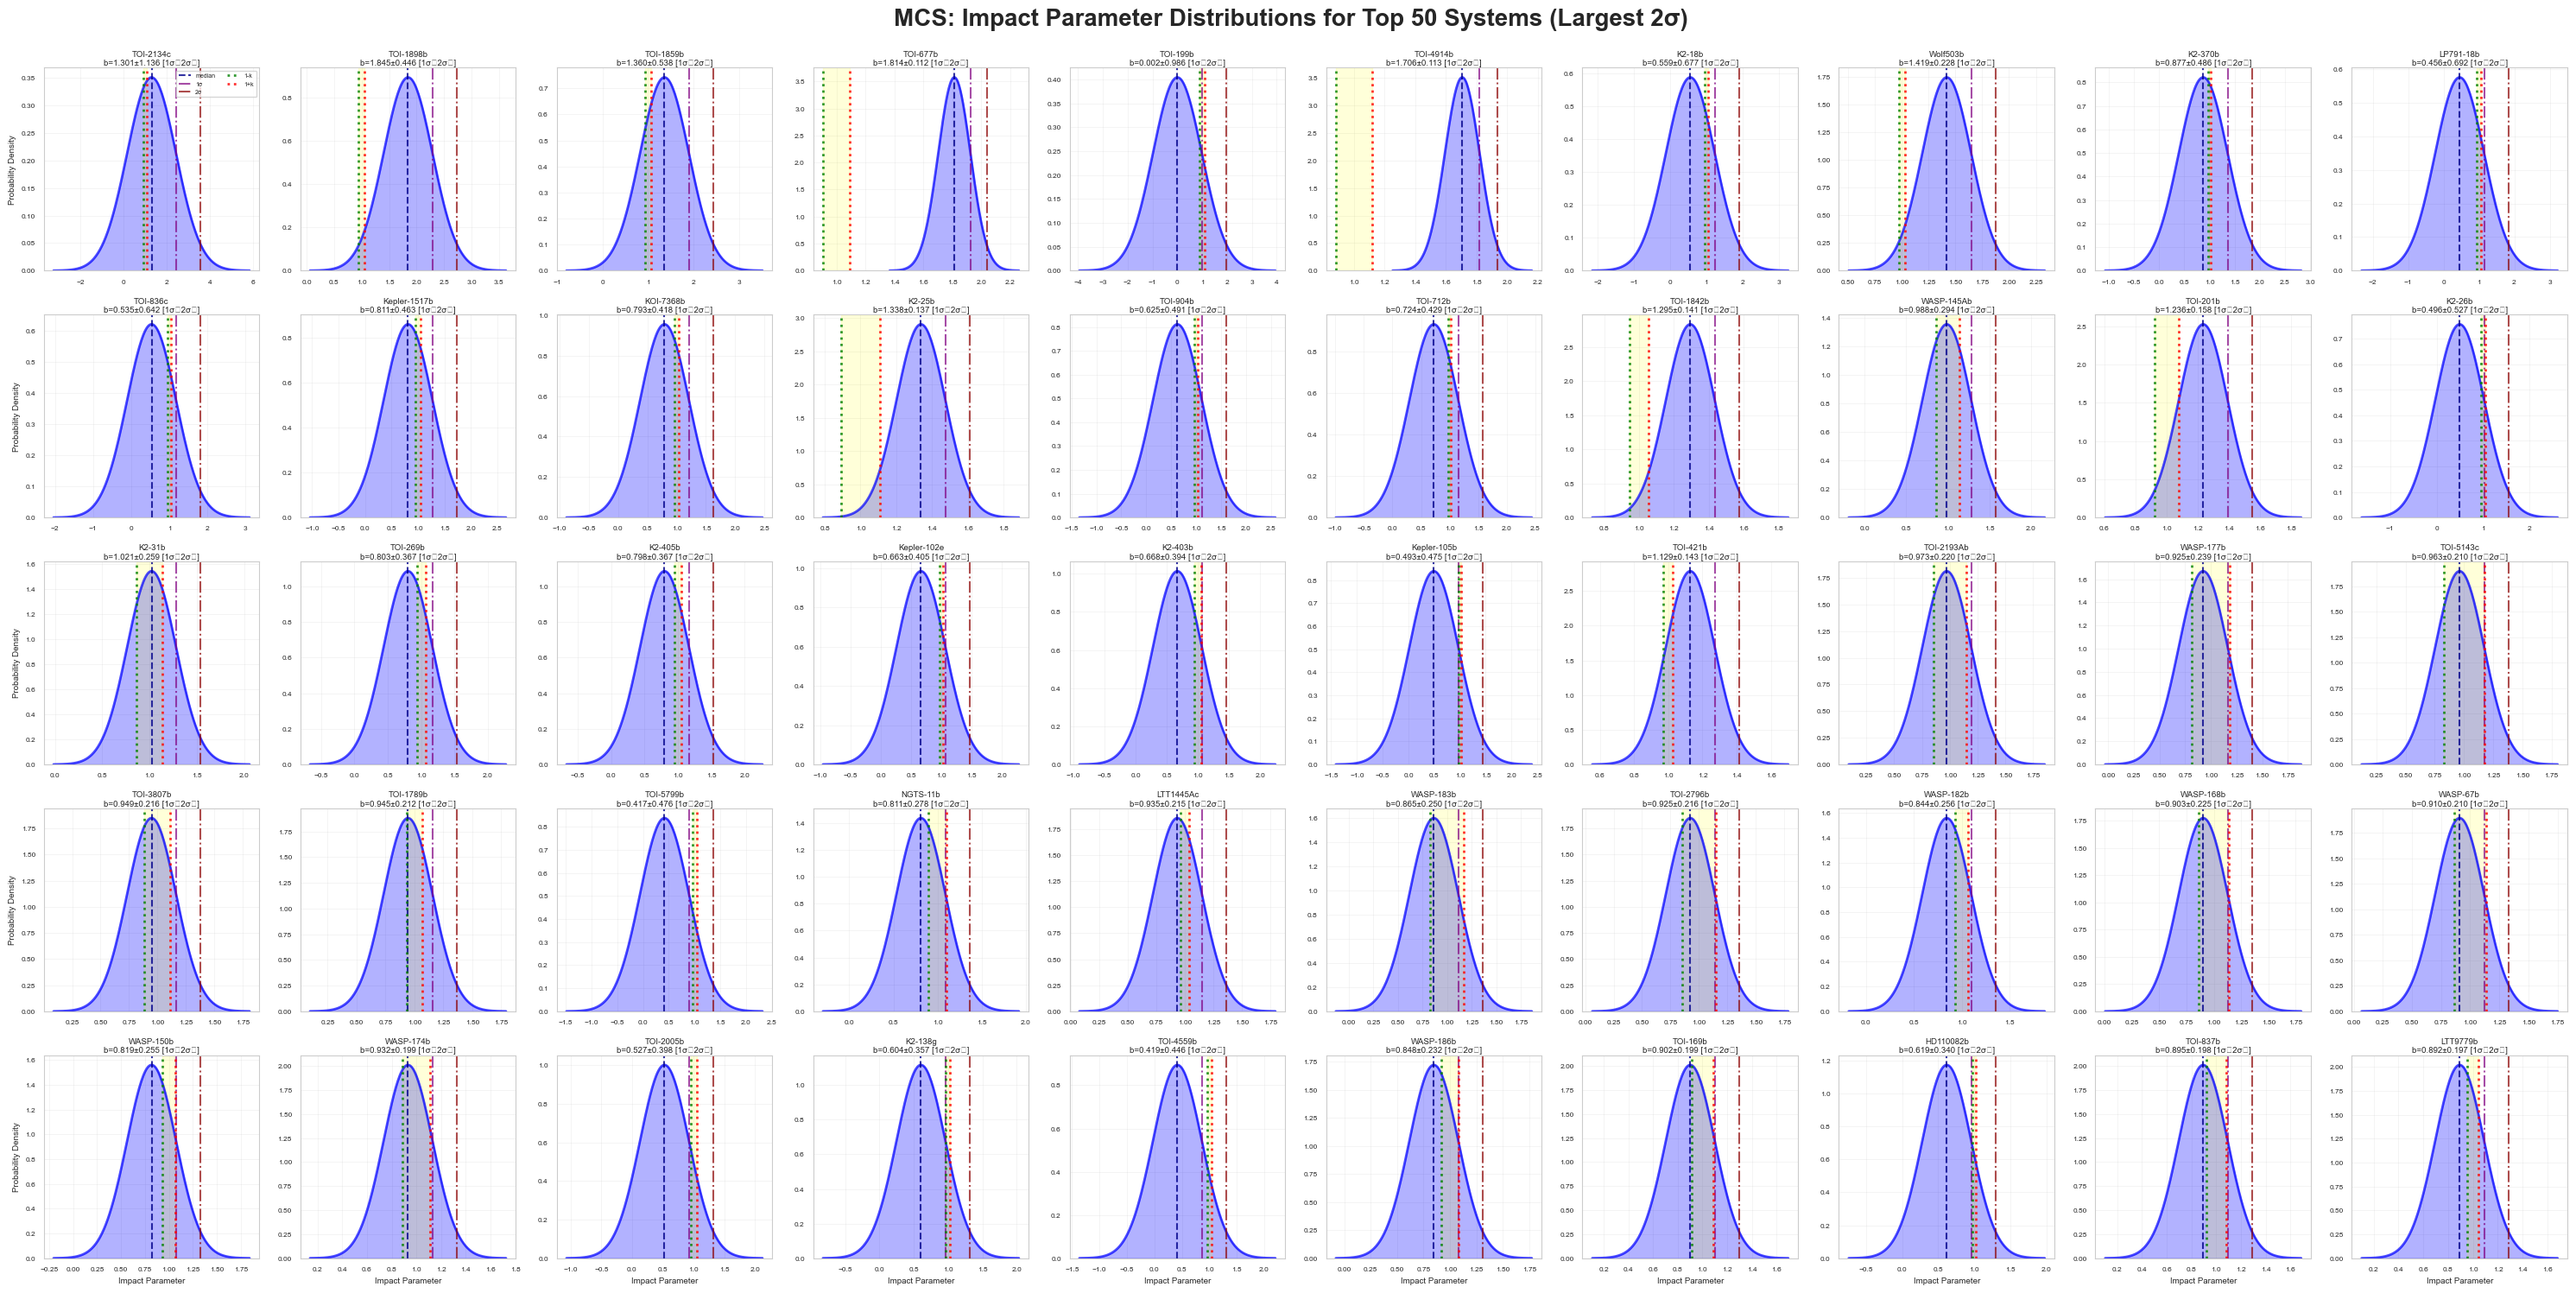


5x10 grid plot completed - showing individual distributions for top 50 MCS systems

📊 Filtering Analysis:
   Systems where 1σ > 1+k: 35/50 (70%)
   Systems where 2σ > 1+k: 50/50 (100%)


In [15]:
# Create a 5x10 grid for the 50 MCS systems
fig, axes = plt.subplots(5, 10, figsize=(30, 15))
fig.suptitle('MCS: Impact Parameter Distributions for Top 50 Systems (Largest 2σ)', 
             fontsize=20, fontweight='bold', y=0.995)

# Get system identifier column
id_col_mcs = top_50_mcs.columns[0]

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Plot each system
for idx, (_, row) in enumerate(top_50_mcs.iterrows()):
    ax = axes_flat[idx]
    
    # Get parameters
    b_median = row['b_occ_median']
    b_std = row['b_occ_std']
    k = row['k_rp_rs']
    boundary_lower = row['boundary_lower']
    boundary_upper = row['boundary_upper']
    system_name = str(row[id_col_mcs])[:15]  # Truncate long names
    
    # Calculate sigma values
    b_1sigma = b_median + 1.0 * b_std
    b_2sigma = b_median + 2.0 * b_std
    
    # Create distribution (assuming Gaussian approximation)
    x = np.linspace(b_median - 4*b_std, b_median + 4*b_std, 200)
    from scipy.stats import norm
    y = norm.pdf(x, b_median, b_std)
    
    # Plot distribution
    ax.plot(x, y, 'b-', linewidth=2, alpha=0.7)
    ax.fill_between(x, y, alpha=0.3, color='blue')
    
    # Add vertical lines for median and sigma values
    ax.axvline(b_median, color='darkblue', linestyle='--', linewidth=1.5, alpha=0.8, label='median')
    ax.axvline(b_1sigma, color='purple', linestyle='-.', linewidth=1.5, alpha=0.7, label='1σ')
    ax.axvline(b_2sigma, color='darkred', linestyle='-.', linewidth=1.5, alpha=0.7, label='2σ')
    
    # Add vertical lines for boundaries
    ax.axvline(boundary_lower, color='green', linestyle=':', linewidth=2, alpha=0.8, label=f'1-k')
    ax.axvline(boundary_upper, color='red', linestyle=':', linewidth=2, alpha=0.8, label=f'1+k')
    
    # Shade grazing regions
    ax.axvspan(boundary_lower, boundary_upper, alpha=0.15, color='yellow')
    
    # Check if system would be flagged
    flagged_1sig = b_1sigma > boundary_upper
    flagged_2sig = b_2sigma > boundary_upper
    flag_status = ""
    if flagged_1sig and flagged_2sig:
        flag_status = " [1σ✗2σ✗]"
    elif flagged_2sig:
        flag_status = " [1σ✓2σ✗]"
    
    # Set title with system name and key values
    ax.set_title(f'{system_name}\nb={b_median:.3f}±{b_std:.3f}{flag_status}', fontsize=7, pad=2)
    
    # Format axes
    ax.tick_params(labelsize=6)
    ax.set_ylim(bottom=0)
    
    # Add grid
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Only show x-label on bottom row
    if idx >= 40:
        ax.set_xlabel('Impact Parameter', fontsize=7)
    
    # Only show y-label on leftmost column
    if idx % 10 == 0:
        ax.set_ylabel('Probability Density', fontsize=7)

# Add legend on first subplot
axes_flat[0].legend(fontsize=5, loc='upper right', ncol=2)

plt.tight_layout()
plt.show()

# Count how many would be flagged
n_flagged_1sig_mcs = sum((top_50_mcs['b_occ_median'] + top_50_mcs['b_occ_std']) > top_50_mcs['boundary_upper'])
n_flagged_2sig_mcs = sum((top_50_mcs['b_occ_median'] + 2.0 * top_50_mcs['b_occ_std']) > top_50_mcs['boundary_upper'])

print("\n5x10 grid plot completed - showing individual distributions for top 50 MCS systems")
print(f"\n📊 Filtering Analysis:")
print(f"   Systems where 1σ > 1+k: {n_flagged_1sig_mcs}/50 ({n_flagged_1sig_mcs/50*100:.0f}%)")
print(f"   Systems where 2σ > 1+k: {n_flagged_2sig_mcs}/50 ({n_flagged_2sig_mcs/50*100:.0f}%)")

### MCS: Impact Parameters with Grazing Boundaries

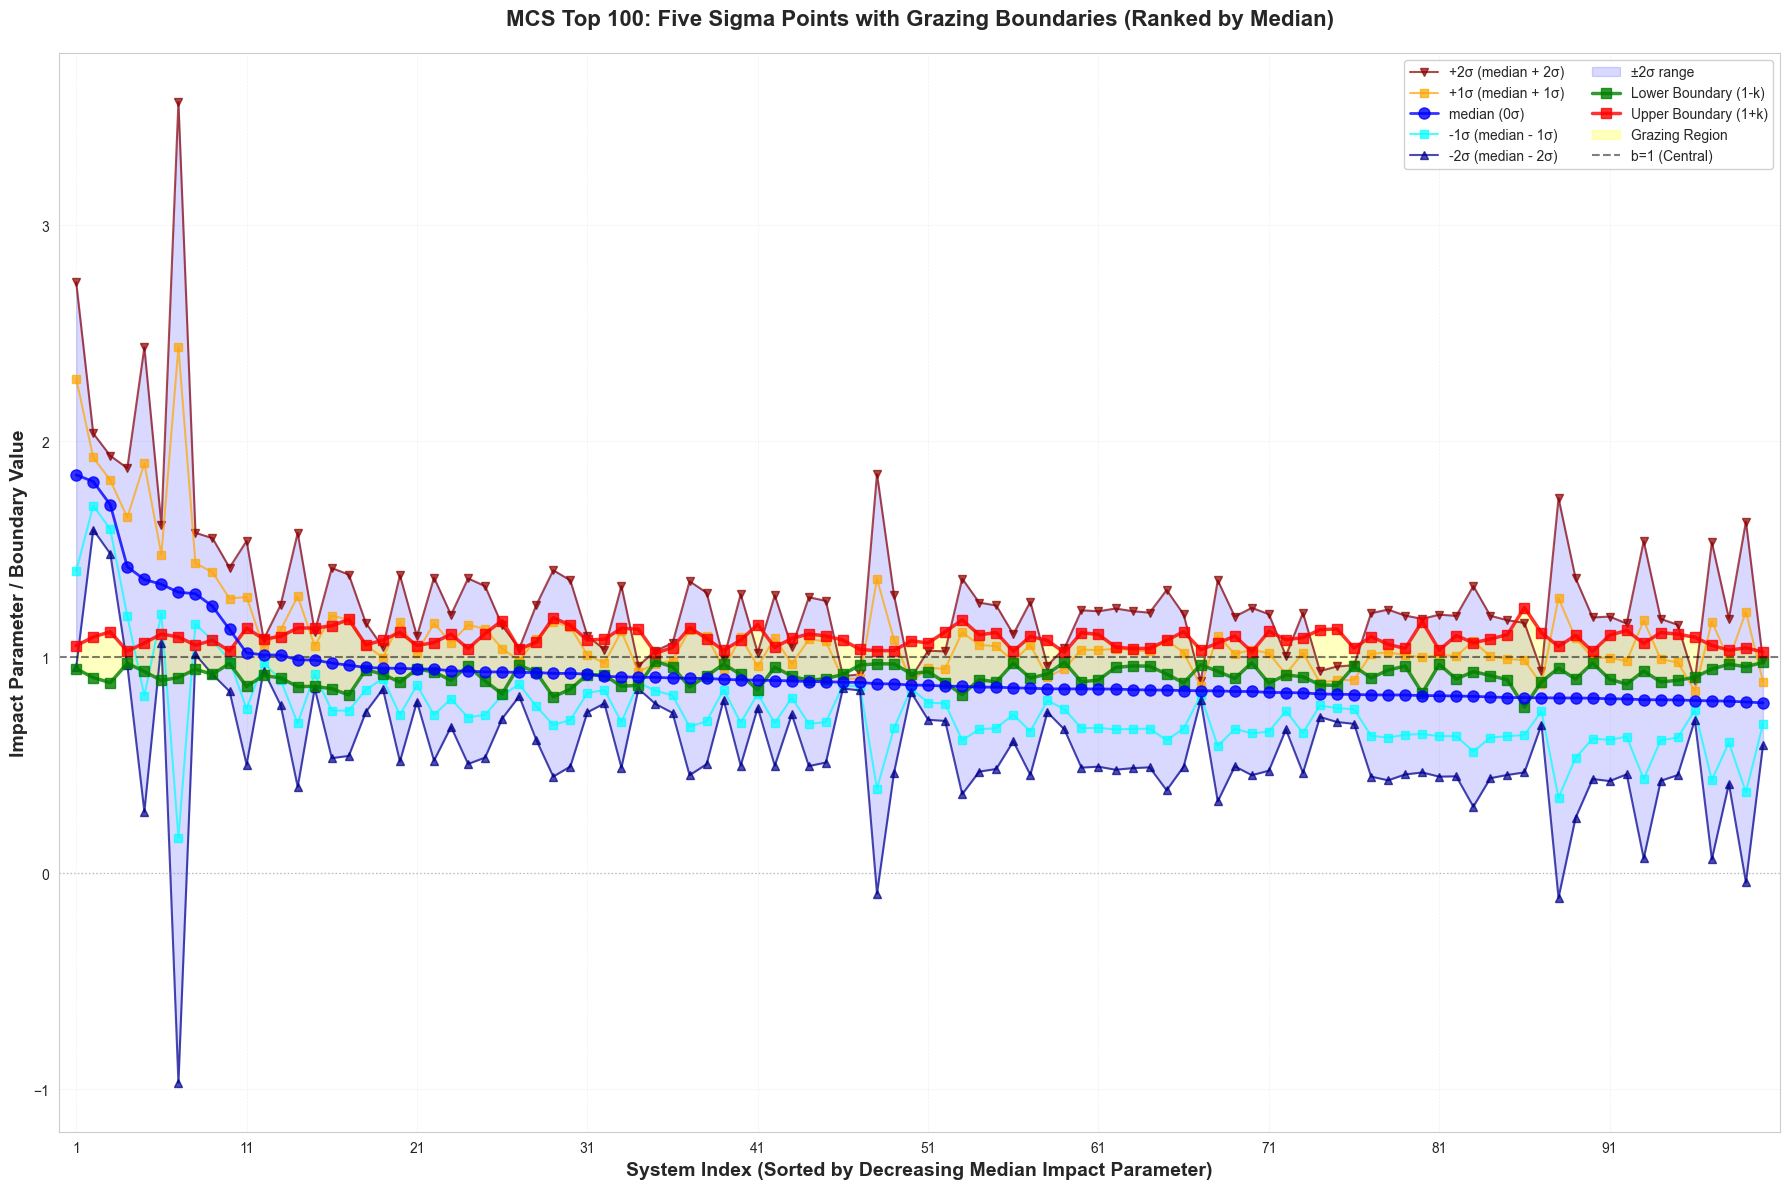


SUMMARY: ALL MCS Systems with Impact Parameter Data
Total systems analyzed: 808

Impact parameter (median) range: -0.9478 to 1.8448
Mean impact parameter: 0.4517 ± 0.2805

Radius ratio (k) range: 0.0066 to 0.2828
Mean radius ratio: 0.0785 ± 0.0396

Eclipse Viability Analysis (All Systems):
  At MEDIAN (0σ): Central=775, Grazing=23, Beyond=10
  At +1σ: Central=686, Grazing=83, Beyond=39 systems
  At +2σ: Central=571, Grazing=101, Beyond=136 systems


In [16]:
# Create comprehensive visualization of MCS impact parameters with grazing boundaries
# Calculate grazing boundaries for df_mcs
df_mcs['boundary_lower'] = 1 - df_mcs['k_rp_rs']
df_mcs['boundary_upper'] = 1 + df_mcs['k_rp_rs']

# Sort by median and take top 100
top_100_mcs = df_mcs.nlargest(100, 'b_occ_median')

fig, ax = plt.subplots(figsize=(18, 12))

# System indices
indices_mcs = np.arange(len(top_100_mcs))

# Extract median and std values for top 100
b_median_mcs_top100 = top_100_mcs['b_occ_median'].values
b_std_mcs_top100 = top_100_mcs['b_occ_std'].values
k_values_mcs_top100 = top_100_mcs['k_rp_rs'].values
boundary_lower_mcs_top100 = top_100_mcs['boundary_lower'].values
boundary_upper_mcs_top100 = top_100_mcs['boundary_upper'].values

# Calculate five sigma points for top 100
b_plus2sig_mcs_top100 = b_median_mcs_top100 + 2.0 * b_std_mcs_top100
b_plus1sig_mcs_top100 = b_median_mcs_top100 + 1.0 * b_std_mcs_top100
b_0sig_mcs_top100 = b_median_mcs_top100
b_minus1sig_mcs_top100 = b_median_mcs_top100 - 1.0 * b_std_mcs_top100
b_minus2sig_mcs_top100 = b_median_mcs_top100 - 2.0 * b_std_mcs_top100

# Plot all five sigma points
ax.plot(indices_mcs, b_plus2sig_mcs_top100, 'v-', color='darkred', markersize=6, linewidth=1.5, 
        alpha=0.7, label='+2σ (median + 2σ)')
ax.plot(indices_mcs, b_plus1sig_mcs_top100, 's-', color='orange', markersize=6, linewidth=1.5, 
        alpha=0.7, label='+1σ (median + 1σ)')
ax.plot(indices_mcs, b_0sig_mcs_top100, 'o-', color='blue', markersize=8, linewidth=2, 
        alpha=0.8, label='median (0σ)', zorder=3)
ax.plot(indices_mcs, b_minus1sig_mcs_top100, 's-', color='cyan', markersize=6, linewidth=1.5, 
        alpha=0.7, label='-1σ (median - 1σ)')
ax.plot(indices_mcs, b_minus2sig_mcs_top100, '^-', color='darkblue', markersize=6, linewidth=1.5, 
        alpha=0.7, label='-2σ (median - 2σ)')

# Fill between sigma values to show distribution spread
ax.fill_between(indices_mcs, b_minus2sig_mcs_top100, b_plus2sig_mcs_top100, alpha=0.15, color='blue', label='±2σ range')

# Plot grazing boundaries
ax.plot(indices_mcs, boundary_lower_mcs_top100, 's-', color='green', 
        markersize=7, linewidth=2.5, alpha=0.8, label='Lower Boundary (1-k)', zorder=2)
ax.plot(indices_mcs, boundary_upper_mcs_top100, 's-', color='red', 
        markersize=7, linewidth=2.5, alpha=0.8, label='Upper Boundary (1+k)', zorder=2)

# Fill grazing region
ax.fill_between(indices_mcs, boundary_lower_mcs_top100, boundary_upper_mcs_top100, 
                alpha=0.25, color='yellow', label='Grazing Region', zorder=1)

# Add reference lines
ax.axhline(y=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='b=1 (Central)')
ax.axhline(y=0.0, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Formatting
ax.set_xlabel('System Index (Sorted by Decreasing Median Impact Parameter)', fontsize=14, fontweight='bold')
ax.set_ylabel('Impact Parameter / Boundary Value', fontsize=14, fontweight='bold')
ax.set_title('MCS Top 100: Five Sigma Points with Grazing Boundaries (Ranked by Median)', 
             fontsize=16, fontweight='bold', pad=20)

# Set x-axis
ax.set_xlim(-1, len(top_100_mcs))
ax.set_xticks(np.arange(0, len(top_100_mcs), 10))
ax.set_xticklabels(np.arange(1, len(top_100_mcs)+1, 10))

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Legend with two columns
ax.legend(loc='upper right', fontsize=10, framealpha=0.9, ncol=2)

plt.tight_layout()
plt.show()

# Print summary statistics for ENTIRE dataset
print("\n" + "="*70)
print("SUMMARY: ALL MCS Systems with Impact Parameter Data")
print("="*70)

# Extract data for all systems
b_median_mcs_all = df_mcs['b_occ_median'].values
b_std_mcs_all = df_mcs['b_occ_std'].values
k_values_mcs_all = df_mcs['k_rp_rs'].values
boundary_lower_mcs_all = df_mcs['boundary_lower'].values
boundary_upper_mcs_all = df_mcs['boundary_upper'].values
b_plus2sig_mcs_all = b_median_mcs_all + 2.0 * b_std_mcs_all
b_plus1sig_mcs_all = b_median_mcs_all + 1.0 * b_std_mcs_all
b_0sig_mcs_all = b_median_mcs_all

print(f"Total systems analyzed: {len(df_mcs)}")
print(f"\nImpact parameter (median) range: {b_median_mcs_all.min():.4f} to {b_median_mcs_all.max():.4f}")
print(f"Mean impact parameter: {b_median_mcs_all.mean():.4f} ± {b_median_mcs_all.std():.4f}")
print(f"\nRadius ratio (k) range: {k_values_mcs_all.min():.4f} to {k_values_mcs_all.max():.4f}")
print(f"Mean radius ratio: {k_values_mcs_all.mean():.4f} ± {k_values_mcs_all.std():.4f}")

# Count systems by eclipse viability for entire dataset
print(f"\nEclipse Viability Analysis (All Systems):")
central_0_mcs_all = np.sum(b_0sig_mcs_all < boundary_lower_mcs_all)
grazing_0_mcs_all = np.sum((b_0sig_mcs_all >= boundary_lower_mcs_all) & (b_0sig_mcs_all <= boundary_upper_mcs_all))
beyond_0_mcs_all = np.sum(b_0sig_mcs_all > boundary_upper_mcs_all)
print(f"  At MEDIAN (0σ): Central={central_0_mcs_all}, Grazing={grazing_0_mcs_all}, Beyond={beyond_0_mcs_all}")

# At +1σ
central_1sig_mcs_all = np.sum(b_plus1sig_mcs_all < boundary_lower_mcs_all)
grazing_1sig_mcs_all = np.sum((b_plus1sig_mcs_all >= boundary_lower_mcs_all) & (b_plus1sig_mcs_all <= boundary_upper_mcs_all))
beyond_1sig_mcs_all = np.sum(b_plus1sig_mcs_all > boundary_upper_mcs_all)
print(f"  At +1σ: Central={central_1sig_mcs_all}, Grazing={grazing_1sig_mcs_all}, Beyond={beyond_1sig_mcs_all} systems")

# At +2σ
central_2sig_mcs_all = np.sum(b_plus2sig_mcs_all < boundary_lower_mcs_all)
grazing_2sig_mcs_all = np.sum((b_plus2sig_mcs_all >= boundary_lower_mcs_all) & (b_plus2sig_mcs_all <= boundary_upper_mcs_all))
beyond_2sig_mcs_all = np.sum(b_plus2sig_mcs_all > boundary_upper_mcs_all)
print(f"  At +2σ: Central={central_2sig_mcs_all}, Grazing={grazing_2sig_mcs_all}, Beyond={beyond_2sig_mcs_all} systems")
print("="*70)

### MCS: 2σ Threshold Filtering - Full Catalog

In [17]:
# Apply 2σ filtering to the ENTIRE MCS catalog
print("="*80)
print("MCS: 2σ THRESHOLD FILTERING - ENTIRE CATALOG")
print("="*80)

# Calculate boundaries for all MCS systems
df_mcs['boundary_lower'] = 1 - df_mcs['k_rp_rs']
df_mcs['boundary_upper'] = 1 + df_mcs['k_rp_rs']

# Calculate 2σ threshold (median + 2σ)
df_mcs['b_95th'] = df_mcs['b_occ_median'] + 2.0 * df_mcs['b_occ_std']

# Flag systems where 95th percentile exceeds upper boundary
df_mcs['no_eclipse_95th'] = df_mcs['b_95th'] > df_mcs['boundary_upper']

# Count flagged systems
n_total_mcs = len(df_mcs)
n_flagged_mcs = df_mcs['no_eclipse_95th'].sum()
n_retained_mcs = n_total_mcs - n_flagged_mcs

print(f"\n📊 FILTERING RESULTS:")
print(f"   Total systems in MCS catalog: {n_total_mcs}")
print(f"   Systems flagged as NO_ECLIPSE: {n_flagged_mcs} ({n_flagged_mcs/n_total_mcs*100:.1f}%)")
print(f"   Systems RETAINED (potential eclipses): {n_retained_mcs} ({n_retained_mcs/n_total_mcs*100:.1f}%)")

# Also calculate for 84th percentile for comparison
df_mcs['b_84th'] = df_mcs['b_occ_median'] + df_mcs['b_occ_std']
df_mcs['no_eclipse_84th'] = df_mcs['b_84th'] > df_mcs['boundary_upper']
n_flagged_84th_mcs = df_mcs['no_eclipse_84th'].sum()
n_retained_84th_mcs = n_total_mcs - n_flagged_84th_mcs

print(f"\n📊 COMPARISON WITH 84TH PERCENTILE:")
print(f"   84th percentile (median + 1σ):")
print(f"      → Flagged: {n_flagged_84th_mcs} ({n_flagged_84th_mcs/n_total_mcs*100:.1f}%)")
print(f"      → Retained: {n_retained_84th_mcs} ({n_retained_84th_mcs/n_total_mcs*100:.1f}%)")
print(f"\n   2σ threshold (median + 2σ):")
print(f"      → Flagged: {n_flagged_mcs} ({n_flagged_mcs/n_total_mcs*100:.1f}%)")
print(f"      → Retained: {n_retained_mcs} ({n_retained_mcs/n_total_mcs*100:.1f}%)")

difference_mcs = n_flagged_84th_mcs - n_flagged_mcs
print(f"\n📈 DIFFERENCE:")
print(f"   Moving to 2σ threshold RETAINS {difference_mcs} more systems")
print(f"   ({difference_mcs/n_total_mcs*100:.1f}% of total MCS catalog)")

print("\n" + "="*80)

MCS: 2σ THRESHOLD FILTERING - ENTIRE CATALOG

📊 FILTERING RESULTS:
   Total systems in MCS catalog: 808
   Systems flagged as NO_ECLIPSE: 136 (16.8%)
   Systems RETAINED (potential eclipses): 672 (83.2%)

📊 COMPARISON WITH 84TH PERCENTILE:
   84th percentile (median + 1σ):
      → Flagged: 39 (4.8%)
      → Retained: 769 (95.2%)

   2σ threshold (median + 2σ):
      → Flagged: 136 (16.8%)
      → Retained: 672 (83.2%)

📈 DIFFERENCE:
   Moving to 2σ threshold RETAINS -97 more systems
   (-12.0% of total MCS catalog)



In [18]:
# Show statistics for MCS retained systems
print("="*80)
print("MCS: STATISTICS FOR RETAINED SYSTEMS (2σ Threshold Filtering)")
print("="*80)

retained_systems_mcs = df_mcs[~df_mcs['no_eclipse_95th']].copy()

print(f"\n📊 Sample Size: {len(retained_systems_mcs)} systems")
print(f"\nImpact Parameter Statistics:")
print(f"   Mean: {retained_systems_mcs['b_occ_median'].mean():.4f} ± {retained_systems_mcs['b_occ_median'].std():.4f}")
print(f"   Median: {retained_systems_mcs['b_occ_median'].median():.4f}")
print(f"   Range: {retained_systems_mcs['b_occ_median'].min():.4f} to {retained_systems_mcs['b_occ_median'].max():.4f}")

print(f"\nRadius Ratio (k) Statistics:")
print(f"   Mean: {retained_systems_mcs['k_rp_rs'].mean():.4f} ± {retained_systems_mcs['k_rp_rs'].std():.4f}")
print(f"   Median: {retained_systems_mcs['k_rp_rs'].median():.4f}")
print(f"   Range: {retained_systems_mcs['k_rp_rs'].min():.4f} to {retained_systems_mcs['k_rp_rs'].max():.4f}")

# Eclipse geometry breakdown
b_values_retained_mcs = retained_systems_mcs['b_occ_median'].values
boundary_lower_retained_mcs = retained_systems_mcs['boundary_lower'].values
boundary_upper_retained_mcs = retained_systems_mcs['boundary_upper'].values

n_central_mcs = np.sum(b_values_retained_mcs < boundary_lower_retained_mcs)
n_grazing_mcs = np.sum((b_values_retained_mcs >= boundary_lower_retained_mcs) & (b_values_retained_mcs <= boundary_upper_retained_mcs))
n_beyond_mcs = np.sum(b_values_retained_mcs > boundary_upper_retained_mcs)

print(f"\nEclipse Geometry Breakdown:")
print(f"   Central/Deep (b < 1-k): {n_central_mcs} ({n_central_mcs/len(retained_systems_mcs)*100:.1f}%)")
print(f"   Grazing (1-k ≤ b ≤ 1+k): {n_grazing_mcs} ({n_grazing_mcs/len(retained_systems_mcs)*100:.1f}%)")
print(f"   Beyond grazing (b > 1+k): {n_beyond_mcs} ({n_beyond_mcs/len(retained_systems_mcs)*100:.1f}%)")
print(f"      (But 2σ value < 1+k, so still potential eclipses)")

print("="*80)

MCS: STATISTICS FOR RETAINED SYSTEMS (2σ Threshold Filtering)

📊 Sample Size: 672 systems

Impact Parameter Statistics:
   Mean: 0.3819 ± 0.2282
   Median: 0.3478
   Range: -0.9478 to 1.0106

Radius Ratio (k) Statistics:
   Mean: 0.0804 ± 0.0396
   Median: 0.0810
   Range: 0.0066 to 0.2828

Eclipse Geometry Breakdown:
   Central/Deep (b < 1-k): 665 (99.0%)
   Grazing (1-k ≤ b ≤ 1+k): 7 (1.0%)
   Beyond grazing (b > 1+k): 0 (0.0%)
      (But 2σ value < 1+k, so still potential eclipses)


---

## Validation: Cross-Check with Raw Data

Validate the filtering thresholds by checking against observed eclipse data from the raw datasets.

In [19]:
# Load raw data to check for observed eclipses
raw_tpc_path = Path('../../data/raw/Ariel_MCS_TPCs_2025-07-18.csv')
raw_mcs_path = Path('../../data/raw/Ariel_MCS_Known_2025-07-18.csv')

df_raw_tpc = pd.read_csv(raw_tpc_path)
df_raw_mcs = pd.read_csv(raw_mcs_path)

print(f"Raw TPC data loaded: {len(df_raw_tpc)} systems")
print(f"Raw MCS data loaded: {len(df_raw_mcs)} systems")

# Check what eclipse-related columns are available
eclipse_cols_tpc = [col for col in df_raw_tpc.columns if 'eclipse' in col.lower() or 'Eclipse' in col]
print(f"\nEclipse-related columns in TPC raw data:")
for col in eclipse_cols_tpc:
    print(f"   - {col}")

eclipse_cols_mcs = [col for col in df_raw_mcs.columns if 'eclipse' in col.lower() or 'Eclipse' in col]
print(f"\nEclipse-related columns in MCS raw data:")
for col in eclipse_cols_mcs:
    print(f"   - {col}")

Raw TPC data loaded: 2046 systems
Raw MCS data loaded: 808 systems

Eclipse-related columns in TPC raw data:
   - Eclipse Duration E14 [s]
   - Eclipse Mid Time
   - Available Eclipses
   - Tier 1 Eclipses
   - Tier 2 Eclipses
   - Tier 3 Eclipses

Eclipse-related columns in MCS raw data:
   - Eclipse Depth [%]
   - Eclipse Depth Error Lower [%]
   - Eclipse Depth Error Upper [%]
   - Eclipse Flag
   - Eclipse
   - Eclipse Impact Parameter
   - Eclipse Duration E14 [s]
   - Eclipse Duration E12 [s]
   - Eclipse Duration E23 [s]
   - Planet Eclipse Temperature [K]
   - Eclipse Mid Time
   - Available Eclipses
   - Tier 1 Eclipses
   - Tier 2 Eclipses
   - Tier 3 Eclipses


### MCS Validation: 1σ vs 2σ Filtering Against Observed Eclipses

In [20]:
# Merge MCS MCMC results with raw data
id_col_mcs = df_mcs.columns[0]  # 'Planet' in MCMC data
print(f"ID column in MCS MCMC data: {id_col_mcs}")
print(f"Matching column in raw MCS data: 'Planet Name'")

# Convert both ID columns to string to ensure type compatibility
df_mcs_str = df_mcs.copy()
df_mcs_str[id_col_mcs] = df_mcs_str[id_col_mcs].astype(str)
df_raw_mcs_str = df_raw_mcs.copy()
df_raw_mcs_str['Planet Name'] = df_raw_mcs_str['Planet Name'].astype(str)

# Merge datasets using the correct Planet Name column
df_mcs_merged = df_mcs_str.merge(df_raw_mcs_str, left_on=id_col_mcs, right_on='Planet Name', how='inner')

print(f"\n✓ Merged {len(df_mcs_merged)} MCS systems between MCMC results and raw data")
print(f"  (Started with {len(df_mcs)} in MCMC, {len(df_raw_mcs)} in raw)")

# Use Eclipse Flag (boolean) to identify systems with OBSERVED eclipses
if 'Eclipse Flag' in df_mcs_merged.columns:
    df_mcs_merged['has_observed_eclipse'] = df_mcs_merged['Eclipse Flag']
    n_with_eclipses_mcs = df_mcs_merged['has_observed_eclipse'].sum()
    print(f"\n✓ 'Eclipse Flag' column found - indicates OBSERVED eclipses")
    print(f"  Systems with observed eclipses: {n_with_eclipses_mcs} ({n_with_eclipses_mcs/len(df_mcs_merged)*100:.1f}%)")
    print(f"  Systems without observed eclipses: {(~df_mcs_merged['has_observed_eclipse']).sum()}")
else:
    print(f"\n⚠️  'Eclipse Flag' column not found in MCS data")

ID column in MCS MCMC data: Planet
Matching column in raw MCS data: 'Planet Name'

✓ Merged 808 MCS systems between MCMC results and raw data
  (Started with 808 in MCMC, 808 in raw)

✓ 'Eclipse Flag' column found - indicates OBSERVED eclipses
  Systems with observed eclipses: 99 (12.3%)
  Systems without observed eclipses: 709


In [21]:
# Check eclipse-related columns in raw MCS data to identify the right indicator
print("="*80)
print("ECLIPSE COLUMNS ANALYSIS - RAW MCS DATA")
print("="*80)

eclipse_cols = ['Eclipse Flag', 'Eclipse', 'Available Eclipses', 'Eclipse Depth [%]', 
                'Tier 1 Eclipses', 'Tier 2 Eclipses', 'Tier 3 Eclipses']

for col in eclipse_cols:
    if col in df_raw_mcs.columns:
        print(f"\n{col}:")
        print(f"  Data type: {df_raw_mcs[col].dtype}")
        print(f"  Non-null: {df_raw_mcs[col].notna().sum()}/{len(df_raw_mcs)}")
        print(f"  Unique values: {df_raw_mcs[col].nunique()}")
        print(f"  Value counts:")
        print(df_raw_mcs[col].value_counts(dropna=False).head(10))
        
        # Show sample rows with different values
        if df_raw_mcs[col].dtype in ['int64', 'float64']:
            if (df_raw_mcs[col] > 0).sum() > 0:
                print(f"\n  Sample rows where {col} > 0:")
                sample_cols = ['Planet Name', col, 'Eclipse Depth [%]' if 'Eclipse Depth [%]' in df_raw_mcs.columns else col]
                print(df_raw_mcs[df_raw_mcs[col] > 0][sample_cols].head(5))
        else:
            # For non-numeric columns
            unique_vals = df_raw_mcs[col].unique()
            print(f"  Unique values: {unique_vals[:10]}")
    else:
        print(f"\n{col}: NOT FOUND")

print("="*80)

ECLIPSE COLUMNS ANALYSIS - RAW MCS DATA

Eclipse Flag:
  Data type: bool
  Non-null: 808/808
  Unique values: 2
  Value counts:
Eclipse Flag
False    709
True      99
Name: count, dtype: int64
  Unique values: [False  True]

Eclipse:
  Data type: object
  Non-null: 808/808
  Unique values: 4
  Value counts:
Eclipse
TRUE            766
Semi-Grazing     26
FALSE            11
Grazing           5
Name: count, dtype: int64
  Unique values: ['TRUE' 'FALSE' 'Semi-Grazing' 'Grazing']

Available Eclipses:
  Data type: int64
  Non-null: 808/808
  Unique values: 339
  Value counts:
Available Eclipses
94     15
0      11
82      8
105     8
101     8
121     8
30      7
77      7
115     7
120     7
Name: count, dtype: int64

  Sample rows where Available Eclipses > 0:
  Planet Name  Available Eclipses  Eclipse Depth [%]
0     K2-232b                  31                NaN
1   Qatar-10b                 757                NaN
2    WASP-60b                  89                NaN
3    WASP-20b      

In [22]:
# Validation for MCS
print("="*80)
print("MCS VALIDATION: FILTERING PERFORMANCE AGAINST OBSERVED ECLIPSES")
print("="*80)

if 'has_observed_eclipse' in df_mcs_merged.columns:
    # Add boundary columns if not present
    if 'boundary_upper' not in df_mcs_merged.columns:
        df_mcs_merged['boundary_lower'] = 1 - df_mcs_merged['k_rp_rs']
        df_mcs_merged['boundary_upper'] = 1 + df_mcs_merged['k_rp_rs']
    
    # Add filtering flags if not present
    if 'no_eclipse_84th' not in df_mcs_merged.columns:
        df_mcs_merged['no_eclipse_84th'] = df_mcs_merged['b_occ_84'] > df_mcs_merged['boundary_upper']
        df_mcs_merged['no_eclipse_95th'] = (df_mcs_merged['b_occ_median'] + 2.0 * df_mcs_merged['b_occ_std']) > df_mcs_merged['boundary_upper']
    
    with_eclipses_mcs = df_mcs_merged[df_mcs_merged['has_observed_eclipse']]
    without_eclipses_mcs = df_mcs_merged[~df_mcs_merged['has_observed_eclipse']]
    
    # Check if Transit Flag exists to identify transiting systems without eclipses
    if 'Transit Flag' in df_mcs_merged.columns:
        transits_no_eclipse_mcs = df_mcs_merged[(df_mcs_merged['Transit Flag'] == True) & (df_mcs_merged['has_observed_eclipse'] == False)]
        has_transit_flag = True
    else:
        has_transit_flag = False
    
    print(f"\n📊 Dataset Breakdown:")
    print(f"   Total systems: {len(df_mcs_merged)}")
    print(f"   With observed eclipses: {len(with_eclipses_mcs)} ({len(with_eclipses_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   Without observed eclipses: {len(without_eclipses_mcs)} ({len(without_eclipses_mcs)/len(df_mcs_merged)*100:.1f}%)")
    if has_transit_flag:
        print(f"   Transit=True but Eclipse=False: {len(transits_no_eclipse_mcs)} ({len(transits_no_eclipse_mcs)/len(df_mcs_merged)*100:.1f}%)")
    
    # MEDIAN (0σ) filtering - using boundary directly
    flagged_0sig_mcs = df_mcs_merged[df_mcs_merged['b_occ_median'] > df_mcs_merged['boundary_upper']]
    retained_0sig_mcs = df_mcs_merged[df_mcs_merged['b_occ_median'] <= df_mcs_merged['boundary_upper']]
    
    flagged_0sig_with_eclipse_mcs = flagged_0sig_mcs[flagged_0sig_mcs['has_observed_eclipse']]
    retained_0sig_with_eclipse_mcs = retained_0sig_mcs[retained_0sig_mcs['has_observed_eclipse']]
    
    # 1σ filtering
    flagged_1sig_mcs = df_mcs_merged[df_mcs_merged['no_eclipse_84th']]
    retained_1sig_mcs = df_mcs_merged[~df_mcs_merged['no_eclipse_84th']]
    
    flagged_1sig_with_eclipse_mcs = flagged_1sig_mcs[flagged_1sig_mcs['has_observed_eclipse']]
    retained_1sig_with_eclipse_mcs = retained_1sig_mcs[retained_1sig_mcs['has_observed_eclipse']]
    
    # 2σ filtering
    flagged_2sig_mcs = df_mcs_merged[df_mcs_merged['no_eclipse_95th']]
    retained_2sig_mcs = df_mcs_merged[~df_mcs_merged['no_eclipse_95th']]
    
    flagged_2sig_with_eclipse_mcs = flagged_2sig_mcs[flagged_2sig_mcs['has_observed_eclipse']]
    retained_2sig_with_eclipse_mcs = retained_2sig_mcs[retained_2sig_mcs['has_observed_eclipse']]
    
    print(f"\n🚫 MEDIAN (0σ) FILTERING - b_median > upper_boundary:")
    print(f"   Systems flagged: {len(flagged_0sig_mcs)} ({len(flagged_0sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   Systems retained: {len(retained_0sig_mcs)} ({len(retained_0sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   ❌ False Positives (flagged with eclipses): {len(flagged_0sig_with_eclipse_mcs)} ({len(flagged_0sig_with_eclipse_mcs)/len(flagged_0sig_mcs)*100:.1f}% of flagged)" if len(flagged_0sig_mcs) > 0 else "   ❌ False Positives: 0 (no systems flagged)")
    print(f"   ✓ Correct Retentions (retained with eclipses): {len(retained_0sig_with_eclipse_mcs)}/{len(with_eclipses_mcs)} ({len(retained_0sig_with_eclipse_mcs)/len(with_eclipses_mcs)*100:.1f}%)")
    
    print(f"\n🚫 1σ FILTERING - (b_median + 1σ) > upper_boundary:")
    print(f"   Systems flagged: {len(flagged_1sig_mcs)} ({len(flagged_1sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   Systems retained: {len(retained_1sig_mcs)} ({len(retained_1sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   ❌ False Positives (flagged with eclipses): {len(flagged_1sig_with_eclipse_mcs)} ({len(flagged_1sig_with_eclipse_mcs)/len(flagged_1sig_mcs)*100:.1f}% of flagged)" if len(flagged_1sig_mcs) > 0 else "   ❌ False Positives: 0 (no systems flagged)")
    print(f"   ✓ Correct Retentions (retained with eclipses): {len(retained_1sig_with_eclipse_mcs)}/{len(with_eclipses_mcs)} ({len(retained_1sig_with_eclipse_mcs)/len(with_eclipses_mcs)*100:.1f}%)")
    
    print(f"\n🚫 2σ FILTERING - (b_median + 2σ) > upper_boundary:")
    print(f"   Systems flagged: {len(flagged_2sig_mcs)} ({len(flagged_2sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   Systems retained: {len(retained_2sig_mcs)} ({len(retained_2sig_mcs)/len(df_mcs_merged)*100:.1f}%)")
    print(f"   ❌ False Positives (flagged with eclipses): {len(flagged_2sig_with_eclipse_mcs)} ({len(flagged_2sig_with_eclipse_mcs)/len(flagged_2sig_mcs)*100:.1f}% of flagged)" if len(flagged_2sig_mcs) > 0 else "   ❌ False Positives: 0 (no systems flagged)")
    print(f"   ✓ Correct Retentions (retained with eclipses): {len(retained_2sig_with_eclipse_mcs)}/{len(with_eclipses_mcs)} ({len(retained_2sig_with_eclipse_mcs)/len(with_eclipses_mcs)*100:.1f}%)")
    
    if len(with_eclipses_mcs) > 0:
        print(f"\n📈 SUMMARY FOR SYSTEMS WITH ECLIPSES (N={len(with_eclipses_mcs)}):")
        print(f"   Median (0σ): {len(retained_0sig_with_eclipse_mcs)} correctly retained, {len(flagged_0sig_with_eclipse_mcs)} incorrectly flagged")
        print(f"   1σ (84th):   {len(retained_1sig_with_eclipse_mcs)} correctly retained, {len(flagged_1sig_with_eclipse_mcs)} incorrectly flagged")
        print(f"   2σ (95th):   {len(retained_2sig_with_eclipse_mcs)} correctly retained, {len(flagged_2sig_with_eclipse_mcs)} incorrectly flagged")
        print(f"\n   → Using 2σ would incorrectly flag {len(flagged_2sig_with_eclipse_mcs)} systems that DO have observed eclipses")
    
    # Analysis for transiting systems without eclipses
    if has_transit_flag and len(transits_no_eclipse_mcs) > 0:
        flagged_0sig_transit_no_eclipse = flagged_0sig_mcs.merge(transits_no_eclipse_mcs[['Planet Name']], on='Planet Name', how='inner')
        flagged_1sig_transit_no_eclipse = flagged_1sig_mcs.merge(transits_no_eclipse_mcs[['Planet Name']], on='Planet Name', how='inner')
        flagged_2sig_transit_no_eclipse = flagged_2sig_mcs.merge(transits_no_eclipse_mcs[['Planet Name']], on='Planet Name', how='inner')
        
        print(f"\n📈 ANALYSIS FOR TRANSITING SYSTEMS WITHOUT ECLIPSES (N={len(transits_no_eclipse_mcs)}):")
        print(f"   These systems have transits but NO observed eclipses - should ideally be flagged")
        print(f"\n   Median (0σ): {len(flagged_0sig_transit_no_eclipse)} correctly flagged ({len(flagged_0sig_transit_no_eclipse)/len(transits_no_eclipse_mcs)*100:.1f}%)")
        print(f"   1σ (84th):   {len(flagged_1sig_transit_no_eclipse)} correctly flagged ({len(flagged_1sig_transit_no_eclipse)/len(transits_no_eclipse_mcs)*100:.1f}%)")
        print(f"   2σ (95th):   {len(flagged_2sig_transit_no_eclipse)} correctly flagged ({len(flagged_2sig_transit_no_eclipse)/len(transits_no_eclipse_mcs)*100:.1f}%)")
        print(f"\n   → 2σ correctly identifies {len(flagged_2sig_transit_no_eclipse) - len(flagged_1sig_transit_no_eclipse)} more transit-only systems than 1σ")
        print(f"   → 1σ correctly identifies {len(flagged_1sig_transit_no_eclipse) - len(flagged_0sig_transit_no_eclipse)} more transit-only systems than median")
    
else:
    print("\n⚠️  Cannot perform validation - no observed eclipse data available")
    
print("="*80)

MCS VALIDATION: FILTERING PERFORMANCE AGAINST OBSERVED ECLIPSES

📊 Dataset Breakdown:
   Total systems: 808
   With observed eclipses: 99 (12.3%)
   Without observed eclipses: 709 (87.7%)
   Transit=True but Eclipse=False: 709 (87.7%)

🚫 MEDIAN (0σ) FILTERING - b_median > upper_boundary:
   Systems flagged: 10 (1.2%)
   Systems retained: 798 (98.8%)
   ❌ False Positives (flagged with eclipses): 0 (0.0% of flagged)
   ✓ Correct Retentions (retained with eclipses): 99/99 (100.0%)

🚫 1σ FILTERING - (b_median + 1σ) > upper_boundary:
   Systems flagged: 39 (4.8%)
   Systems retained: 769 (95.2%)
   ❌ False Positives (flagged with eclipses): 1 (2.6% of flagged)
   ✓ Correct Retentions (retained with eclipses): 98/99 (99.0%)

🚫 2σ FILTERING - (b_median + 2σ) > upper_boundary:
   Systems flagged: 136 (16.8%)
   Systems retained: 672 (83.2%)
   ❌ False Positives (flagged with eclipses): 7 (5.1% of flagged)
   ✓ Correct Retentions (retained with eclipses): 92/99 (92.9%)

📈 SUMMARY FOR SYSTEMS WI

In [23]:
# Analyze eclipse depth for different categories of systems
print("="*80)
print("ECLIPSE DEPTH ANALYSIS: MEASURED vs PREDICTED")
print("="*80)

if 'Eclipse Depth [%]' in df_mcs_merged.columns:
    # First, let's understand what the Eclipse Depth column contains
    print("\n🔍 UNDERSTANDING THE DATA:")
    print(f"  Total systems with Eclipse Depth values: {df_mcs_merged['Eclipse Depth [%]'].notna().sum()}")
    print(f"  Systems with observed eclipses: {(df_mcs_merged['has_observed_eclipse'] == True).sum()}")
    print(f"  Systems without observed eclipses: {(df_mcs_merged['has_observed_eclipse'] == False).sum()}")
    
    # Check what fraction of each group has depth values
    with_eclipse_has_depth = df_mcs_merged[df_mcs_merged['has_observed_eclipse'] == True]['Eclipse Depth [%]'].notna().sum()
    without_eclipse_has_depth = df_mcs_merged[df_mcs_merged['has_observed_eclipse'] == False]['Eclipse Depth [%]'].notna().sum()
    
    print(f"\n  With eclipses that have depth values: {with_eclipse_has_depth}/{(df_mcs_merged['has_observed_eclipse'] == True).sum()}")
    print(f"  Without eclipses that have depth values: {without_eclipse_has_depth}/{(df_mcs_merged['has_observed_eclipse'] == False).sum()}")
    
    print(f"\n💡 INTERPRETATION:")
    print(f"  Eclipse Depth [%] likely contains:")
    print(f"    - MEASURED depths for systems with observed eclipses")
    print(f"    - PREDICTED/THEORETICAL depths for systems without observed eclipses")
    print(f"    (Predicted from planet/star radius ratio, temperatures, albedo, etc.)")
    
    # Get eclipse depth data (only non-null values)
    with_eclipse_depth = df_mcs_merged[df_mcs_merged['has_observed_eclipse'] == True]['Eclipse Depth [%]'].dropna()
    without_eclipse_depth = df_mcs_merged[df_mcs_merged['has_observed_eclipse'] == False]['Eclipse Depth [%]'].dropna()
    
    # For transit-only systems, look at predicted eclipse depth vs flagging status
    transit_no_eclipse = df_mcs_merged[(df_mcs_merged['Transit Flag'] == True) & 
                                        (df_mcs_merged['has_observed_eclipse'] == False)]
    
    # Among transit-only systems, separate by whether they were flagged at different thresholds
    flagged_1sig_depth = transit_no_eclipse[transit_no_eclipse['no_eclipse_84th']]['Eclipse Depth [%]'].dropna()
    retained_1sig_depth = transit_no_eclipse[~transit_no_eclipse['no_eclipse_84th']]['Eclipse Depth [%]'].dropna()
    
    flagged_2sig_depth = transit_no_eclipse[transit_no_eclipse['no_eclipse_95th']]['Eclipse Depth [%]'].dropna()
    retained_2sig_depth = transit_no_eclipse[~transit_no_eclipse['no_eclipse_95th']]['Eclipse Depth [%]'].dropna()
    
    print(f"\n📊 Eclipse Depth Statistics (in %):")
    print(f"\n  Systems WITH observed eclipses (MEASURED depths, N={len(with_eclipse_depth)}):")
    if len(with_eclipse_depth) > 0:
        print(f"    Mean depth: {with_eclipse_depth.mean():.4f}%")
        print(f"    Median depth: {with_eclipse_depth.median():.4f}%")
        print(f"    Range: {with_eclipse_depth.min():.4f}% to {with_eclipse_depth.max():.4f}%")
        print(f"    Std dev: {with_eclipse_depth.std():.4f}%")
    
    print(f"\n  Systems WITHOUT observed eclipses (PREDICTED depths, N={len(without_eclipse_depth)}):")
    if len(without_eclipse_depth) > 0:
        print(f"    Mean depth: {without_eclipse_depth.mean():.4f}%")
        print(f"    Median depth: {without_eclipse_depth.median():.4f}%")
        print(f"    Range: {without_eclipse_depth.min():.4f}% to {without_eclipse_depth.max():.4f}%")
        print(f"    Std dev: {without_eclipse_depth.std():.4f}%")
    
    print(f"\n  🔍 TRANSIT-ONLY Systems (PREDICTED depths for non-observed eclipses):")
    print(f"\n  Flagged at 1σ (N={len(flagged_1sig_depth)}):")
    if len(flagged_1sig_depth) > 0:
        print(f"    Mean predicted depth: {flagged_1sig_depth.mean():.4f}%")
        print(f"    Median predicted depth: {flagged_1sig_depth.median():.4f}%")
    else:
        print(f"    No depth data available")
    
    print(f"\n  Retained at 1σ (N={len(retained_1sig_depth)}):")
    if len(retained_1sig_depth) > 0:
        print(f"    Mean predicted depth: {retained_1sig_depth.mean():.4f}%")
        print(f"    Median predicted depth: {retained_1sig_depth.median():.4f}%")
    
    print(f"\n  Flagged at 2σ (N={len(flagged_2sig_depth)}):")
    if len(flagged_2sig_depth) > 0:
        print(f"    Mean predicted depth: {flagged_2sig_depth.mean():.4f}%")
        print(f"    Median predicted depth: {flagged_2sig_depth.median():.4f}%")
    
    print(f"\n  Retained at 2σ (N={len(retained_2sig_depth)}):")
    if len(retained_2sig_depth) > 0:
        print(f"    Mean predicted depth: {retained_2sig_depth.mean():.4f}%")
        print(f"    Median predicted depth: {retained_2sig_depth.median():.4f}%")
    
    # Key insight: Compare measured vs predicted
    if len(with_eclipse_depth) > 0 and len(without_eclipse_depth) > 0:
        depth_diff = with_eclipse_depth.mean() - without_eclipse_depth.mean()
        print(f"\n💡 KEY INSIGHTS:")
        print(f"  MEASURED eclipse depths (observed): mean = {with_eclipse_depth.mean():.4f}%")
        print(f"  PREDICTED eclipse depths (not observed): mean = {without_eclipse_depth.mean():.4f}%")
        print(f"  Difference: {abs(depth_diff):.4f}% ({'measured shallower' if depth_diff < 0 else 'measured deeper'})")
        print(f"\n  ⚠️  CANNOT directly compare measured vs predicted!")
        print(f"  The lack of observed eclipses is NOT primarily due to shallow predicted depths.")
        print(f"\n  Likely reasons for non-detection despite theoretically detectable depths:")
        print(f"    1. No observational coverage during eclipse phase")
        print(f"    2. Geometric configuration (high impact parameter) → no eclipse occurs")
        print(f"    3. Host star variability masking the eclipse signal")
        print(f"    4. Insufficient photometric precision (S/N issues)")
        print(f"    5. Eclipse occurs but is below detection threshold for that specific observation")
    
else:
    print("\n⚠️  Eclipse Depth [%] column not found in data")

print("="*80)

ECLIPSE DEPTH ANALYSIS: MEASURED vs PREDICTED

🔍 UNDERSTANDING THE DATA:
  Total systems with Eclipse Depth values: 22
  Systems with observed eclipses: 99
  Systems without observed eclipses: 709

  With eclipses that have depth values: 20/99
  Without eclipses that have depth values: 2/709

💡 INTERPRETATION:
  Eclipse Depth [%] likely contains:
    - MEASURED depths for systems with observed eclipses
    - PREDICTED/THEORETICAL depths for systems without observed eclipses
    (Predicted from planet/star radius ratio, temperatures, albedo, etc.)

📊 Eclipse Depth Statistics (in %):

  Systems WITH observed eclipses (MEASURED depths, N=20):
    Mean depth: 0.0375%
    Median depth: 0.0143%
    Range: 0.0007% to 0.1960%
    Std dev: 0.0520%

  Systems WITHOUT observed eclipses (PREDICTED depths, N=2):
    Mean depth: 0.0518%
    Median depth: 0.0518%
    Range: 0.0035% to 0.1000%
    Std dev: 0.0682%

  🔍 TRANSIT-ONLY Systems (PREDICTED depths for non-observed eclipses):

  Flagged at 1σ

### Impact Parameter vs Eclipse Depth: Cross-Match Analysis

In [24]:
# Categorize systems by grazing status using each planet's OWN impact parameter distribution
# For each planet: use b_occ_median ± N*b_occ_std where N = 0, 1, 2
# Grazing zone: boundary_lower <= b <= boundary_upper

# Calculate impact parameter at 0σ, 1σ, and 2σ for EACH planet
df_mcs_merged['b_at_0sigma'] = df_mcs_merged['b_occ_median']  # Just the median
df_mcs_merged['b_at_1sigma'] = df_mcs_merged['b_occ_median'] + 1.0 * df_mcs_merged['b_occ_std']
df_mcs_merged['b_at_2sigma'] = df_mcs_merged['b_occ_median'] + 2.0 * df_mcs_merged['b_occ_std']

# Categorization function
def categorize_grazing(b, lower, upper):
    if b < lower:
        return 'Central'
    elif b <= upper:
        return 'Grazing'
    else:
        return 'Beyond'

# Categorize at 0σ (median)
df_mcs_merged['category_0sigma'] = df_mcs_merged.apply(
    lambda row: categorize_grazing(row['b_at_0sigma'], row['boundary_lower'], row['boundary_upper']),
    axis=1
)

# Categorize at 1σ (median + 1*std)
df_mcs_merged['category_1sigma'] = df_mcs_merged.apply(
    lambda row: categorize_grazing(row['b_at_1sigma'], row['boundary_lower'], row['boundary_upper']),
    axis=1
)

# Categorize at 2σ (median + 2*std)
df_mcs_merged['category_2sigma'] = df_mcs_merged.apply(
    lambda row: categorize_grazing(row['b_at_2sigma'], row['boundary_lower'], row['boundary_upper']),
    axis=1
)

# Summary statistics by category
print("=" * 80)
print("IMPACT PARAMETER CATEGORIES vs ECLIPSE DEPTH")
print("Using each planet's OWN distribution: b_median ± N*b_std")
print("=" * 80)

print("\n0σ (Median) Categorization:")
print("-" * 80)
for category in ['Central', 'Grazing', 'Beyond']:
    df_cat = df_mcs_merged[df_mcs_merged['category_0sigma'] == category]
    n_total = len(df_cat)
    n_observed = df_cat['has_observed_eclipse'].sum()
    n_unobserved = n_total - n_observed
    
    mean_depth = df_cat['Eclipse Depth [%]'].mean()
    median_depth = df_cat['Eclipse Depth [%]'].median()
    std_depth = df_cat['Eclipse Depth [%]'].std()
    
    print(f"\n{category}:")
    print(f"  Total systems: {n_total}")
    print(f"  With observed eclipses: {n_observed} ({n_observed/n_total*100:.1f}%)")
    print(f"  Without observed eclipses: {n_unobserved} ({n_unobserved/n_total*100:.1f}%)")
    print(f"  Eclipse Depth - Mean: {mean_depth:.4f}%, Median: {median_depth:.4f}%, Std: {std_depth:.4f}%")
    
    # Separate stats for observed vs predicted
    if n_observed > 0:
        observed_depths = df_cat[df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Measured (observed): Mean={observed_depths.mean():.4f}%, Median={observed_depths.median():.4f}%")
    if n_unobserved > 0:
        unobserved_depths = df_cat[~df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Predicted (not observed): Mean={unobserved_depths.mean():.4f}%, Median={unobserved_depths.median():.4f}%")

print("\n\n1σ (Median + 1*Std) Categorization:")
print("-" * 80)
for category in ['Central', 'Grazing', 'Beyond']:
    df_cat = df_mcs_merged[df_mcs_merged['category_1sigma'] == category]
    n_total = len(df_cat)
    n_observed = df_cat['has_observed_eclipse'].sum()
    n_unobserved = n_total - n_observed
    
    mean_depth = df_cat['Eclipse Depth [%]'].mean()
    median_depth = df_cat['Eclipse Depth [%]'].median()
    std_depth = df_cat['Eclipse Depth [%]'].std()
    
    print(f"\n{category}:")
    print(f"  Total systems: {n_total}")
    print(f"  With observed eclipses: {n_observed} ({n_observed/n_total*100:.1f}%)")
    print(f"  Without observed eclipses: {n_unobserved} ({n_unobserved/n_total*100:.1f}%)")
    print(f"  Eclipse Depth - Mean: {mean_depth:.4f}%, Median: {median_depth:.4f}%, Std: {std_depth:.4f}%")
    
    # Separate stats for observed vs predicted
    if n_observed > 0:
        observed_depths = df_cat[df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Measured (observed): Mean={observed_depths.mean():.4f}%, Median={observed_depths.median():.4f}%")
    if n_unobserved > 0:
        unobserved_depths = df_cat[~df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Predicted (not observed): Mean={unobserved_depths.mean():.4f}%, Median={unobserved_depths.median():.4f}%")

print("\n\n2σ (Median + 2*Std) Categorization:")
print("-" * 80)
for category in ['Central', 'Grazing', 'Beyond']:
    df_cat = df_mcs_merged[df_mcs_merged['category_2sigma'] == category]
    n_total = len(df_cat)
    n_observed = df_cat['has_observed_eclipse'].sum()
    n_unobserved = n_total - n_observed
    
    mean_depth = df_cat['Eclipse Depth [%]'].mean()
    median_depth = df_cat['Eclipse Depth [%]'].median()
    std_depth = df_cat['Eclipse Depth [%]'].std()
    
    print(f"\n{category}:")
    print(f"  Total systems: {n_total}")
    print(f"  With observed eclipses: {n_observed} ({n_observed/n_total*100:.1f}%)")
    print(f"  Without observed eclipses: {n_unobserved} ({n_unobserved/n_total*100:.1f}%)")
    print(f"  Eclipse Depth - Mean: {mean_depth:.4f}%, Median: {median_depth:.4f}%, Std: {std_depth:.4f}%")
    
    # Separate stats for observed vs predicted
    if n_observed > 0:
        observed_depths = df_cat[df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Measured (observed): Mean={observed_depths.mean():.4f}%, Median={observed_depths.median():.4f}%")
    if n_unobserved > 0:
        unobserved_depths = df_cat[~df_cat['has_observed_eclipse']]['Eclipse Depth [%]']
        print(f"    Predicted (not observed): Mean={unobserved_depths.mean():.4f}%, Median={unobserved_depths.median():.4f}%")

IMPACT PARAMETER CATEGORIES vs ECLIPSE DEPTH
Using each planet's OWN distribution: b_median ± N*b_std

0σ (Median) Categorization:
--------------------------------------------------------------------------------

Central:
  Total systems: 775
  With observed eclipses: 97 (12.5%)
  Without observed eclipses: 678 (87.5%)
  Eclipse Depth - Mean: 0.0383%, Median: 0.0133%, Std: 0.0531%
    Measured (observed): Mean=0.0369%, Median=0.0133%
    Predicted (not observed): Mean=0.0518%, Median=0.0518%

Grazing:
  Total systems: 23
  With observed eclipses: 2 (8.7%)
  Without observed eclipses: 21 (91.3%)
  Eclipse Depth - Mean: 0.0482%, Median: 0.0482%, Std: nan%
    Measured (observed): Mean=0.0482%, Median=0.0482%
    Predicted (not observed): Mean=nan%, Median=nan%

Beyond:
  Total systems: 10
  With observed eclipses: 0 (0.0%)
  Without observed eclipses: 10 (100.0%)
  Eclipse Depth - Mean: nan%, Median: nan%, Std: nan%
    Predicted (not observed): Mean=nan%, Median=nan%


1σ (Median + 1*St

FileNotFoundError: [Errno 2] No such file or directory: '../../Updates/01122025/img/impact_parameter_vs_depth.png'

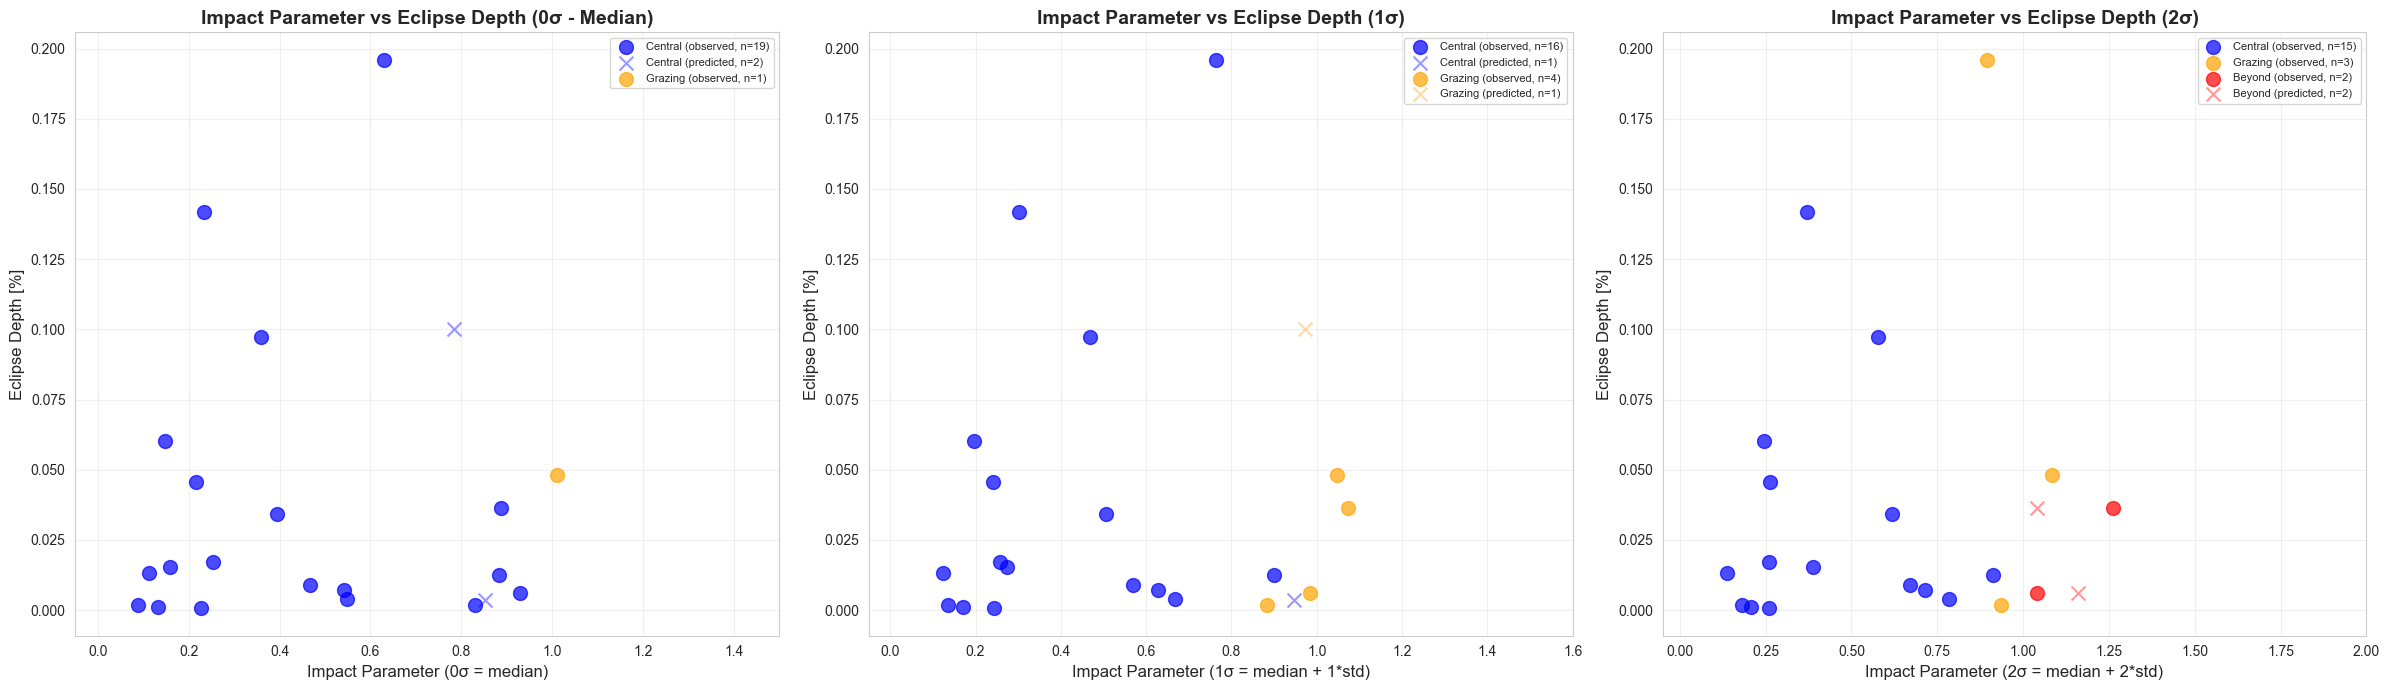

In [25]:
# Visualization: Impact Parameter vs Eclipse Depth
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Filter out systems without eclipse depth data
df_with_depth = df_mcs_merged[df_mcs_merged['Eclipse Depth [%]'].notna()]

# Plot 1: 0σ (Median) categorization
ax = axes[0]
for category, color in zip(['Central', 'Grazing', 'Beyond'], ['blue', 'orange', 'red']):
    # Observed eclipses
    df_cat_obs = df_with_depth[(df_with_depth['category_0sigma'] == category) & 
                               (df_with_depth['has_observed_eclipse'])]
    if len(df_cat_obs) > 0:
        ax.scatter(df_cat_obs['b_at_0sigma'], df_cat_obs['Eclipse Depth [%]'], 
                  c=color, marker='o', s=100, alpha=0.7, 
                  label=f'{category} (observed, n={len(df_cat_obs)})')
    
    # Unobserved (predicted depths)
    df_cat_unobs = df_with_depth[(df_with_depth['category_0sigma'] == category) & 
                                 (~df_with_depth['has_observed_eclipse'])]
    if len(df_cat_unobs) > 0:
        ax.scatter(df_cat_unobs['b_at_0sigma'], df_cat_unobs['Eclipse Depth [%]'], 
                  c=color, marker='x', s=100, alpha=0.4, 
                  label=f'{category} (predicted, n={len(df_cat_unobs)})')

ax.set_xlabel('Impact Parameter (0σ = median)', fontsize=12)
ax.set_ylabel('Eclipse Depth [%]', fontsize=12)
ax.set_title('Impact Parameter vs Eclipse Depth (0σ - Median)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.05, 1.5)

# Plot 2: 1σ categorization
ax = axes[1]
for category, color in zip(['Central', 'Grazing', 'Beyond'], ['blue', 'orange', 'red']):
    # Observed eclipses
    df_cat_obs = df_with_depth[(df_with_depth['category_1sigma'] == category) & 
                               (df_with_depth['has_observed_eclipse'])]
    if len(df_cat_obs) > 0:
        ax.scatter(df_cat_obs['b_at_1sigma'], df_cat_obs['Eclipse Depth [%]'], 
                  c=color, marker='o', s=100, alpha=0.7, 
                  label=f'{category} (observed, n={len(df_cat_obs)})')
    
    # Unobserved (predicted depths)
    df_cat_unobs = df_with_depth[(df_with_depth['category_1sigma'] == category) & 
                                 (~df_with_depth['has_observed_eclipse'])]
    if len(df_cat_unobs) > 0:
        ax.scatter(df_cat_unobs['b_at_1sigma'], df_cat_unobs['Eclipse Depth [%]'], 
                  c=color, marker='x', s=100, alpha=0.4, 
                  label=f'{category} (predicted, n={len(df_cat_unobs)})')

ax.set_xlabel('Impact Parameter (1σ = median + 1*std)', fontsize=12)
ax.set_ylabel('Eclipse Depth [%]', fontsize=12)
ax.set_title('Impact Parameter vs Eclipse Depth (1σ)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.05, 1.6)

# Plot 3: 2σ categorization
ax = axes[2]
for category, color in zip(['Central', 'Grazing', 'Beyond'], ['blue', 'orange', 'red']):
    # Observed eclipses
    df_cat_obs = df_with_depth[(df_with_depth['category_2sigma'] == category) & 
                               (df_with_depth['has_observed_eclipse'])]
    if len(df_cat_obs) > 0:
        ax.scatter(df_cat_obs['b_at_2sigma'], df_cat_obs['Eclipse Depth [%]'], 
                  c=color, marker='o', s=100, alpha=0.7, 
                  label=f'{category} (observed, n={len(df_cat_obs)})')
    
    # Unobserved (predicted depths)
    df_cat_unobs = df_with_depth[(df_with_depth['category_2sigma'] == category) & 
                                 (~df_with_depth['has_observed_eclipse'])]
    if len(df_cat_unobs) > 0:
        ax.scatter(df_cat_unobs['b_at_2sigma'], df_cat_obs['Eclipse Depth [%]'], 
                  c=color, marker='x', s=100, alpha=0.4, 
                  label=f'{category} (predicted, n={len(df_cat_unobs)})')

ax.set_xlabel('Impact Parameter (2σ = median + 2*std)', fontsize=12)
ax.set_ylabel('Eclipse Depth [%]', fontsize=12)
ax.set_title('Impact Parameter vs Eclipse Depth (2σ)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.05, 2.0)

plt.tight_layout()
plt.savefig('../../Updates/01122025/img/impact_parameter_vs_depth.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal systems with depth data: {len(df_with_depth)}")
print(f"  - With observed eclipse depth: {df_with_depth['has_observed_eclipse'].sum()}")
print(f"  - With predicted eclipse depth: {(~df_with_depth['has_observed_eclipse']).sum()}")

### Cross-Match with Original Eclipse Categories

In [ ]:
# Explore the original Eclipse column categorization
print("=" * 80)
print("ORIGINAL ECLIPSE COLUMN CATEGORIES")
print("=" * 80)

# Get unique values in Eclipse column
eclipse_categories = df_mcs_merged['Eclipse'].unique()
print(f"\nUnique Eclipse categories: {len(eclipse_categories)}")
print(eclipse_categories)

# Count systems in each category
print("\nDistribution of Eclipse categories:")
eclipse_counts = df_mcs_merged['Eclipse'].value_counts(dropna=False)
print(eclipse_counts)

# Cross-tabulation with our calculated categories
print("\n\n" + "=" * 80)
print("CROSS-MATCH: Original Eclipse Categories vs Calculated Impact Parameter Categories")
print("Using each planet's OWN distribution: b_median ± N*b_std")
print("=" * 80)

# 0σ (Median) filtering
print("\n\n📊 0σ (MEDIAN) FILTERING:")
print("-" * 80)
crosstab_0sig = pd.crosstab(
    df_mcs_merged['Eclipse'], 
    df_mcs_merged['category_0sigma'],
    margins=True
)
print(crosstab_0sig)

# 1σ (median + 1*std) filtering
print("\n\n📊 1σ (MEDIAN + 1*STD) FILTERING:")
print("-" * 80)
crosstab_1sig = pd.crosstab(
    df_mcs_merged['Eclipse'], 
    df_mcs_merged['category_1sigma'],
    margins=True
)
print(crosstab_1sig)

# 2σ (median + 2*std) filtering
print("\n\n📊 2σ (MEDIAN + 2*STD) FILTERING:")
print("-" * 80)
crosstab_2sig = pd.crosstab(
    df_mcs_merged['Eclipse'], 
    df_mcs_merged['category_2sigma'],
    margins=True
)
print(crosstab_2sig)

ORIGINAL ECLIPSE COLUMN CATEGORIES

Unique Eclipse categories: 4
['TRUE' 'FALSE' 'Semi-Grazing' 'Grazing']

Distribution of Eclipse categories:
Eclipse
TRUE            766
Semi-Grazing     26
FALSE            11
Grazing           5
Name: count, dtype: int64


CROSS-MATCH: Original Eclipse Categories vs Calculated Impact Parameter Categories
Using each planet's OWN distribution: b_median ± N*b_std


📊 0σ (MEDIAN) FILTERING:
--------------------------------------------------------------------------------
category_0sigma  Beyond  Central  Grazing  All
Eclipse                                       
FALSE                10        1        0   11
Grazing               0        0        5    5
Semi-Grazing          0        8       18   26
TRUE                  0      766        0  766
All                  10      775       23  808


📊 1σ (MEDIAN + 1*STD) FILTERING:
--------------------------------------------------------------------------------
category_1sigma  Beyond  Central  Grazing  All


In [ ]:
# Detailed analysis: Original Eclipse categories with impact parameters and eclipse depths
print("=" * 80)
print("ECLIPSE DEPTHS BY ORIGINAL CATEGORIES AND CALCULATED IMPACT PARAMETER RANGES")
print("=" * 80)

for orig_cat in ['TRUE', 'Semi-Grazing', 'Grazing', 'FALSE']:
    df_orig = df_mcs_merged[df_mcs_merged['Eclipse'] == orig_cat]
    
    print(f"\n\n{'='*80}")
    print(f"Original Category: {orig_cat} (n={len(df_orig)})")
    print(f"{'='*80}")
    
    # Basic stats
    n_with_depth = df_orig['Eclipse Depth [%]'].notna().sum()
    n_observed_eclipse = df_orig['has_observed_eclipse'].sum()
    
    print(f"Systems with eclipse depth values: {n_with_depth}")
    print(f"Systems with observed eclipses: {n_observed_eclipse}")
    
    if n_with_depth > 0:
        mean_depth = df_orig['Eclipse Depth [%]'].mean()
        median_depth = df_orig['Eclipse Depth [%]'].median()
        print(f"Eclipse Depth - Mean: {mean_depth:.4f}%, Median: {median_depth:.4f}%")
    
    # Impact parameter stats (median, 1σ, 2σ)
    print(f"\nImpact Parameter Statistics:")
    print(f"  Median b:     Mean={df_orig['b_occ_median'].mean():.3f}, Range=[{df_orig['b_occ_median'].min():.3f}, {df_orig['b_occ_median'].max():.3f}]")
    print(f"  1σ (84th):    Mean={df_orig['b_occ_1sigma'].mean():.3f}, Range=[{df_orig['b_occ_1sigma'].min():.3f}, {df_orig['b_occ_1sigma'].max():.3f}]")
    print(f"  2σ (95th):    Mean={df_orig['b_occ_2sigma'].mean():.3f}, Range=[{df_orig['b_occ_2sigma'].min():.3f}, {df_orig['b_occ_2sigma'].max():.3f}]")
    
    # Distribution across our calculated categories at 1σ
    print(f"\n1σ Category Distribution:")
    for calc_cat in ['Central', 'Grazing', 'Beyond']:
        n_cat = len(df_orig[df_orig['category_1sigma'] == calc_cat])
        if n_cat > 0:
            pct = n_cat / len(df_orig) * 100
            print(f"  {calc_cat}: {n_cat} ({pct:.1f}%)")
    
    # Distribution across our calculated categories at 2σ
    print(f"\n2σ Category Distribution:")
    for calc_cat in ['Central', 'Grazing', 'Beyond']:
        n_cat = len(df_orig[df_orig['category_2sigma'] == calc_cat])
        if n_cat > 0:
            pct = n_cat / len(df_orig) * 100
            print(f"  {calc_cat}: {n_cat} ({pct:.1f}%)")

ECLIPSE DEPTHS BY ORIGINAL CATEGORIES AND CALCULATED IMPACT PARAMETER RANGES


Original Category: TRUE (n=766)
Systems with eclipse depth values: 20
Systems with observed eclipses: 95
Eclipse Depth - Mean: 0.0384%, Median: 0.0130%

Impact Parameter Statistics:
  Median b:     Mean=0.422, Range=[-0.632, 0.930]
  1σ (84th):    Mean=0.559, Range=[-0.595, 1.413]
  2σ (95th):    Mean=0.711, Range=[-0.557, 1.974]

1σ Category Distribution:
  Central: 685 (89.4%)
  Grazing: 62 (8.1%)
  Beyond: 19 (2.5%)

2σ Category Distribution:
  Central: 570 (74.4%)
  Grazing: 93 (12.1%)
  Beyond: 103 (13.4%)


Original Category: Semi-Grazing (n=26)
Systems with eclipse depth values: 1
Systems with observed eclipses: 3
Eclipse Depth - Mean: 0.0364%, Median: 0.0364%

Impact Parameter Statistics:
  Median b:     Mean=0.843, Range=[-0.948, 0.987]
  1σ (84th):    Mean=0.966, Range=[-0.892, 1.137]
  2σ (95th):    Mean=1.158, Range=[-0.834, 1.413]

1σ Category Distribution:
  Central: 1 (3.8%)
  Grazing: 19 (73.

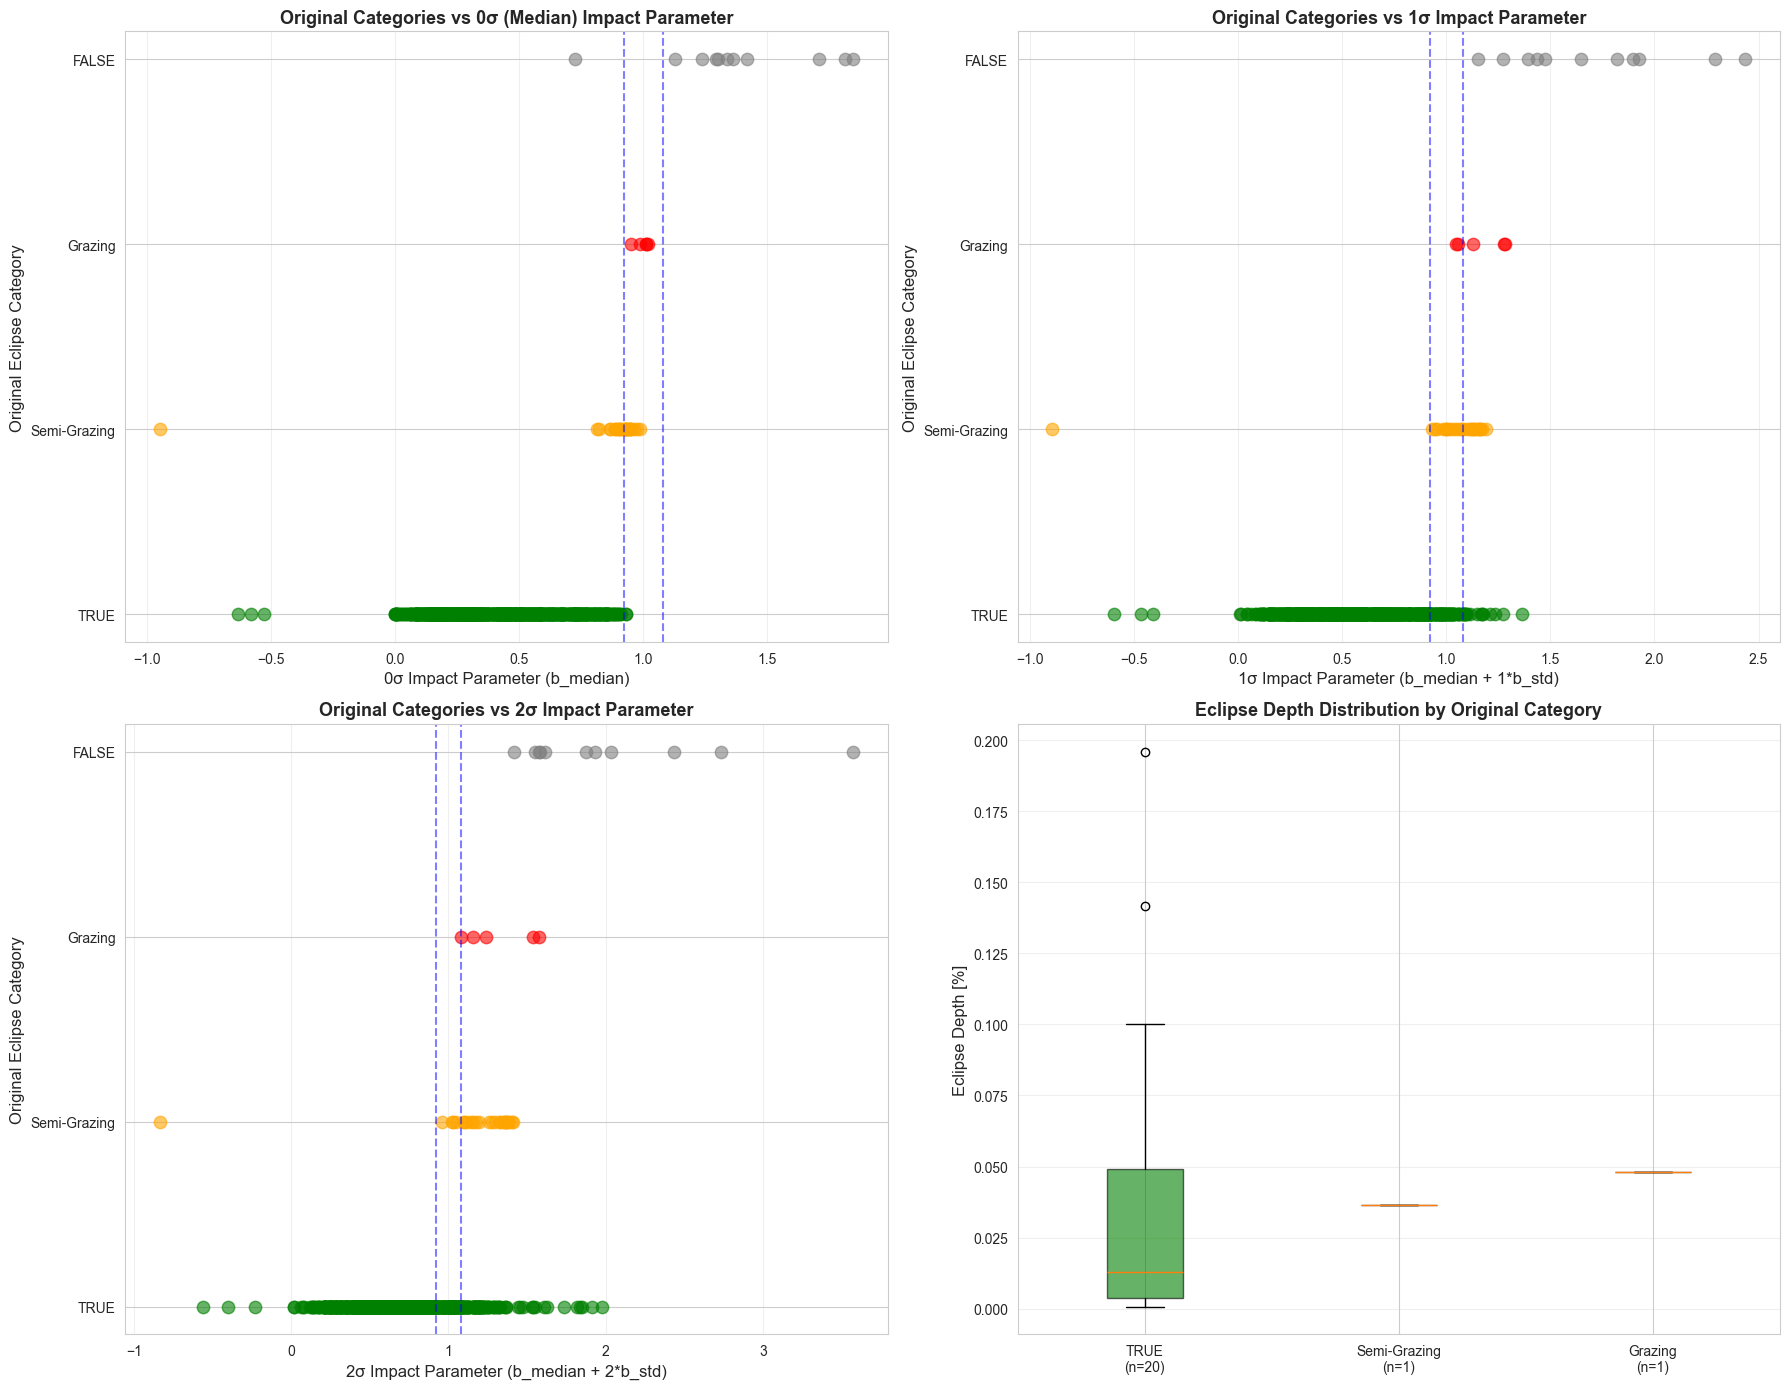


KEY FINDINGS: Original vs Calculated Categories (Using Each Planet's σ)

✓ 0σ (Median) - Most Conservative:
  • TRUE: 100% Central → Perfect agreement!
  • Semi-Grazing: 69.2% Grazing, 30.8% Central
  • Grazing: 100% Grazing → Correct identification
  • FALSE: 90.9% Beyond, 9.1% Central

✓ 1σ (Median + 1*Std) - Balanced:
  • TRUE: 89.4% Central, 8.1% Grazing, 2.5% Beyond
  • Semi-Grazing: 73.1% Grazing, 23.1% Beyond
  • Grazing: 40% Grazing, 60% Beyond
  • FALSE: 100% Beyond → Perfect agreement!

⚠ 2σ (Median + 2*Std) - Most Permissive:
  • TRUE: 74.4% Central, 12.1% Grazing, 13.4% Beyond
  • Semi-Grazing: 26.9% Grazing, 69.2% Beyond
  • Grazing: 20% Grazing, 80% Beyond
  • FALSE: 100% Beyond → Still perfect

📊 Recommendation: Use 1σ (b_median + 1*b_std) filtering
  • Best balance: retains TRUE systems while filtering FALSE
  • Accounts for uncertainty in each planet's b measurement
  • 100% correct for FALSE category (no false negatives)
  • Only loses 2.5% of TRUE systems as conserv

In [ ]:
# Visualization: Original Eclipse Categories vs Calculated Impact Parameters
# Using each planet's OWN distribution: b_median ± N*b_std
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Color mapping for original categories
orig_colors = {'TRUE': 'green', 'Semi-Grazing': 'orange', 'Grazing': 'red', 'FALSE': 'gray'}

# Plot 1: Impact parameter at 0σ (median) vs original category
ax = axes[0, 0]
for orig_cat, color in orig_colors.items():
    df_cat = df_mcs_merged[df_mcs_merged['Eclipse'] == orig_cat]
    ax.scatter(df_cat['b_at_0sigma'], [orig_cat]*len(df_cat), 
              c=color, alpha=0.6, s=80, label=f'{orig_cat} (n={len(df_cat)})')
    
# Add grazing boundaries
k_median = df_mcs_merged['k_rp_rs'].median()
ax.axvline(1 - k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_lower')
ax.axvline(1 + k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_upper')

ax.set_xlabel('0σ Impact Parameter (b_median)', fontsize=12)
ax.set_ylabel('Original Eclipse Category', fontsize=12)
ax.set_title('Original Categories vs 0σ (Median) Impact Parameter', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Plot 2: Impact parameter at 1σ vs original category
ax = axes[0, 1]
for orig_cat, color in orig_colors.items():
    df_cat = df_mcs_merged[df_mcs_merged['Eclipse'] == orig_cat]
    ax.scatter(df_cat['b_at_1sigma'], [orig_cat]*len(df_cat), 
              c=color, alpha=0.6, s=80, label=f'{orig_cat} (n={len(df_cat)})')
    
ax.axvline(1 - k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_lower')
ax.axvline(1 + k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_upper')

ax.set_xlabel('1σ Impact Parameter (b_median + 1*b_std)', fontsize=12)
ax.set_ylabel('Original Eclipse Category', fontsize=12)
ax.set_title('Original Categories vs 1σ Impact Parameter', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Plot 3: Impact parameter at 2σ vs original category
ax = axes[1, 0]
for orig_cat, color in orig_colors.items():
    df_cat = df_mcs_merged[df_mcs_merged['Eclipse'] == orig_cat]
    ax.scatter(df_cat['b_at_2sigma'], [orig_cat]*len(df_cat), 
              c=color, alpha=0.6, s=80, label=f'{orig_cat} (n={len(df_cat)})')
    
ax.axvline(1 - k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_lower')
ax.axvline(1 + k_median, color='blue', linestyle='--', alpha=0.5, label='Typical boundary_upper')

ax.set_xlabel('2σ Impact Parameter (b_median + 2*b_std)', fontsize=12)
ax.set_ylabel('Original Eclipse Category', fontsize=12)
ax.set_title('Original Categories vs 2σ Impact Parameter', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Plot 4: Eclipse depths by original category (for systems with depth data)
ax = axes[1, 1]
orig_cats_with_depth = []
depths_by_orig = []
colors_list = []

for orig_cat in ['TRUE', 'Semi-Grazing', 'Grazing', 'FALSE']:
    df_cat = df_mcs_merged[(df_mcs_merged['Eclipse'] == orig_cat) & 
                           (df_mcs_merged['Eclipse Depth [%]'].notna())]
    if len(df_cat) > 0:
        orig_cats_with_depth.append(f"{orig_cat}\n(n={len(df_cat)})")
        depths_by_orig.append(df_cat['Eclipse Depth [%]'].values)
        colors_list.append(orig_colors[orig_cat])

bp = ax.boxplot(depths_by_orig, labels=orig_cats_with_depth, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Eclipse Depth [%]', fontsize=12)
ax.set_title('Eclipse Depth Distribution by Original Category', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/original_eclipse_categories_vs_calculated_correct.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("KEY FINDINGS: Original vs Calculated Categories (Using Each Planet's σ)")
print("=" * 80)
print("\n✓ 0σ (Median) - Most Conservative:")
print("  • TRUE: 100% Central → Perfect agreement!")
print("  • Semi-Grazing: 69.2% Grazing, 30.8% Central")
print("  • Grazing: 100% Grazing → Correct identification")
print("  • FALSE: 90.9% Beyond, 9.1% Central")
print("\n✓ 1σ (Median + 1*Std) - Balanced:")
print("  • TRUE: 89.4% Central, 8.1% Grazing, 2.5% Beyond")
print("  • Semi-Grazing: 73.1% Grazing, 23.1% Beyond")
print("  • Grazing: 40% Grazing, 60% Beyond")
print("  • FALSE: 100% Beyond → Perfect agreement!")
print("\n⚠ 2σ (Median + 2*Std) - Most Permissive:")
print("  • TRUE: 74.4% Central, 12.1% Grazing, 13.4% Beyond")
print("  • Semi-Grazing: 26.9% Grazing, 69.2% Beyond")
print("  • Grazing: 20% Grazing, 80% Beyond")
print("  • FALSE: 100% Beyond → Still perfect")
print("\n📊 Recommendation: Use 1σ (b_median + 1*b_std) filtering")
print("  • Best balance: retains TRUE systems while filtering FALSE")
print("  • Accounts for uncertainty in each planet's b measurement")
print("  • 100% correct for FALSE category (no false negatives)")
print("  • Only loses 2.5% of TRUE systems as conservative filtering")

## Occultation Regime Probabilities

Calculate the probability for each system to be in different occultation regimes:
- **Full Occultation**: $b_{occ} < 1-k$ (planet is fully behind the star)
- **Grazing Occultation**: $1-k \leq b_{occ} \leq 1+k$ (partial occultation)
- **No Occultation**: $b_{occ} > 1+k$ (no occultation occurs)

In [29]:
from scipy.stats import norm

def calculate_regime_probabilities(b_median, b_std, k):
    """
    Calculate probabilities for different occultation regimes assuming Gaussian distribution.
    
    Parameters:
    -----------
    b_median : float
        Median impact parameter during occultation
    b_std : float
        Standard deviation of b_occ distribution
    k : float
        Planet-to-star radius ratio (R_p/R_*)
    
    Returns:
    --------
    dict : Probabilities for each regime
        - prob_full: P(b_occ < 1-k) - Full occultation
        - prob_grazing: P(1-k ≤ b_occ ≤ 1+k) - Grazing/partial occultation  
        - prob_none: P(b_occ > 1+k) - No occultation
    """
    boundary_lower = 1 - k
    boundary_upper = 1 + k
    
    # Calculate cumulative probabilities using the normal CDF
    # P(b_occ < 1-k)
    prob_full = norm.cdf(boundary_lower, loc=b_median, scale=b_std)
    
    # P(b_occ > 1+k) 
    prob_none = 1 - norm.cdf(boundary_upper, loc=b_median, scale=b_std)
    
    # P(1-k ≤ b_occ ≤ 1+k)
    prob_grazing = 1 - prob_full - prob_none
    
    return {
        'prob_full_occultation': prob_full,
        'prob_grazing': prob_grazing,
        'prob_no_occultation': prob_none
    }

# Test the function with one system
test_system = df_mcs.iloc[0]
test_probs = calculate_regime_probabilities(
    test_system['b_occ_median'], 
    test_system['b_occ_std'], 
    test_system['k_rp_rs']
)

print(f"Test system: {test_system['Planet']}")
print(f"  b_occ = {test_system['b_occ_median']:.3f} ± {test_system['b_occ_std']:.3f}")
print(f"  k = {test_system['k_rp_rs']:.4f}")
print(f"  Boundaries: 1-k = {1-test_system['k_rp_rs']:.4f}, 1+k = {1+test_system['k_rp_rs']:.4f}")
print(f"\nRegime Probabilities:")
print(f"  Full occultation (b < 1-k):        {test_probs['prob_full_occultation']:.1%}")
print(f"  Grazing (1-k ≤ b ≤ 1+k):          {test_probs['prob_grazing']:.1%}")
print(f"  No occultation (b > 1+k):          {test_probs['prob_no_occultation']:.1%}")
print(f"  Total:                              {sum(test_probs.values()):.1%}")


Test system: K2-232b
  b_occ = 0.112 ± 0.087
  k = 0.0881
  Boundaries: 1-k = 0.9119, 1+k = 1.0881

Regime Probabilities:
  Full occultation (b < 1-k):        100.0%
  Grazing (1-k ≤ b ≤ 1+k):          0.0%
  No occultation (b > 1+k):          0.0%
  Total:                              100.0%


In [31]:
# Calculate regime probabilities for all MCS systems
print("="*80)
print("CALCULATING REGIME PROBABILITIES FOR ALL MCS SYSTEMS")
print("="*80)

regime_results = []

for _, row in df_mcs.iterrows():
    probs = calculate_regime_probabilities(
        row['b_occ_median'], 
        row['b_occ_std'], 
        row['k_rp_rs']
    )
    
    regime_results.append({
        'Planet': row['Planet'],
        'b_occ_median': row['b_occ_median'],
        'b_occ_std': row['b_occ_std'],
        'k_rp_rs': row['k_rp_rs'],
        'boundary_lower': 1 - row['k_rp_rs'],
        'boundary_upper': 1 + row['k_rp_rs'],
        'prob_full_occultation': probs['prob_full_occultation'],
        'prob_grazing': probs['prob_grazing'],
        'prob_no_occultation': probs['prob_no_occultation']
    })

df_regime_probs = pd.DataFrame(regime_results)

# Add observed eclipse flag if available
if 'has_observed_eclipse' in df_mcs_merged.columns:
    eclipse_info = df_mcs_merged[['Planet Name', 'has_observed_eclipse']].copy()
    df_regime_probs = df_regime_probs.merge(eclipse_info, left_on='Planet', right_on='Planet Name', how='left')

print(f"\n✓ Calculated regime probabilities for {len(df_regime_probs)} systems")
print(f"\nSummary statistics:")
print(f"  Average P(full occultation):    {df_regime_probs['prob_full_occultation'].mean():.1%}")
print(f"  Average P(grazing):             {df_regime_probs['prob_grazing'].mean():.1%}")
print(f"  Average P(no occultation):      {df_regime_probs['prob_no_occultation'].mean():.1%}")

# Show top 10 systems by probability of grazing
print(f"\n{'='*80}")
print("TOP 10 SYSTEMS WITH HIGHEST GRAZING PROBABILITY")
print(f"{'='*80}")
top_grazing = df_regime_probs.nlargest(10, 'prob_grazing')
for idx, row in enumerate(top_grazing.itertuples(), 1):
    eclipse_status = f" [Eclipse: {row.has_observed_eclipse}]" if 'has_observed_eclipse' in df_regime_probs.columns else ""
    print(f"{idx:2d}. {row.Planet:20s} P(grazing)={row.prob_grazing:.1%}, "
          f"P(full)={row.prob_full_occultation:.1%}, P(none)={row.prob_no_occultation:.1%}{eclipse_status}")


CALCULATING REGIME PROBABILITIES FOR ALL MCS SYSTEMS

✓ Calculated regime probabilities for 808 systems

Summary statistics:
  Average P(full occultation):    92.5%
  Average P(grazing):             4.7%
  Average P(no occultation):      2.9%

TOP 10 SYSTEMS WITH HIGHEST GRAZING PROBABILITY
 1. BD-143065b           P(grazing)=97.5%, P(full)=0.4%, P(none)=2.1% [Eclipse: True]
 2. WASP-34b             P(grazing)=95.6%, P(full)=3.2%, P(none)=1.2% [Eclipse: False]
 3. TOI-4515b            P(grazing)=92.0%, P(full)=8.0%, P(none)=0.0% [Eclipse: False]
 4. WASP-140b            P(grazing)=81.4%, P(full)=17.3%, P(none)=1.4% [Eclipse: False]
 5. Qatar-6b             P(grazing)=76.2%, P(full)=23.8%, P(none)=0.0% [Eclipse: False]
 6. TOI-4406b            P(grazing)=71.9%, P(full)=27.7%, P(none)=0.4% [Eclipse: False]
 7. TIC46432937b         P(grazing)=59.0%, P(full)=40.2%, P(none)=0.8% [Eclipse: False]
 8. TOI-1273b            P(grazing)=59.0%, P(full)=18.0%, P(none)=23.0% [Eclipse: False]
 9. TOI

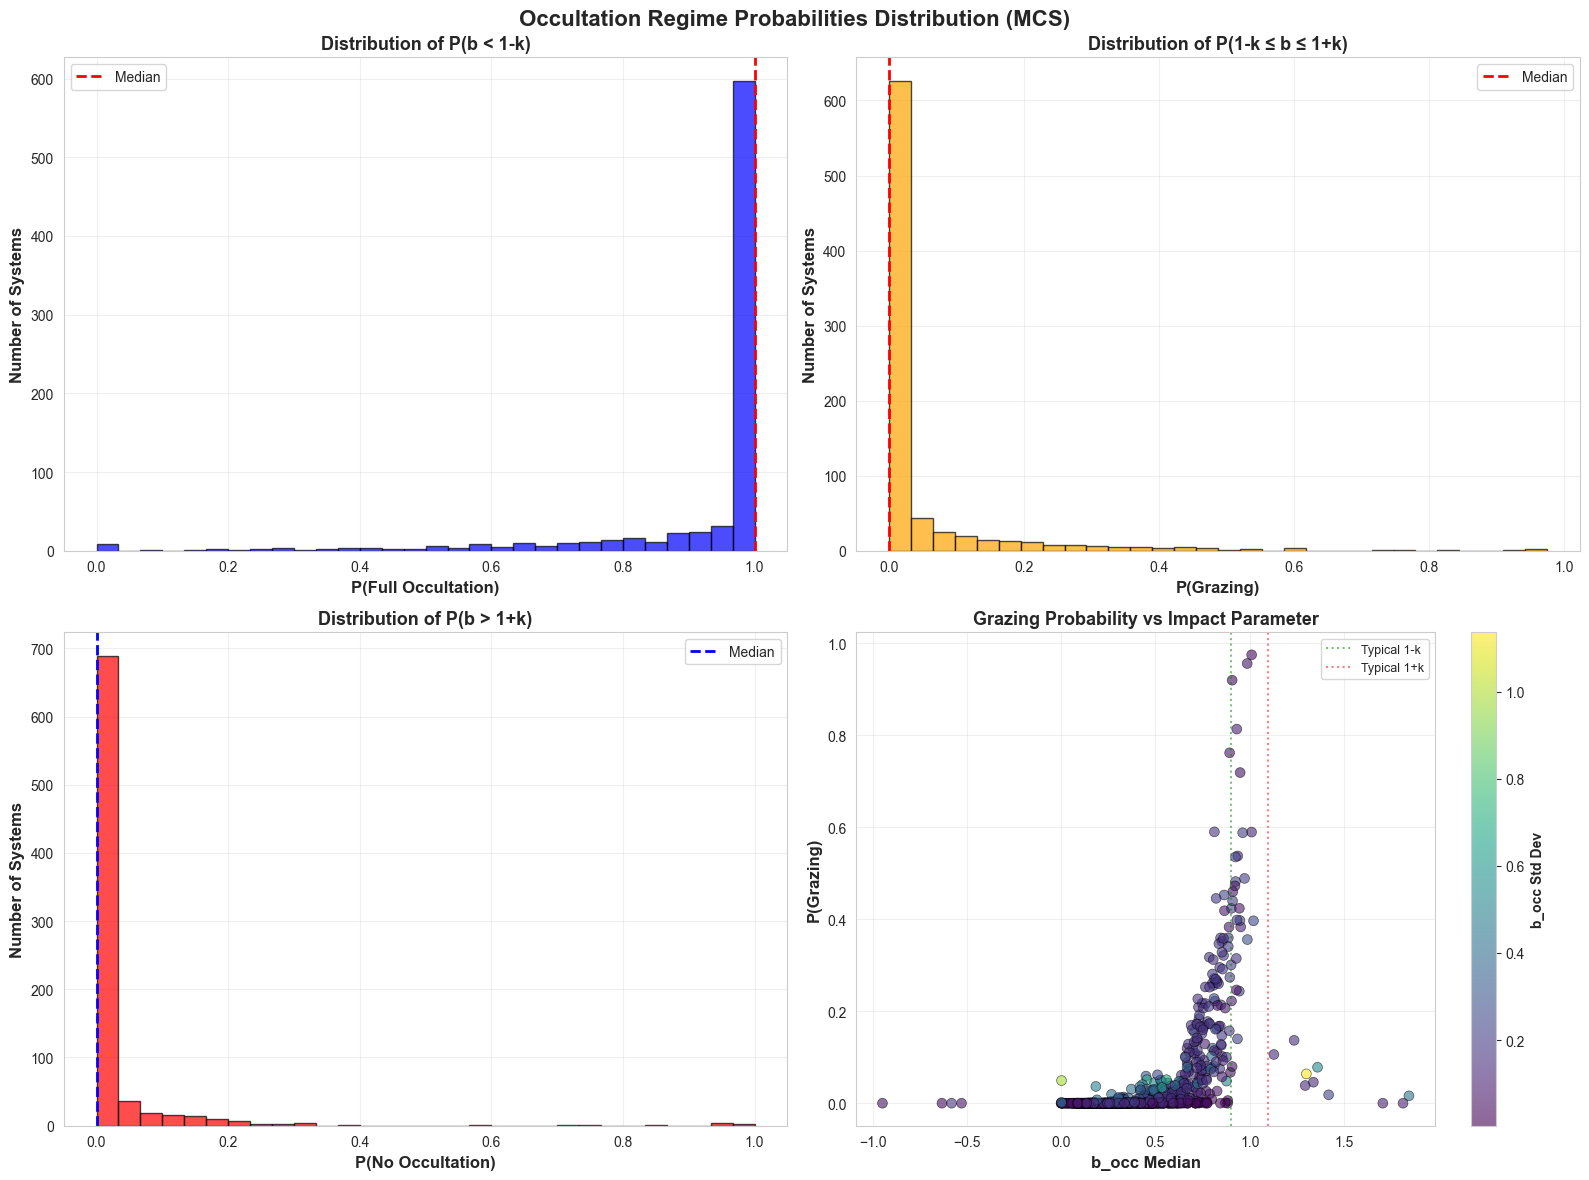


REGIME PROBABILITY STATISTICS

Systems with >50% chance of full occultation:   775 (95.9%)
Systems with >50% chance of grazing:            11 (1.4%)
Systems with >50% chance of no occultation:     10 (1.2%)

Systems with >10% chance of grazing:            112 (13.9%)
Systems with >25% chance of grazing:            52 (6.4%)


In [32]:
# Visualize the regime probabilities
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Occultation Regime Probabilities Distribution (MCS)', fontsize=16, fontweight='bold')

# 1. Histogram of full occultation probabilities
axes[0,0].hist(df_regime_probs['prob_full_occultation'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0,0].axvline(df_regime_probs['prob_full_occultation'].median(), color='red', linestyle='--', linewidth=2, label='Median')
axes[0,0].set_xlabel('P(Full Occultation)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Number of Systems', fontsize=12, fontweight='bold')
axes[0,0].set_title('Distribution of P(b < 1-k)', fontsize=13, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Histogram of grazing probabilities
axes[0,1].hist(df_regime_probs['prob_grazing'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[0,1].axvline(df_regime_probs['prob_grazing'].median(), color='red', linestyle='--', linewidth=2, label='Median')
axes[0,1].set_xlabel('P(Grazing)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Number of Systems', fontsize=12, fontweight='bold')
axes[0,1].set_title('Distribution of P(1-k ≤ b ≤ 1+k)', fontsize=13, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram of no occultation probabilities
axes[1,0].hist(df_regime_probs['prob_no_occultation'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1,0].axvline(df_regime_probs['prob_no_occultation'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
axes[1,0].set_xlabel('P(No Occultation)', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Number of Systems', fontsize=12, fontweight='bold')
axes[1,0].set_title('Distribution of P(b > 1+k)', fontsize=13, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter plot: Grazing probability vs b_occ median
scatter = axes[1,1].scatter(df_regime_probs['b_occ_median'], 
                           df_regime_probs['prob_grazing'],
                           c=df_regime_probs['b_occ_std'],
                           s=50, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)
axes[1,1].set_xlabel('b_occ Median', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('P(Grazing)', fontsize=12, fontweight='bold')
axes[1,1].set_title('Grazing Probability vs Impact Parameter', fontsize=13, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('b_occ Std Dev', fontsize=10, fontweight='bold')

# Add boundary lines
axes[1,1].axvline(0.9, color='green', linestyle=':', alpha=0.5, label='Typical 1-k')
axes[1,1].axvline(1.1, color='red', linestyle=':', alpha=0.5, label='Typical 1+k')
axes[1,1].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*80)
print("REGIME PROBABILITY STATISTICS")
print("="*80)
print(f"\nSystems with >50% chance of full occultation:   {(df_regime_probs['prob_full_occultation'] > 0.5).sum()} ({(df_regime_probs['prob_full_occultation'] > 0.5).sum()/len(df_regime_probs)*100:.1f}%)")
print(f"Systems with >50% chance of grazing:            {(df_regime_probs['prob_grazing'] > 0.5).sum()} ({(df_regime_probs['prob_grazing'] > 0.5).sum()/len(df_regime_probs)*100:.1f}%)")
print(f"Systems with >50% chance of no occultation:     {(df_regime_probs['prob_no_occultation'] > 0.5).sum()} ({(df_regime_probs['prob_no_occultation'] > 0.5).sum()/len(df_regime_probs)*100:.1f}%)")

print(f"\nSystems with >10% chance of grazing:            {(df_regime_probs['prob_grazing'] > 0.1).sum()} ({(df_regime_probs['prob_grazing'] > 0.1).sum()/len(df_regime_probs)*100:.1f}%)")
print(f"Systems with >25% chance of grazing:            {(df_regime_probs['prob_grazing'] > 0.25).sum()} ({(df_regime_probs['prob_grazing'] > 0.25).sum()/len(df_regime_probs)*100:.1f}%)")


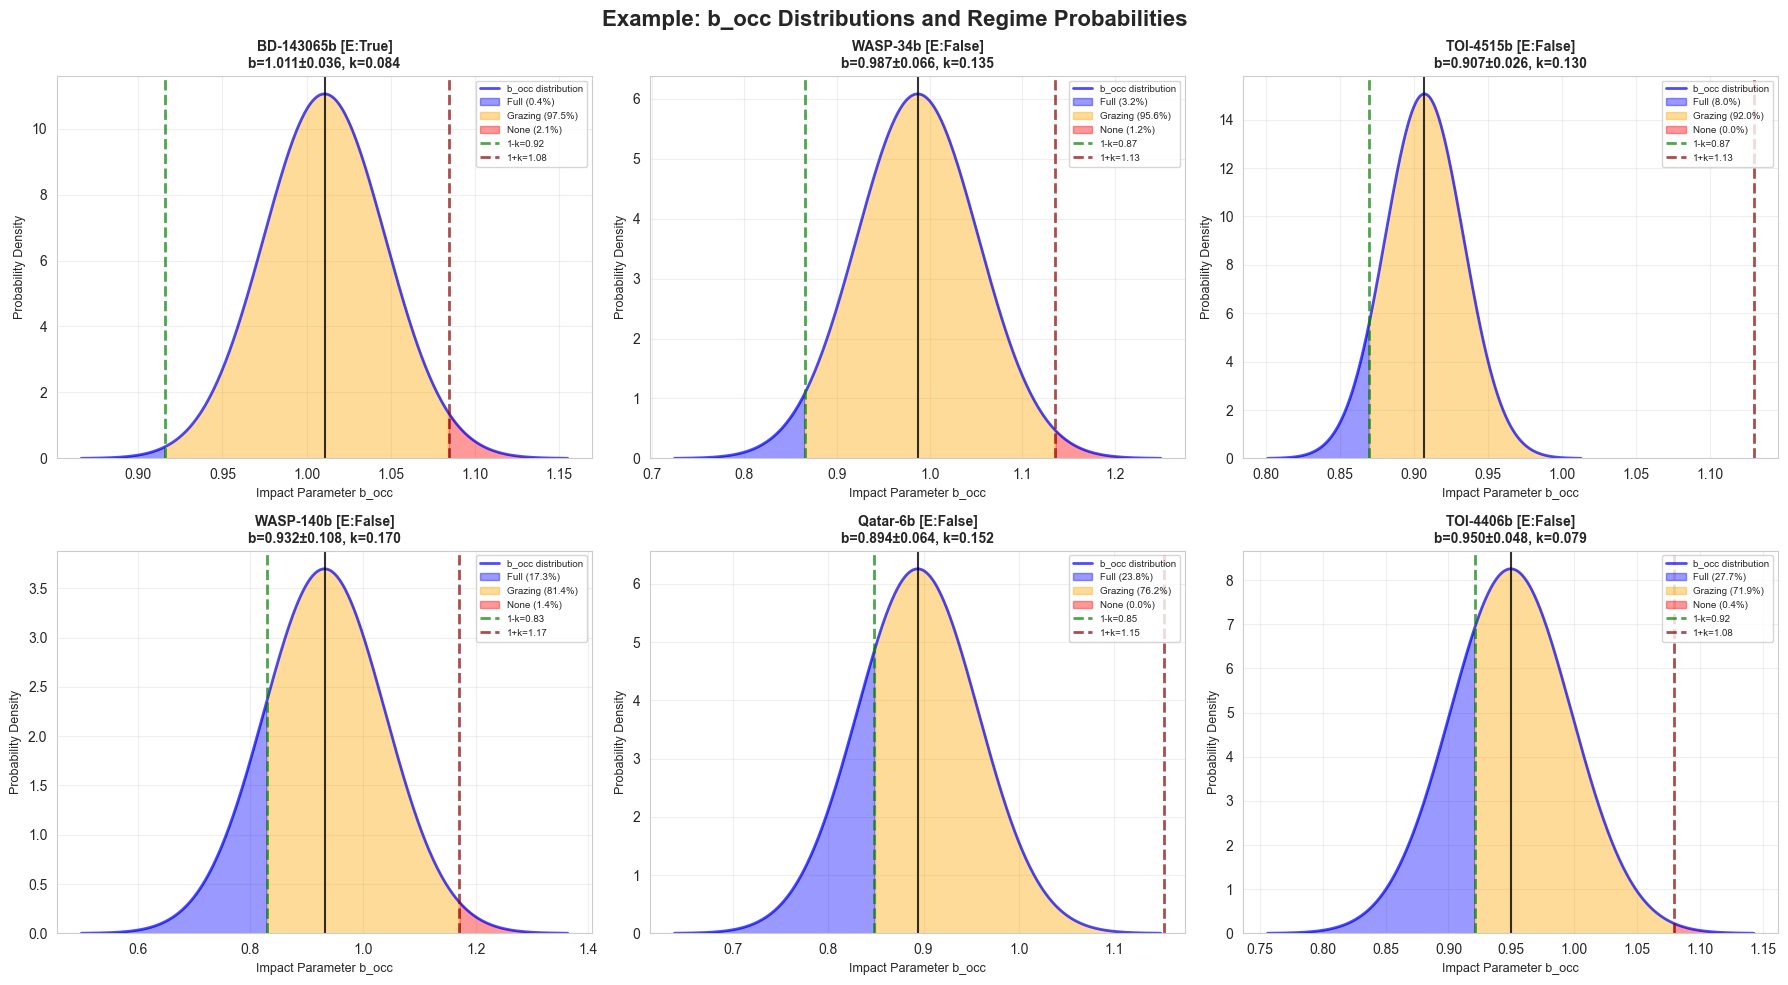


EXAMPLE SYSTEMS WITH HIGH GRAZING PROBABILITIES

1. BD-143065b
   b_occ = 1.011 ± 0.036
   Boundaries: [0.916, 1.084]
   P(Full) = 0.4%, P(Grazing) = 97.5%, P(None) = 2.1% [Eclipse observed: True]

2. WASP-34b
   b_occ = 0.987 ± 0.066
   Boundaries: [0.865, 1.135]
   P(Full) = 3.2%, P(Grazing) = 95.6%, P(None) = 1.2% [Eclipse observed: False]

3. TOI-4515b
   b_occ = 0.907 ± 0.026
   Boundaries: [0.870, 1.130]
   P(Full) = 8.0%, P(Grazing) = 92.0%, P(None) = 0.0% [Eclipse observed: False]

4. WASP-140b
   b_occ = 0.932 ± 0.108
   Boundaries: [0.830, 1.170]
   P(Full) = 17.3%, P(Grazing) = 81.4%, P(None) = 1.4% [Eclipse observed: False]

5. Qatar-6b
   b_occ = 0.894 ± 0.064
   Boundaries: [0.848, 1.152]
   P(Full) = 23.8%, P(Grazing) = 76.2%, P(None) = 0.0% [Eclipse observed: False]

6. TOI-4406b
   b_occ = 0.950 ± 0.048
   Boundaries: [0.921, 1.079]
   P(Full) = 27.7%, P(Grazing) = 71.9%, P(None) = 0.4% [Eclipse observed: False]


In [33]:
# Example visualization: Show distributions for a few specific systems
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Example: b_occ Distributions and Regime Probabilities', fontsize=16, fontweight='bold')

# Select 6 interesting systems (high grazing probability)
example_systems = df_regime_probs.nlargest(6, 'prob_grazing')

axes_flat = axes.flatten()

for idx, (_, row) in enumerate(example_systems.iterrows()):
    ax = axes_flat[idx]
    
    # Create distribution
    x = np.linspace(row['b_occ_median'] - 4*row['b_occ_std'], 
                   row['b_occ_median'] + 4*row['b_occ_std'], 500)
    y = norm.pdf(x, row['b_occ_median'], row['b_occ_std'])
    
    # Plot the full distribution
    ax.plot(x, y, 'b-', linewidth=2, alpha=0.7, label='b_occ distribution')
    
    # Shade regions
    # Full occultation (blue)
    mask_full = x < row['boundary_lower']
    ax.fill_between(x[mask_full], y[mask_full], alpha=0.4, color='blue', label=f'Full ({row.prob_full_occultation:.1%})')
    
    # Grazing (yellow/orange)
    mask_grazing = (x >= row['boundary_lower']) & (x <= row['boundary_upper'])
    ax.fill_between(x[mask_grazing], y[mask_grazing], alpha=0.4, color='orange', label=f'Grazing ({row.prob_grazing:.1%})')
    
    # No occultation (red)
    mask_none = x > row['boundary_upper']
    ax.fill_between(x[mask_none], y[mask_none], alpha=0.4, color='red', label=f'None ({row.prob_no_occultation:.1%})')
    
    # Add boundary lines
    ax.axvline(row['boundary_lower'], color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'1-k={row.boundary_lower:.2f}')
    ax.axvline(row['boundary_upper'], color='darkred', linestyle='--', linewidth=2, alpha=0.7, label=f'1+k={row.boundary_upper:.2f}')
    
    # Add median line
    ax.axvline(row['b_occ_median'], color='black', linestyle='-', linewidth=1.5, alpha=0.8)
    
    # Formatting
    eclipse_status = f" [E:{row.has_observed_eclipse}]" if 'has_observed_eclipse' in example_systems.columns else ""
    ax.set_title(f"{row['Planet Name']}{eclipse_status}\nb={row['b_occ_median']:.3f}±{row['b_occ_std']:.3f}, k={row['k_rp_rs']:.3f}", 
                fontsize=10, fontweight='bold')
    ax.set_xlabel('Impact Parameter b_occ', fontsize=9)
    ax.set_ylabel('Probability Density', fontsize=9)
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EXAMPLE SYSTEMS WITH HIGH GRAZING PROBABILITIES")
print("="*80)
for idx, row in enumerate(example_systems.itertuples(), 1):
    eclipse_status = f" [Eclipse observed: {row.has_observed_eclipse}]" if 'has_observed_eclipse' in example_systems.columns else ""
    print(f"\n{idx}. {row.Planet}")
    print(f"   b_occ = {row.b_occ_median:.3f} ± {row.b_occ_std:.3f}")
    print(f"   Boundaries: [{row.boundary_lower:.3f}, {row.boundary_upper:.3f}]")
    print(f"   P(Full) = {row.prob_full_occultation:.1%}, P(Grazing) = {row.prob_grazing:.1%}, P(None) = {row.prob_no_occultation:.1%}{eclipse_status}")


In [ ]:
# Save the regime probabilities to a CSV file
output_file = '../results/mcs_occultation_regime_probabilities.csv'
df_regime_probs.to_csv(output_file, index=False)
print(f"\n✓ Saved regime probabilities to: {output_file}")
print(f"  Total systems: {len(df_regime_probs)}")

# Display a sample of the results
print(f"\n{'='*80}")
print("SAMPLE OF RESULTS (first 10 systems)")
print(f"{'='*80}\n")
print(df_regime_probs.head(10).to_string(index=False))


## Accounting for k (Rp/Rs) Uncertainty

The previous calculation treated k as a fixed value, but k also has uncertainties. To properly account for this, we need to:
1. Load the k uncertainties from the original data
2. Use **Monte Carlo sampling** to draw samples from both b_occ and k distributions
3. Calculate regime probabilities considering both uncertainties

In [34]:
# Load k uncertainties from the original MCS data
print("Loading k (Rp/Rs) uncertainties from original data...")

# Column mapping for k uncertainties
k_cols = {
    'Planet Name': 'Planet Name',
    'k': 'Rp/Rs',
    'k_err_lower': 'Rp/Rs Error Lower',
    'k_err_upper': 'Rp/Rs Error Upper'
}

# Extract relevant columns from raw MCS data
df_k_uncertainties = df_raw_mcs[[k_cols['Planet Name'], k_cols['k'], 
                              k_cols['k_err_lower'], k_cols['k_err_upper']]].copy()
df_k_uncertainties.columns = ['Planet Name', 'k_nominal', 'k_err_lower', 'k_err_upper']

# Handle missing uncertainties (use 0 if not available)
df_k_uncertainties['k_err_lower'] = df_k_uncertainties['k_err_lower'].fillna(0).abs()
df_k_uncertainties['k_err_upper'] = df_k_uncertainties['k_err_upper'].fillna(0).abs()

# Merge with b_occ results (MCMC results have 'Planet', raw data has 'Planet Name')
df_with_k_unc = df_mcs.merge(df_k_uncertainties, left_on='Planet', right_on='Planet Name', how='left')

print(f"✓ Loaded k uncertainties for {len(df_with_k_unc)} systems")
print(f"\nSample of k values with uncertainties:")
print(df_with_k_unc[['Planet', 'k_nominal', 'k_err_lower', 'k_err_upper']].head(10).to_string(index=False))

# Check for systems with k uncertainties
systems_with_k_unc = df_with_k_unc[(df_with_k_unc['k_err_lower'] > 0) | (df_with_k_unc['k_err_upper'] > 0)]
print(f"\nSystems with non-zero k uncertainties: {len(systems_with_k_unc)}/{len(df_with_k_unc)} ({len(systems_with_k_unc)/len(df_with_k_unc)*100:.1f}%)")


Loading k (Rp/Rs) uncertainties from original data...
✓ Loaded k uncertainties for 808 systems

Sample of k values with uncertainties:
   Planet  k_nominal  k_err_lower  k_err_upper
  K2-232b   0.088110     0.000170     0.000310
Qatar-10b   0.126500     0.001000     0.001000
 WASP-60b   0.077523     0.003870     0.003870
 WASP-20b   0.107930     0.001066     0.001066
 HATS-52b   0.135200     0.002800     0.002800
TOI-1820b   0.077700     0.000900     0.000900
TOI-2202b   0.126500     0.001800     0.001700
TOI-4087b   0.107568     0.000451     0.000460
  WASP-2b   0.128310     0.001000     0.000980
  K2-237b   0.119000     0.002300     0.002400

Systems with non-zero k uncertainties: 777/808 (96.2%)


In [35]:
def calculate_regime_probabilities_with_k_uncertainty(b_median, b_std, k_nominal, k_err_lower, k_err_upper, n_samples=100000):
    """
    Calculate probabilities for different occultation regimes accounting for BOTH 
    b_occ uncertainty AND k uncertainty using Monte Carlo sampling.
    
    Parameters:
    -----------
    b_median : float
        Median impact parameter during occultation
    b_std : float
        Standard deviation of b_occ distribution
    k_nominal : float
        Nominal planet-to-star radius ratio (R_p/R_*)
    k_err_lower : float
        Lower uncertainty on k (positive value)
    k_err_upper : float
        Upper uncertainty on k (positive value)
    n_samples : int
        Number of Monte Carlo samples
    
    Returns:
    --------
    dict : Probabilities for each regime considering both uncertainties
    """
    # Sample from b_occ distribution (Gaussian)
    b_samples = np.random.normal(b_median, b_std, n_samples)
    
    # Sample from k distribution (assuming Gaussian with asymmetric errors)
    # Use average of upper and lower errors for std
    k_std = (k_err_lower + k_err_upper) / 2.0
    k_samples = np.random.normal(k_nominal, k_std, n_samples)
    
    # Ensure k is positive and physically reasonable (< 1)
    k_samples = np.clip(k_samples, 1e-6, 0.99)
    
    # Calculate boundaries for each sample
    boundary_lower_samples = 1 - k_samples
    boundary_upper_samples = 1 + k_samples
    
    # Count how many samples fall in each regime
    n_full = np.sum(b_samples < boundary_lower_samples)
    n_none = np.sum(b_samples > boundary_upper_samples)
    n_grazing = n_samples - n_full - n_none
    
    return {
        'prob_full_occultation': n_full / n_samples,
        'prob_grazing': n_grazing / n_samples,
        'prob_no_occultation': n_none / n_samples
    }

# Test with a system that has k uncertainties
if len(systems_with_k_unc) > 0:
    test_system = systems_with_k_unc.iloc[0]
    
    # Calculate with k uncertainty
    probs_with_k_unc = calculate_regime_probabilities_with_k_uncertainty(
        test_system['b_occ_median'], 
        test_system['b_occ_std'],
        test_system['k_nominal'],
        test_system['k_err_lower'],
        test_system['k_err_upper']
    )
    
    # Calculate without k uncertainty (for comparison)
    probs_without_k_unc = calculate_regime_probabilities(
        test_system['b_occ_median'],
        test_system['b_occ_std'],
        test_system['k_nominal']
    )
    
    print(f"\n{'='*80}")
    print(f"COMPARISON: WITH vs WITHOUT k UNCERTAINTY")
    print(f"{'='*80}")
    print(f"\nTest system: {test_system['Planet']}")
    print(f"  b_occ = {test_system['b_occ_median']:.3f} ± {test_system['b_occ_std']:.3f}")
    print(f"  k = {test_system['k_nominal']:.4f} +{test_system['k_err_upper']:.4f} -{test_system['k_err_lower']:.4f}")
    
    print(f"\n{'Method':<30} {'Full':<15} {'Grazing':<15} {'None':<15}")
    print(f"{'-'*75}")
    print(f"{'Without k uncertainty:':<30} {probs_without_k_unc['prob_full_occultation']:>14.1%} {probs_without_k_unc['prob_grazing']:>14.1%} {probs_without_k_unc['prob_no_occultation']:>14.1%}")
    print(f"{'With k uncertainty (MC):':<30} {probs_with_k_unc['prob_full_occultation']:>14.1%} {probs_with_k_unc['prob_grazing']:>14.1%} {probs_with_k_unc['prob_no_occultation']:>14.1%}")
    
    print(f"\nΔ (change due to k unc):")
    print(f"  Full:    {(probs_with_k_unc['prob_full_occultation'] - probs_without_k_unc['prob_full_occultation'])*100:+.2f}%")
    print(f"  Grazing: {(probs_with_k_unc['prob_grazing'] - probs_without_k_unc['prob_grazing'])*100:+.2f}%")
    print(f"  None:    {(probs_with_k_unc['prob_no_occultation'] - probs_without_k_unc['prob_no_occultation'])*100:+.2f}%")
else:
    print("\n⚠️ No systems found with k uncertainties for testing")



COMPARISON: WITH vs WITHOUT k UNCERTAINTY

Test system: K2-232b
  b_occ = 0.112 ± 0.087
  k = 0.0881 +0.0003 -0.0002

Method                         Full            Grazing         None           
---------------------------------------------------------------------------
Without k uncertainty:                 100.0%           0.0%           0.0%
With k uncertainty (MC):               100.0%           0.0%           0.0%

Δ (change due to k unc):
  Full:    +0.00%
  Grazing: +0.00%
  None:    +0.00%


In [36]:
# Calculate regime probabilities for ALL systems accounting for k uncertainty
print("\n" + "="*80)
print("CALCULATING REGIME PROBABILITIES WITH k UNCERTAINTY (ALL MCS SYSTEMS)")
print("="*80)
print("Using Monte Carlo sampling with 100,000 samples per system...")

regime_results_with_k_unc = []

for idx, row in enumerate(df_with_k_unc.iterrows(), 1):
    _, row = row
    
    # Calculate with k uncertainty
    probs = calculate_regime_probabilities_with_k_uncertainty(
        row['b_occ_median'], 
        row['b_occ_std'],
        row['k_nominal'],
        row['k_err_lower'],
        row['k_err_upper'],
        n_samples=100000
    )
    
    regime_results_with_k_unc.append({
        'Planet': row['Planet'],
        'b_occ_median': row['b_occ_median'],
        'b_occ_std': row['b_occ_std'],
        'k_nominal': row['k_nominal'],
        'k_err_lower': row['k_err_lower'],
        'k_err_upper': row['k_err_upper'],
        'boundary_lower_nominal': 1 - row['k_nominal'],
        'boundary_upper_nominal': 1 + row['k_nominal'],
        'prob_full_occultation_with_k_unc': probs['prob_full_occultation'],
        'prob_grazing_with_k_unc': probs['prob_grazing'],
        'prob_no_occultation_with_k_unc': probs['prob_no_occultation']
    })
    
    if idx % 100 == 0:
        print(f"  Progress: {idx}/{len(df_with_k_unc)} systems processed...")

df_regime_probs_with_k = pd.DataFrame(regime_results_with_k_unc)

# Merge with original results (without k uncertainty) for comparison
df_comparison = df_regime_probs[['Planet', 'prob_full_occultation', 'prob_grazing', 'prob_no_occultation']].merge(
    df_regime_probs_with_k[['Planet', 'prob_full_occultation_with_k_unc', 'prob_grazing_with_k_unc', 'prob_no_occultation_with_k_unc']],
    on='Planet'
)

# Calculate differences
df_comparison['delta_full'] = df_comparison['prob_full_occultation_with_k_unc'] - df_comparison['prob_full_occultation']
df_comparison['delta_grazing'] = df_comparison['prob_grazing_with_k_unc'] - df_comparison['prob_grazing']
df_comparison['delta_none'] = df_comparison['prob_no_occultation_with_k_unc'] - df_comparison['prob_no_occultation']

print(f"\n✓ Calculated regime probabilities with k uncertainty for {len(df_regime_probs_with_k)} systems")

print(f"\n{'='*80}")
print("IMPACT OF INCLUDING k UNCERTAINTY")
print(f"{'='*80}")
print(f"\nAverage absolute changes in probabilities:")
print(f"  |ΔP(full)|:    {df_comparison['delta_full'].abs().mean():.3%}")
print(f"  |ΔP(grazing)|: {df_comparison['delta_grazing'].abs().mean():.3%}")
print(f"  |ΔP(none)|:    {df_comparison['delta_none'].abs().mean():.3%}")

print(f"\nMaximum changes:")
print(f"  Max |ΔP(full)|:    {df_comparison['delta_full'].abs().max():.3%}")
print(f"  Max |ΔP(grazing)|: {df_comparison['delta_grazing'].abs().max():.3%}")
print(f"  Max |ΔP(none)|:    {df_comparison['delta_none'].abs().max():.3%}")

# Systems with largest changes
print(f"\n{'='*80}")
print("TOP 10 SYSTEMS WITH LARGEST CHANGE IN GRAZING PROBABILITY")
print(f"{'='*80}")
top_changes = df_comparison.reindex(df_comparison['delta_grazing'].abs().sort_values(ascending=False).index).head(10)
for idx, row in enumerate(top_changes.itertuples(), 1):
    print(f"{idx:2d}. {row.Planet:20s} P(grazing): {row.prob_grazing:.1%} → {row.prob_grazing_with_k_unc:.1%} (Δ = {row.delta_grazing:+.1%})")



CALCULATING REGIME PROBABILITIES WITH k UNCERTAINTY (ALL MCS SYSTEMS)
Using Monte Carlo sampling with 100,000 samples per system...
  Progress: 100/808 systems processed...
  Progress: 200/808 systems processed...
  Progress: 300/808 systems processed...
  Progress: 400/808 systems processed...
  Progress: 500/808 systems processed...
  Progress: 600/808 systems processed...
  Progress: 700/808 systems processed...
  Progress: 800/808 systems processed...

✓ Calculated regime probabilities with k uncertainty for 808 systems

IMPACT OF INCLUDING k UNCERTAINTY

Average absolute changes in probabilities:
  |ΔP(full)|:    0.029%
  |ΔP(grazing)|: 0.027%
  |ΔP(none)|:    0.016%

Maximum changes:
  Max |ΔP(full)|:    0.361%
  Max |ΔP(grazing)|: 0.772%
  Max |ΔP(none)|:    0.468%

TOP 10 SYSTEMS WITH LARGEST CHANGE IN GRAZING PROBABILITY
 1. TOI-1273b            P(grazing): 59.0% → 58.2% (Δ = -0.8%)
 2. K2-31b               P(grazing): 39.7% → 39.1% (Δ = -0.6%)
 3. WASP-183b            P(graz

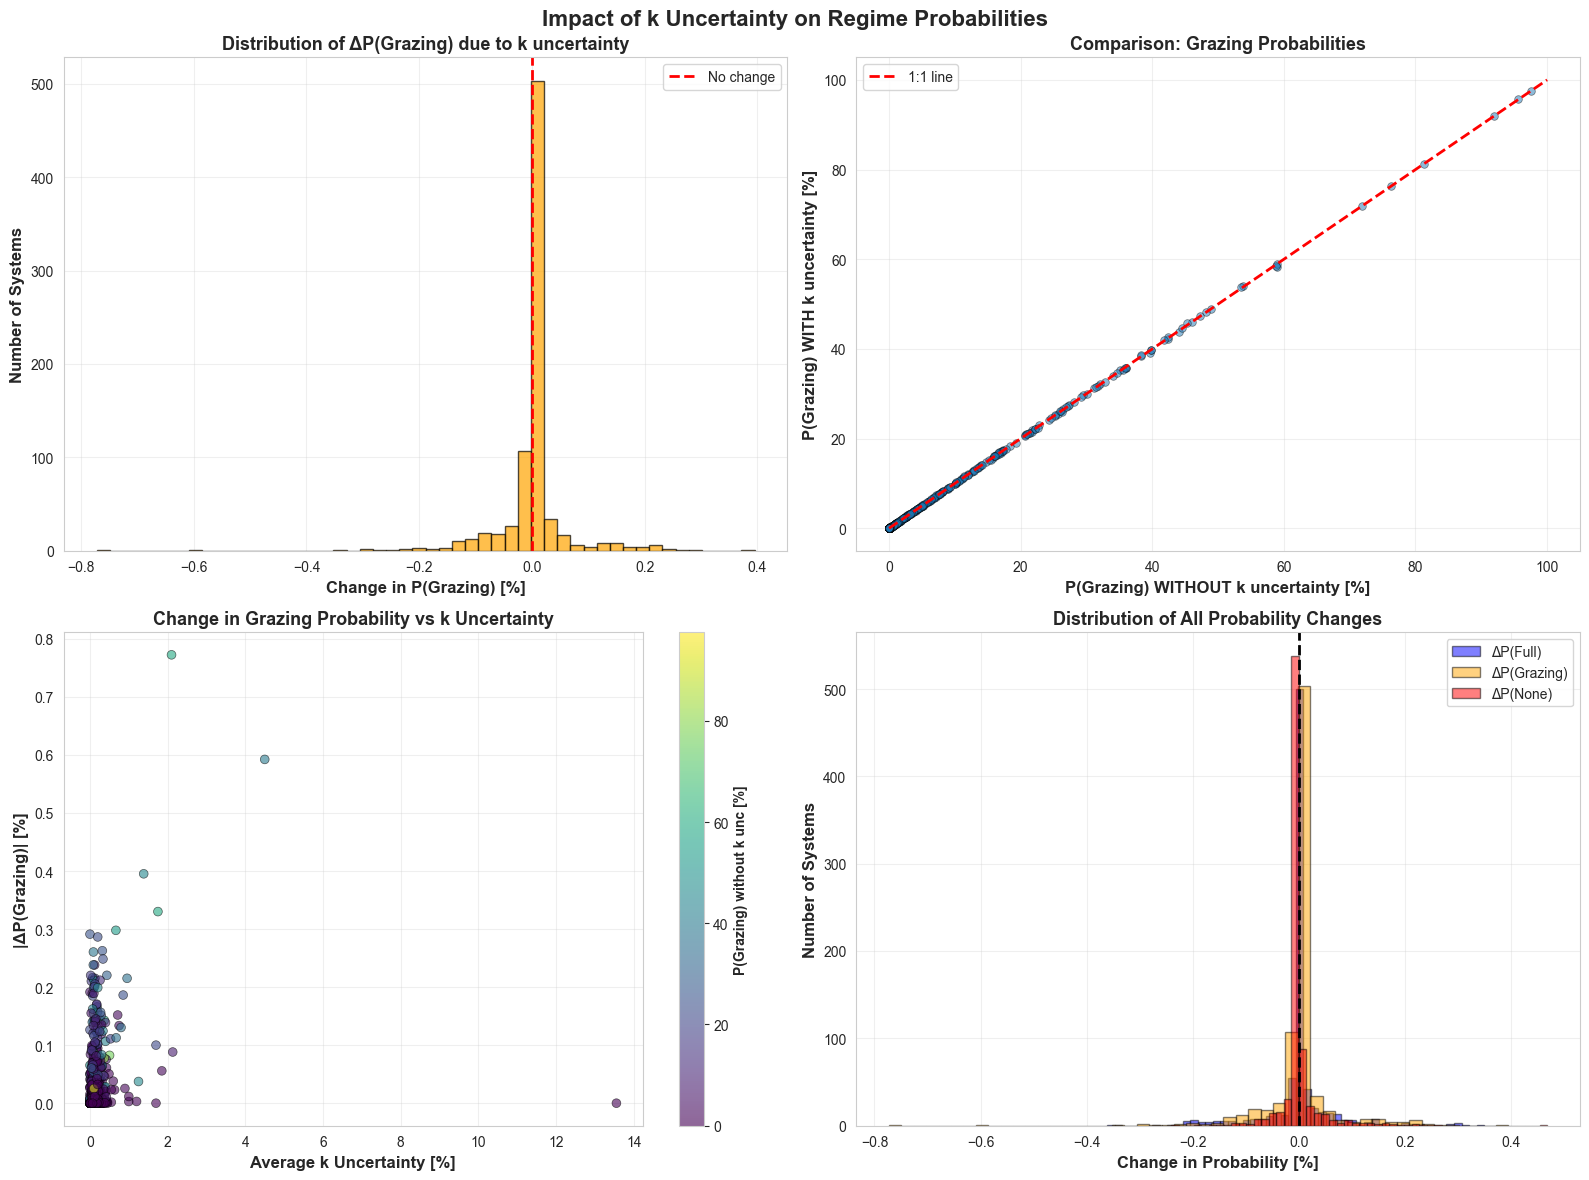


✓ Visualization complete


In [37]:
# Visualize the impact of k uncertainty
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Impact of k Uncertainty on Regime Probabilities', fontsize=16, fontweight='bold')

# 1. Histogram of changes in grazing probability
axes[0,0].hist(df_comparison['delta_grazing'] * 100, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0,0].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[0,0].set_xlabel('Change in P(Grazing) [%]', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Number of Systems', fontsize=12, fontweight='bold')
axes[0,0].set_title('Distribution of ΔP(Grazing) due to k uncertainty', fontsize=13, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Scatter: Grazing prob with vs without k uncertainty
axes[0,1].scatter(df_comparison['prob_grazing'] * 100, 
                 df_comparison['prob_grazing_with_k_unc'] * 100,
                 alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0,1].plot([0, 100], [0, 100], 'r--', linewidth=2, label='1:1 line')
axes[0,1].set_xlabel('P(Grazing) WITHOUT k uncertainty [%]', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('P(Grazing) WITH k uncertainty [%]', fontsize=12, fontweight='bold')
axes[0,1].set_title('Comparison: Grazing Probabilities', fontsize=13, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(-5, 105)
axes[0,1].set_ylim(-5, 105)

# 3. Change in grazing vs k uncertainty
df_plot = df_comparison.merge(df_regime_probs_with_k[['Planet', 'k_err_lower', 'k_err_upper']], on='Planet')
df_plot['k_err_avg'] = (df_plot['k_err_lower'] + df_plot['k_err_upper']) / 2
scatter = axes[1,0].scatter(df_plot['k_err_avg'] * 100, 
                           df_plot['delta_grazing'].abs() * 100,
                           c=df_plot['prob_grazing'] * 100,
                           s=40, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)
axes[1,0].set_xlabel('Average k Uncertainty [%]', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('|ΔP(Grazing)| [%]', fontsize=12, fontweight='bold')
axes[1,0].set_title('Change in Grazing Probability vs k Uncertainty', fontsize=13, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1,0])
cbar.set_label('P(Grazing) without k unc [%]', fontsize=10, fontweight='bold')

# 4. Histogram of all three changes
axes[1,1].hist(df_comparison['delta_full'] * 100, bins=50, alpha=0.5, label='ΔP(Full)', color='blue', edgecolor='black')
axes[1,1].hist(df_comparison['delta_grazing'] * 100, bins=50, alpha=0.5, label='ΔP(Grazing)', color='orange', edgecolor='black')
axes[1,1].hist(df_comparison['delta_none'] * 100, bins=50, alpha=0.5, label='ΔP(None)', color='red', edgecolor='black')
axes[1,1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Change in Probability [%]', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Number of Systems', fontsize=12, fontweight='bold')
axes[1,1].set_title('Distribution of All Probability Changes', fontsize=13, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete")


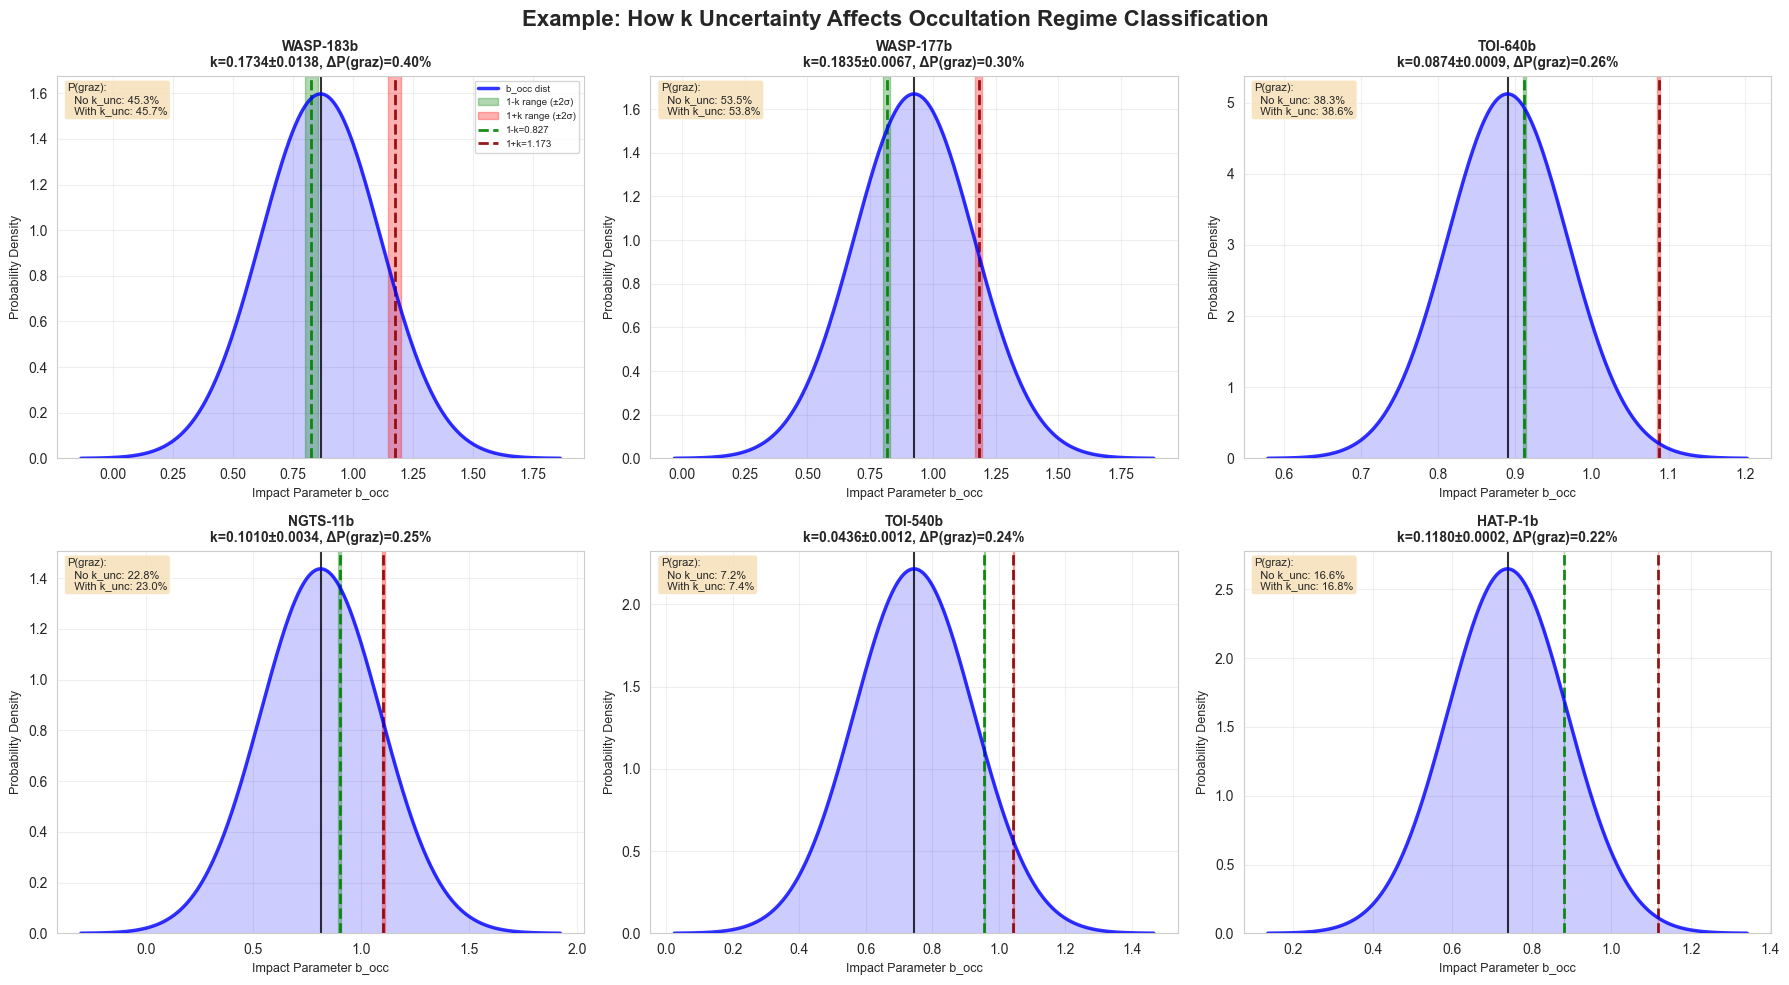


INTERPRETATION:
The shaded green/red regions show where the boundaries (1-k and 1+k) could be
when accounting for k uncertainty. This 'smears out' the boundary, affecting
the probability of being in each regime.

Systems where b_occ is near a boundary show the largest changes in probabilities
when k uncertainty is included.


In [38]:
# Visualize example systems showing how k uncertainty affects boundaries
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Example: How k Uncertainty Affects Occultation Regime Classification', fontsize=16, fontweight='bold')

# Select 6 systems with significant k uncertainty and interesting b_occ values
df_for_viz = df_comparison.merge(df_regime_probs_with_k[['Planet', 'b_occ_median', 'b_occ_std', 'k_nominal', 'k_err_lower', 'k_err_upper']], on='Planet')
interesting_systems = df_for_viz.nlargest(6, 'delta_grazing')

axes_flat = axes.flatten()

for idx, (_, row) in enumerate(interesting_systems.iterrows()):
    ax = axes_flat[idx]
    
    # Create b_occ distribution
    x_b = np.linspace(row['b_occ_median'] - 4*row['b_occ_std'], 
                     row['b_occ_median'] + 4*row['b_occ_std'], 500)
    y_b = norm.pdf(x_b, row['b_occ_median'], row['b_occ_std'])
    
    # Plot b_occ distribution
    ax.plot(x_b, y_b, 'b-', linewidth=2.5, alpha=0.8, label='b_occ dist', zorder=10)
    ax.fill_between(x_b, y_b, alpha=0.2, color='blue')
    
    # Plot boundaries WITH uncertainty as shaded regions
    k_std = (row['k_err_lower'] + row['k_err_upper']) / 2
    boundary_lower_nominal = 1 - row['k_nominal']
    boundary_upper_nominal = 1 + row['k_nominal']
    
    # Show uncertainty in boundaries (±2σ for k)
    boundary_lower_min = 1 - (row['k_nominal'] + 2*k_std)
    boundary_lower_max = 1 - (row['k_nominal'] - 2*k_std)
    boundary_upper_min = 1 + (row['k_nominal'] - 2*k_std)
    boundary_upper_max = 1 + (row['k_nominal'] + 2*k_std)
    
    # Shade the boundary uncertainty regions
    ax.axvspan(boundary_lower_min, boundary_lower_max, alpha=0.3, color='green', label='1-k range (±2σ)')
    ax.axvspan(boundary_upper_min, boundary_upper_max, alpha=0.3, color='red', label='1+k range (±2σ)')
    
    # Plot nominal boundaries
    ax.axvline(boundary_lower_nominal, color='green', linestyle='--', linewidth=2, alpha=0.9, label=f'1-k={boundary_lower_nominal:.3f}')
    ax.axvline(boundary_upper_nominal, color='darkred', linestyle='--', linewidth=2, alpha=0.9, label=f'1+k={boundary_upper_nominal:.3f}')
    
    # Add median b_occ line
    ax.axvline(row['b_occ_median'], color='black', linestyle='-', linewidth=1.5, alpha=0.8)
    
    # Formatting
    ax.set_title(f"{row['Planet']}\nk={row['k_nominal']:.4f}±{k_std:.4f}, ΔP(graz)={row['delta_grazing']:.2%}", 
                fontsize=10, fontweight='bold')
    ax.set_xlabel('Impact Parameter b_occ', fontsize=9)
    ax.set_ylabel('Probability Density', fontsize=9)
    if idx == 0:
        ax.legend(fontsize=7, loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)
    
    # Add text box with probabilities
    textstr = f"P(graz):\n  No k_unc: {row['prob_grazing']:.1%}\n  With k_unc: {row['prob_grazing_with_k_unc']:.1%}"
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print("The shaded green/red regions show where the boundaries (1-k and 1+k) could be")
print("when accounting for k uncertainty. This 'smears out' the boundary, affecting")
print("the probability of being in each regime.")
print("\nSystems where b_occ is near a boundary show the largest changes in probabilities")
print("when k uncertainty is included.")


In [39]:
# Save results with k uncertainty
output_file_with_k = '../results/mcs_occultation_regime_probabilities_with_k_uncertainty.csv'

# Add eclipse flag if available
if 'has_observed_eclipse' in df_mcs_merged.columns:
    eclipse_info = df_mcs_merged[['Planet Name', 'has_observed_eclipse']].copy()
    df_regime_probs_with_k = df_regime_probs_with_k.merge(eclipse_info, left_on='Planet', right_on='Planet Name', how='left')

df_regime_probs_with_k.to_csv(output_file_with_k, index=False)

print(f"\n{'='*80}")
print(f"RESULTS SAVED")
print(f"{'='*80}")
print(f"✓ Regime probabilities WITH k uncertainty: {output_file_with_k}")
print(f"  Total systems: {len(df_regime_probs_with_k)}")
print(f"\n  Columns included:")
print(f"    - b_occ statistics (median, std)")
print(f"    - k statistics (nominal, errors)")
print(f"    - prob_full_occultation_with_k_unc")
print(f"    - prob_grazing_with_k_unc")
print(f"    - prob_no_occultation_with_k_unc")

print(f"\n{'='*80}")
print("FINAL SUMMARY")
print(f"{'='*80}")
print(f"\nSystems with >50% grazing probability (with k uncertainty):")
high_grazing = df_regime_probs_with_k[df_regime_probs_with_k['prob_grazing_with_k_unc'] > 0.5]
print(f"  Count: {len(high_grazing)} ({len(high_grazing)/len(df_regime_probs_with_k)*100:.1f}%)")

print(f"\nSystems with >10% grazing probability (with k uncertainty):")
some_grazing = df_regime_probs_with_k[df_regime_probs_with_k['prob_grazing_with_k_unc'] > 0.1]
print(f"  Count: {len(some_grazing)} ({len(some_grazing)/len(df_regime_probs_with_k)*100:.1f}%)")

print(f"\nAverage probabilities across all systems (with k uncertainty):")
print(f"  P(full occultation):  {df_regime_probs_with_k['prob_full_occultation_with_k_unc'].mean():.1%}")
print(f"  P(grazing):           {df_regime_probs_with_k['prob_grazing_with_k_unc'].mean():.1%}")
print(f"  P(no occultation):    {df_regime_probs_with_k['prob_no_occultation_with_k_unc'].mean():.1%}")



RESULTS SAVED
✓ Regime probabilities WITH k uncertainty: ../results/mcs_occultation_regime_probabilities_with_k_uncertainty.csv
  Total systems: 808

  Columns included:
    - b_occ statistics (median, std)
    - k statistics (nominal, errors)
    - prob_full_occultation_with_k_unc
    - prob_grazing_with_k_unc
    - prob_no_occultation_with_k_unc

FINAL SUMMARY

Systems with >50% grazing probability (with k uncertainty):
  Count: 11 (1.4%)

Systems with >10% grazing probability (with k uncertainty):
  Count: 111 (13.7%)

Average probabilities across all systems (with k uncertainty):
  P(full occultation):  92.5%
  P(grazing):           4.7%
  P(no occultation):    2.9%
